# General

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.

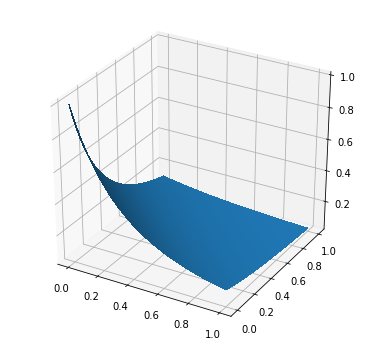

The function value at (0,0.5) is 0.296296296296
The analytical integral value in the Domain [0,1]^d is 0.166666666667


In [1]:
%matplotlib inline
from Function import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = 0
b = 1
f = GenzCornerPeak(coeffs=coeffs)
f.plot(np.ones(dim)*a, np.ones(dim)*b)
print("The function value at (0,0.5) is", f.eval((0,0.5)))
print("The analytical integral value in the Domain [0,1]^d is", 
      f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

# Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution 0.166628181093
Analytic Solution 0.166666666667
Difference 3.84855732446e-05


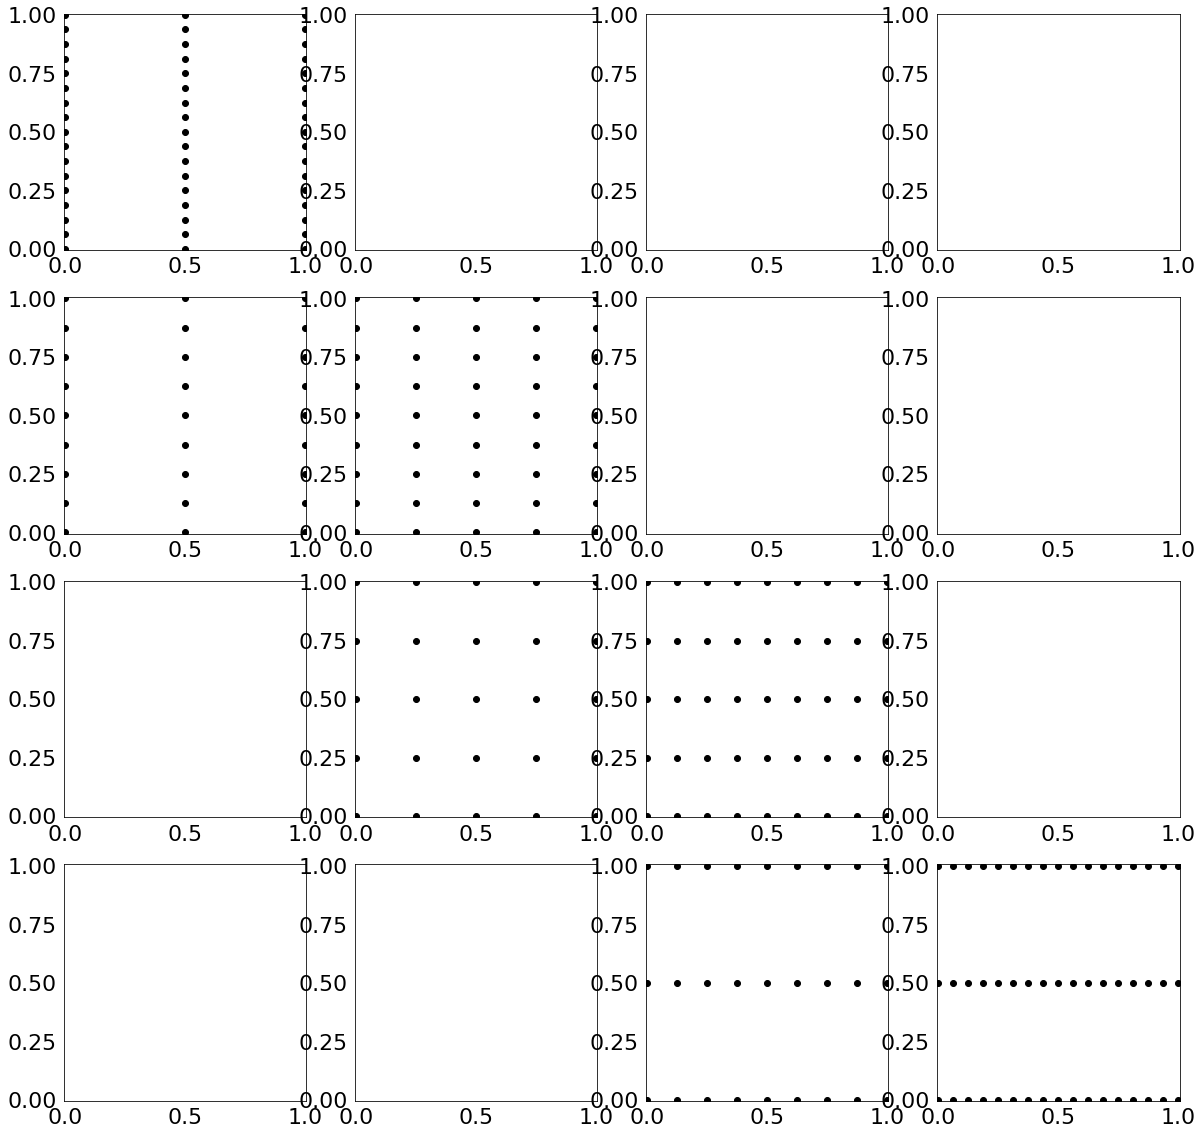

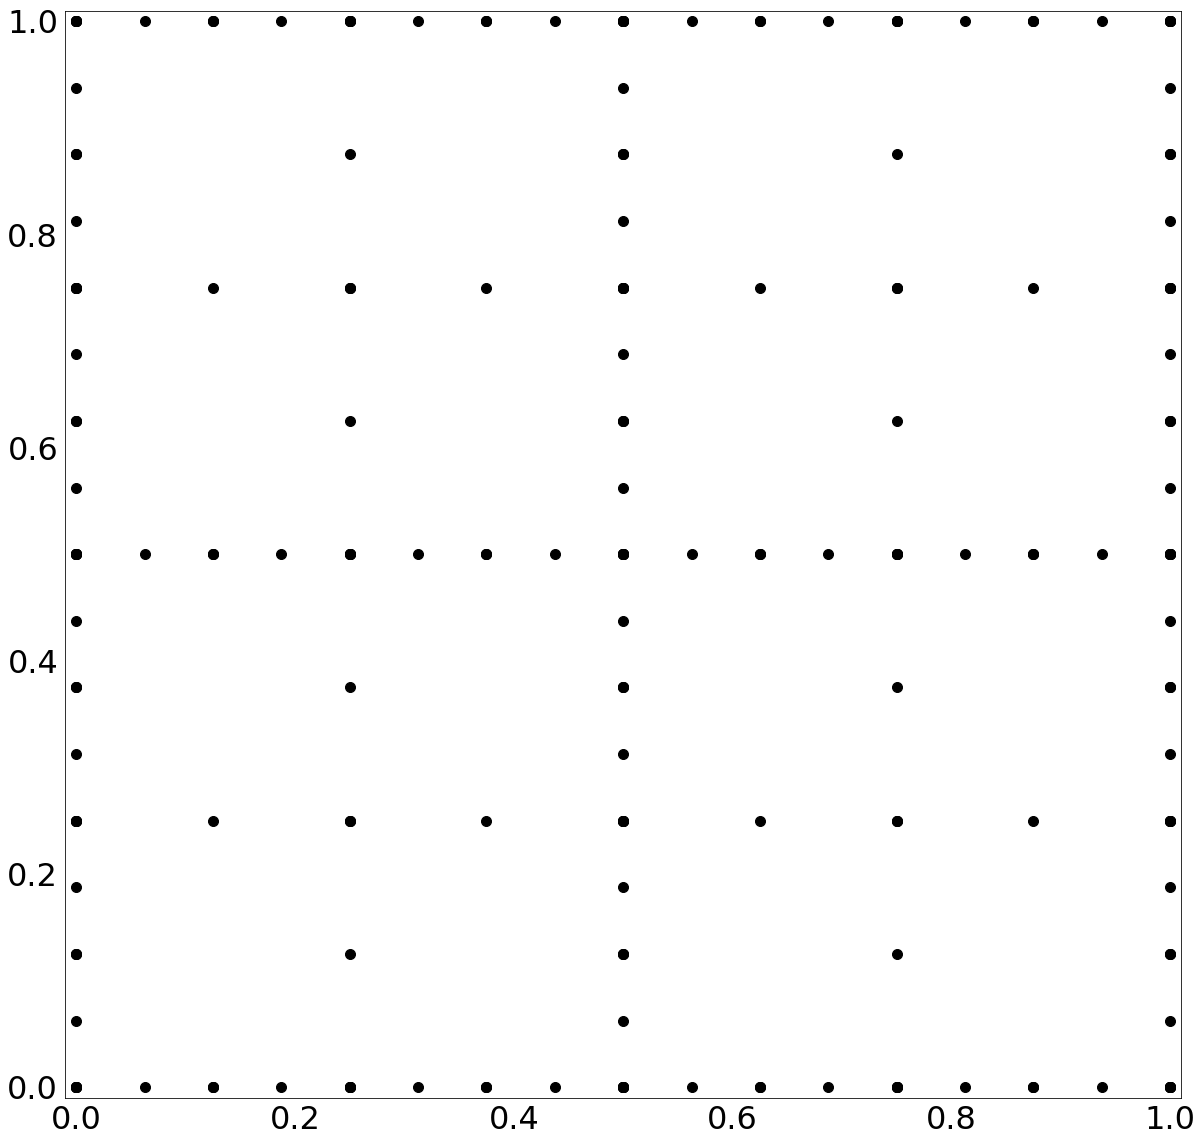

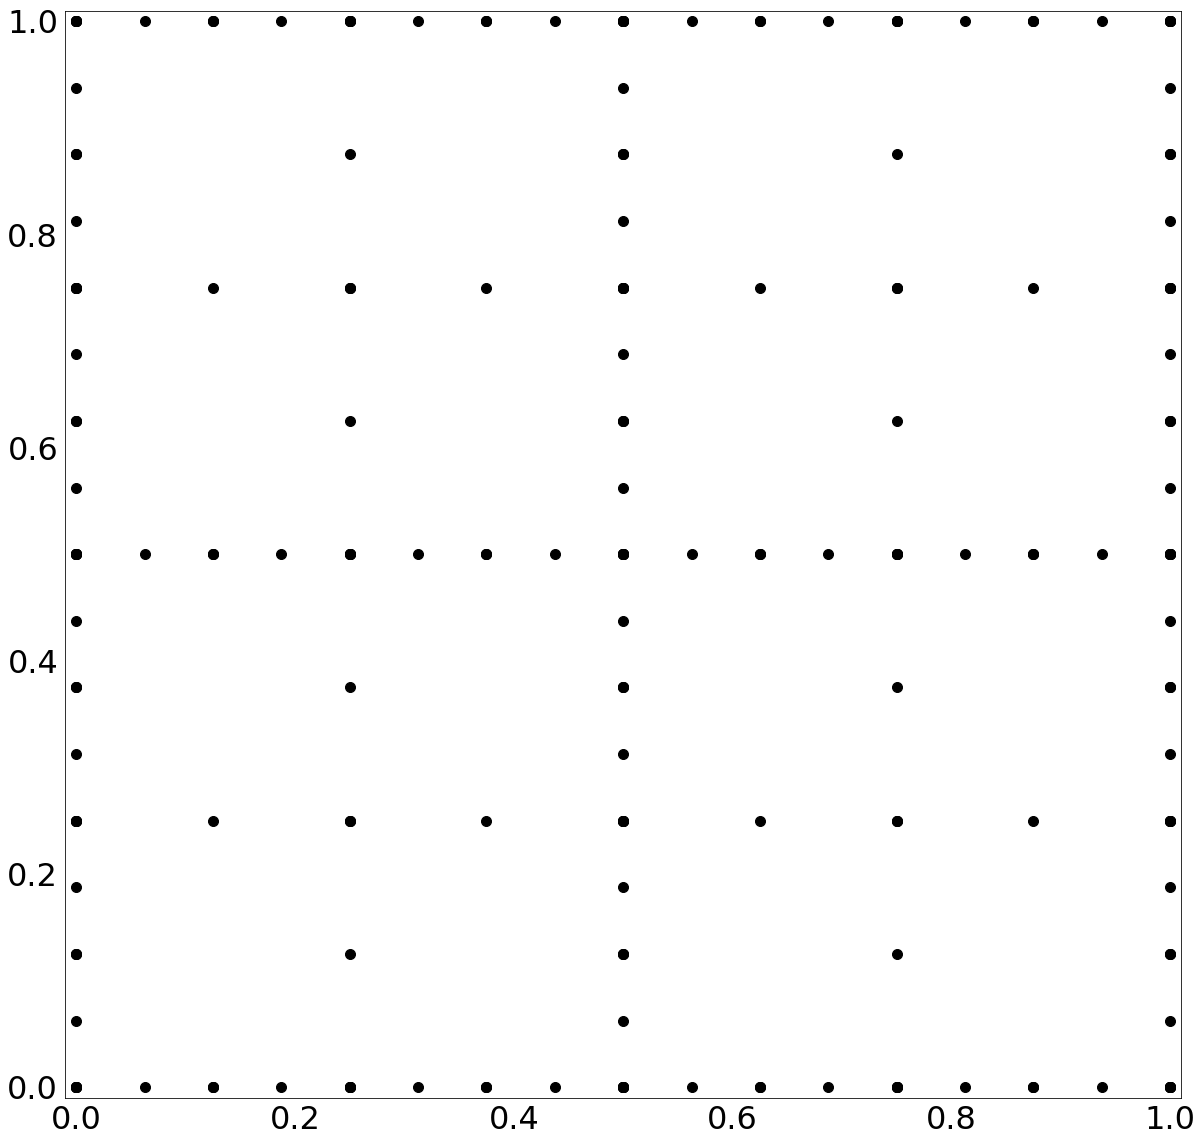

In [2]:
%matplotlib inline
from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a, b)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = StandardCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


The output shows for the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

# Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

In [3]:
%matplotlib inline
from Function import *
from DimAdaptiveCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a, b)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = DimAdaptiveCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f, 10**-4)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()

[(1, 4), (2, 3), (3, 2), (4, 1)]
[(1, 3), (2, 2), (3, 1)]
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [2, 3] 1
5 [4, 1] 1
6 [1, 4] 1
Current combi integral: 0.166628181093
Currentrelative error: 0.000230913439468


TypeError: get_total_num_points() missing 1 required positional argument: 'doNaive'

# SpatiallyAdaptiveCombi

Now we come to the core element of this framework: The spatially adaptive Combination Technique. Here several techniques are implemented and can be tested for all test functions. After configuring the grid, the function, and the dimension we need to create the object for the respective strategy (currently we have the $SpatiallyAdaptiveFixedScheme$, the $SpatiallyAdaptiveExtendScheme$, the $SpatiallyAdaptiveCellScheme$ and the currently in construction $SpatiallyAdaptiveSingleDimensions$). The different Schemes have different configuration parameters one can choose. For further information have a look in the respective class file. The calling conventions for the spatially adaptive combi slightly differe from those of the standard combis and also include and $errorOperator$ which controls the error estimations and we also have the oportunity to plot the sparse grid and the combination scheme after each refinement step by setting $do\_plot$ to $true$. In the following we will demonstrate the refinement for to schemes including the respective plots.

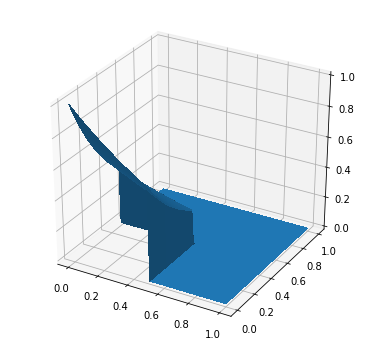

0 [2, 2] 1.0
split dimension 0
split dimension 0
split dimension 1
split dimension 1
max error: 0.0446515311801
combiintegral: 0.0884395171333
Current error: 0.288842907203
Finished refinement


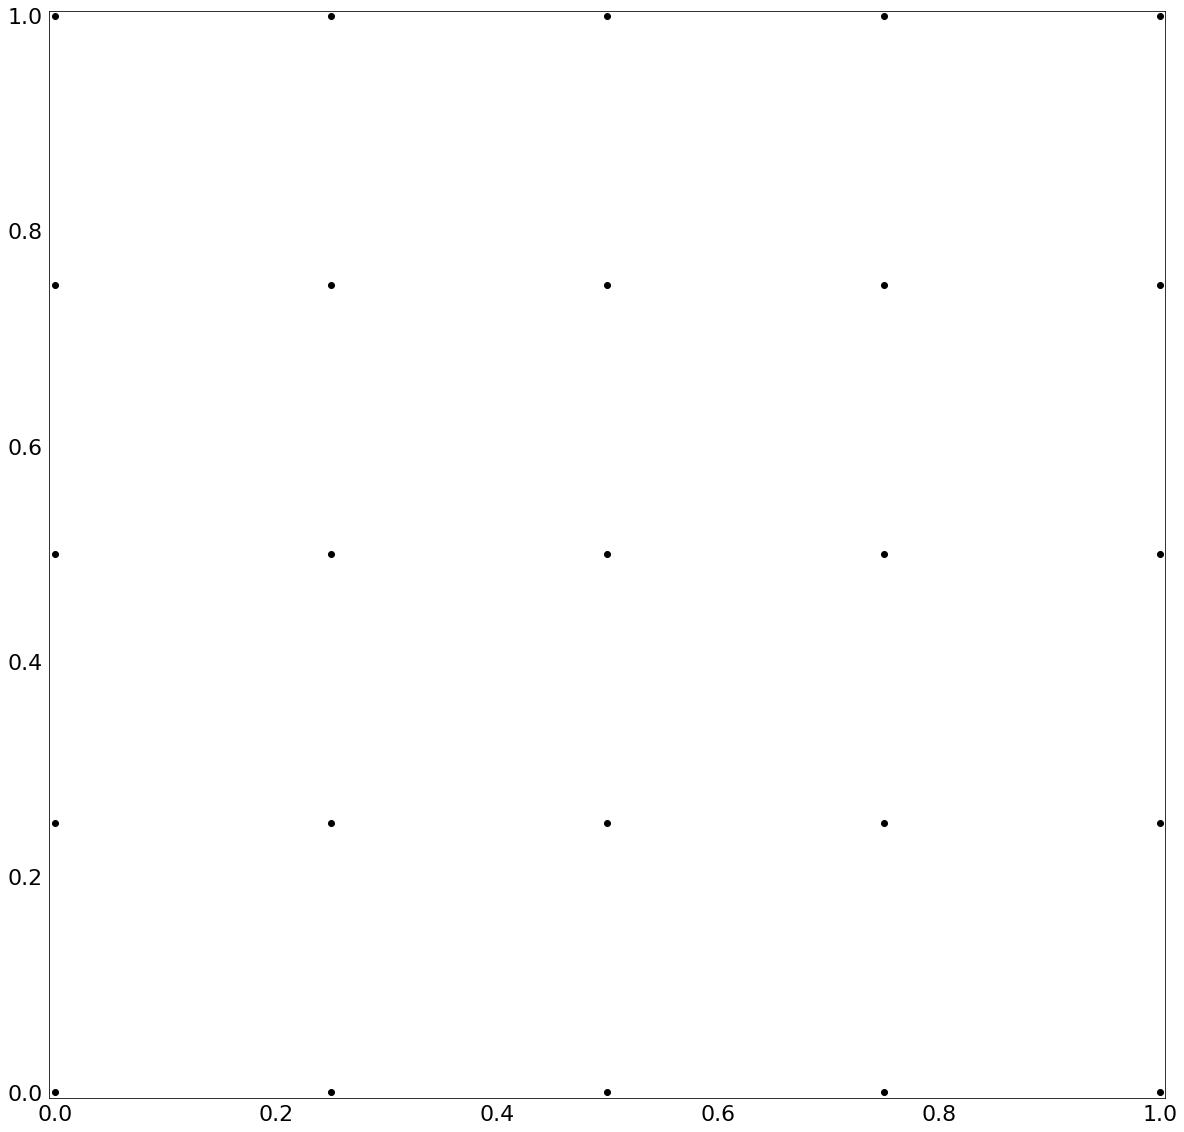

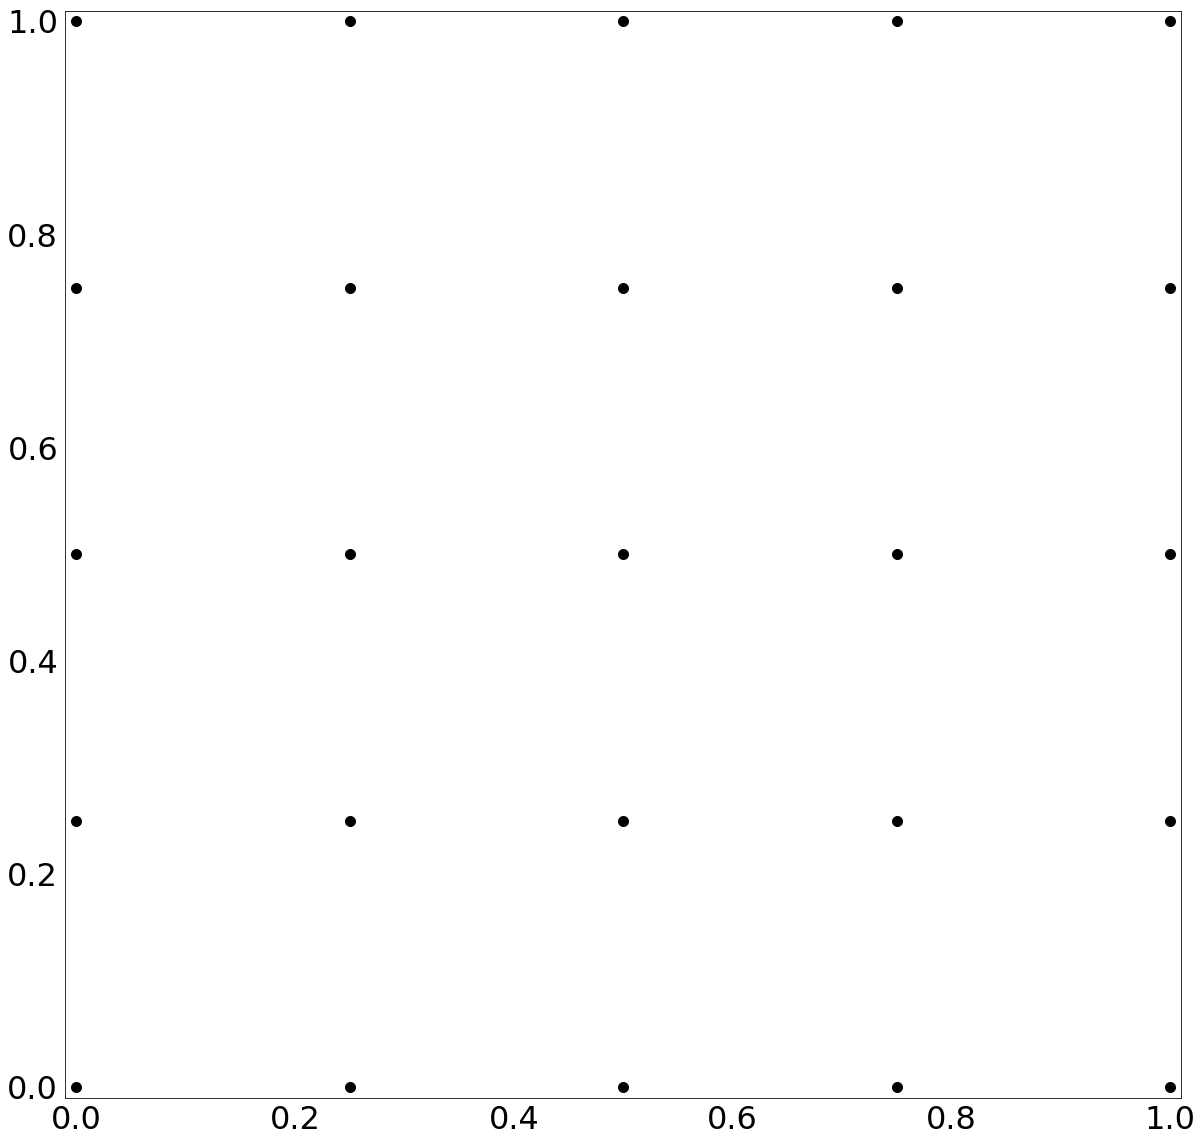

max error: 0.0195494896221
combiintegral: 0.0875862636702
Current error: 0.295704062396
Finished refinement


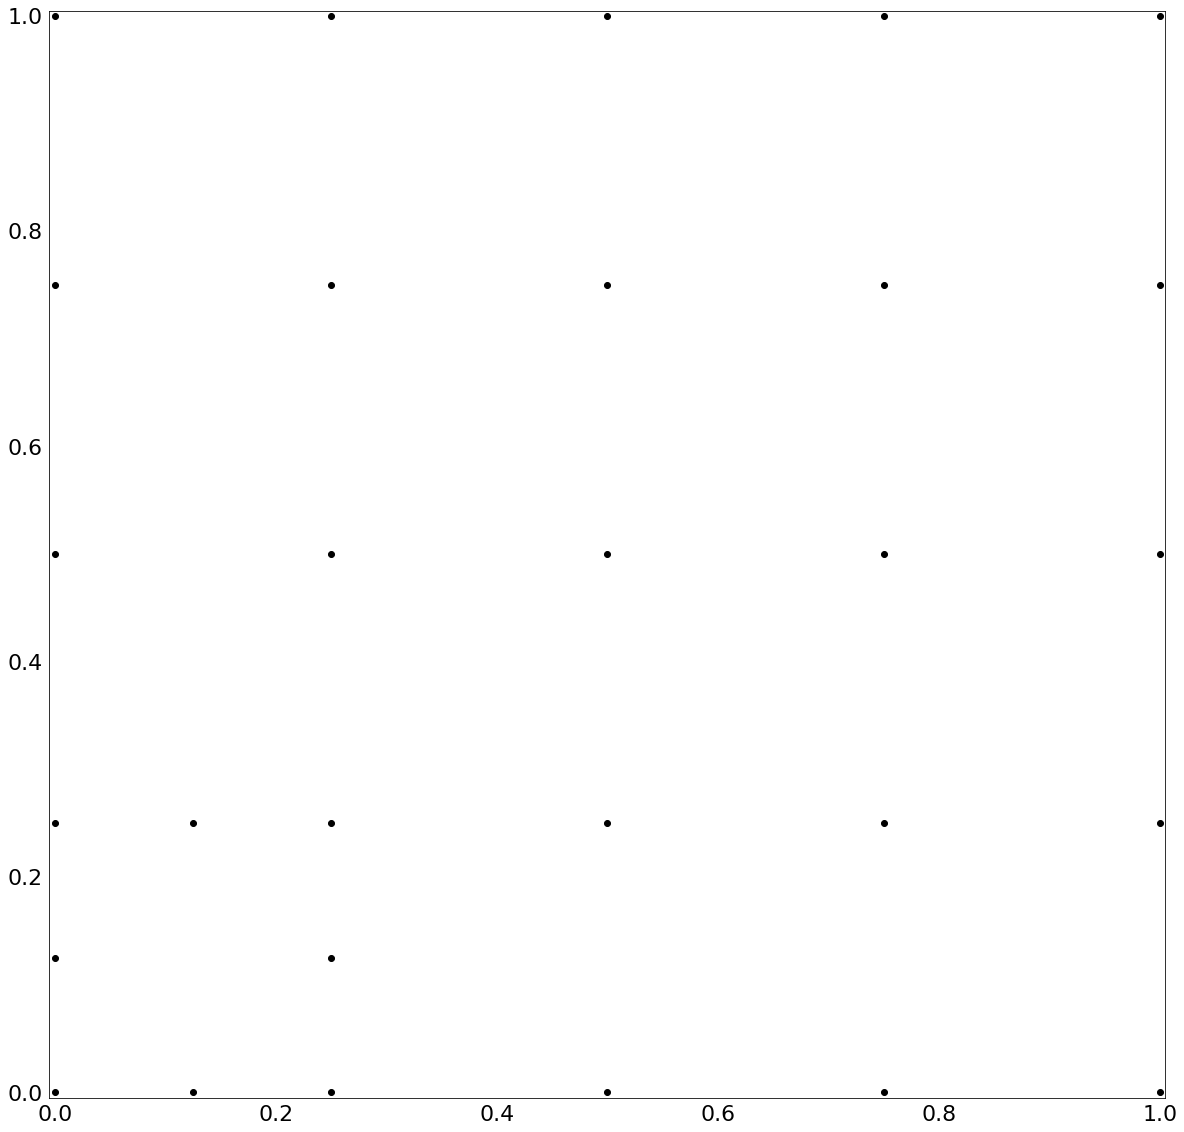

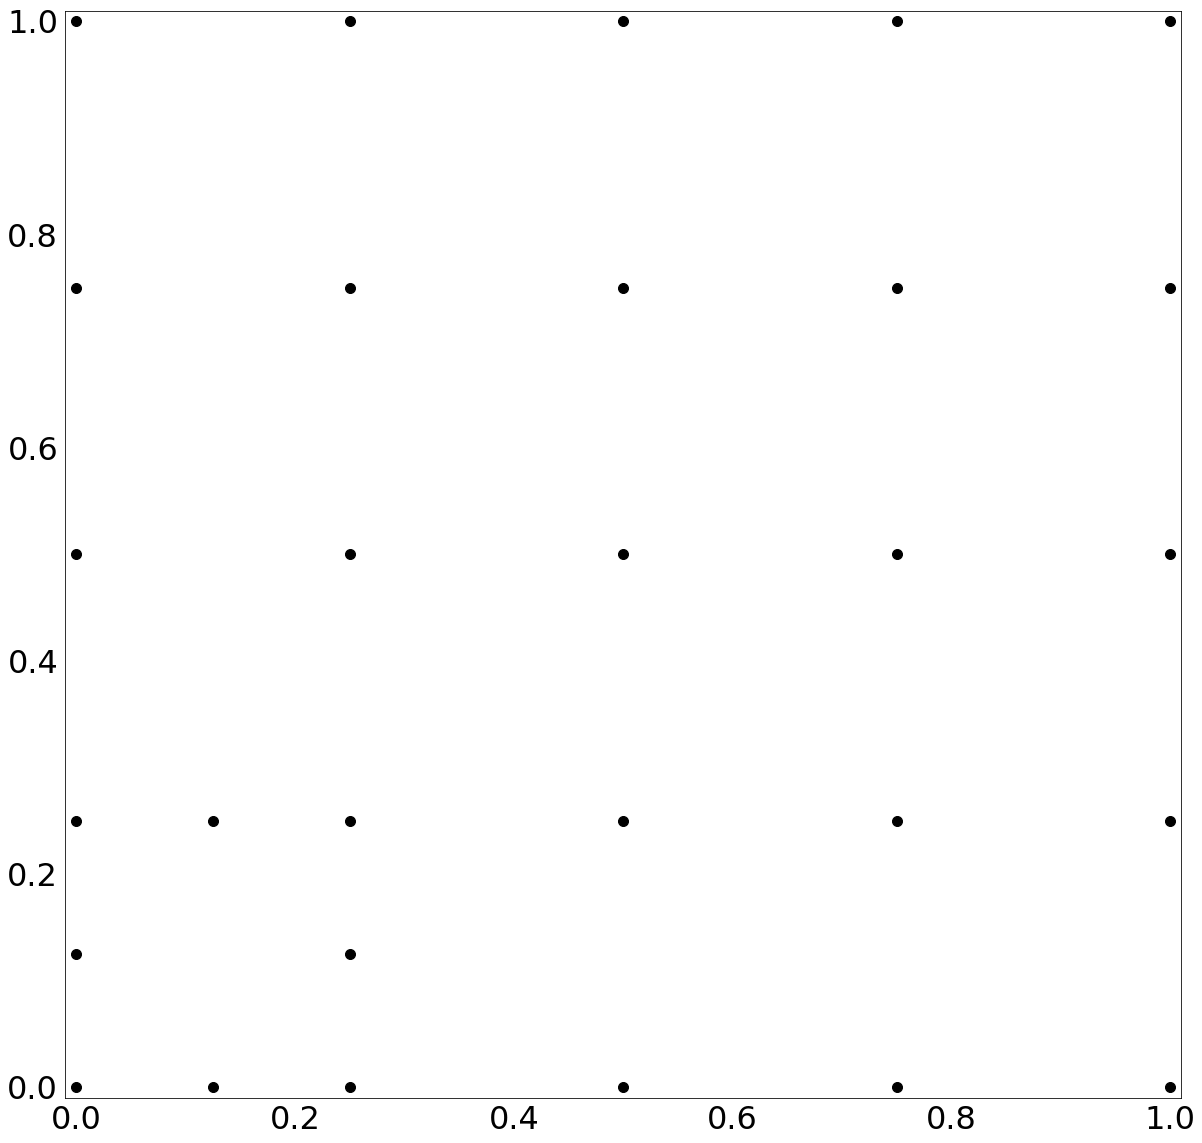

max error: 0.0168577689446
combiintegral: 0.0947661796448
Current error: 0.237969145512
Finished refinement


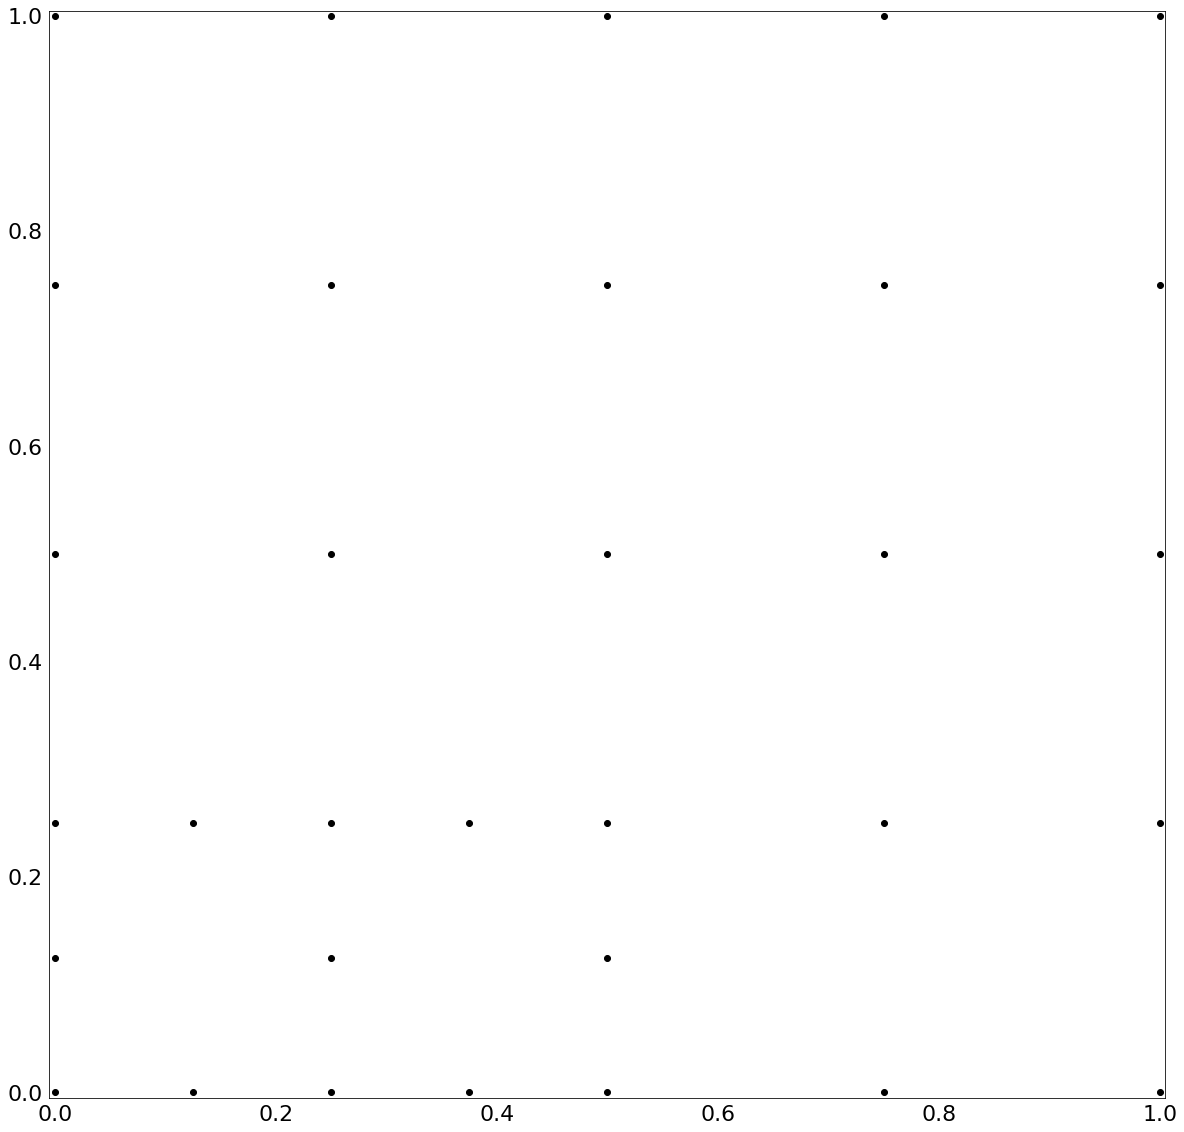

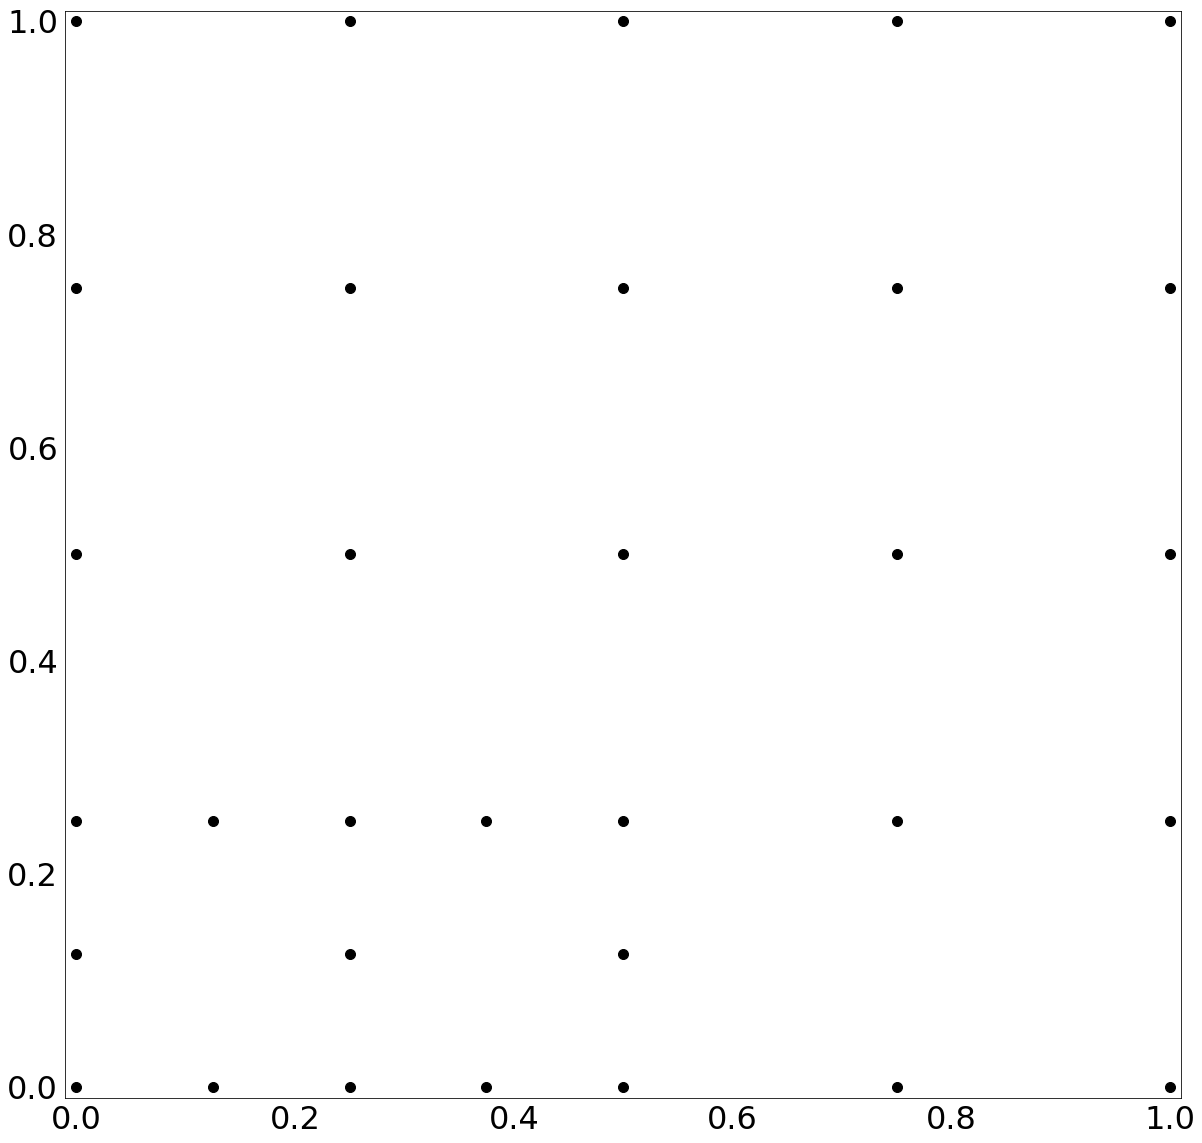

max error: 0.00738072738658
combiintegral: 0.0994007141757
Current error: 0.200702070676
Finished refinement


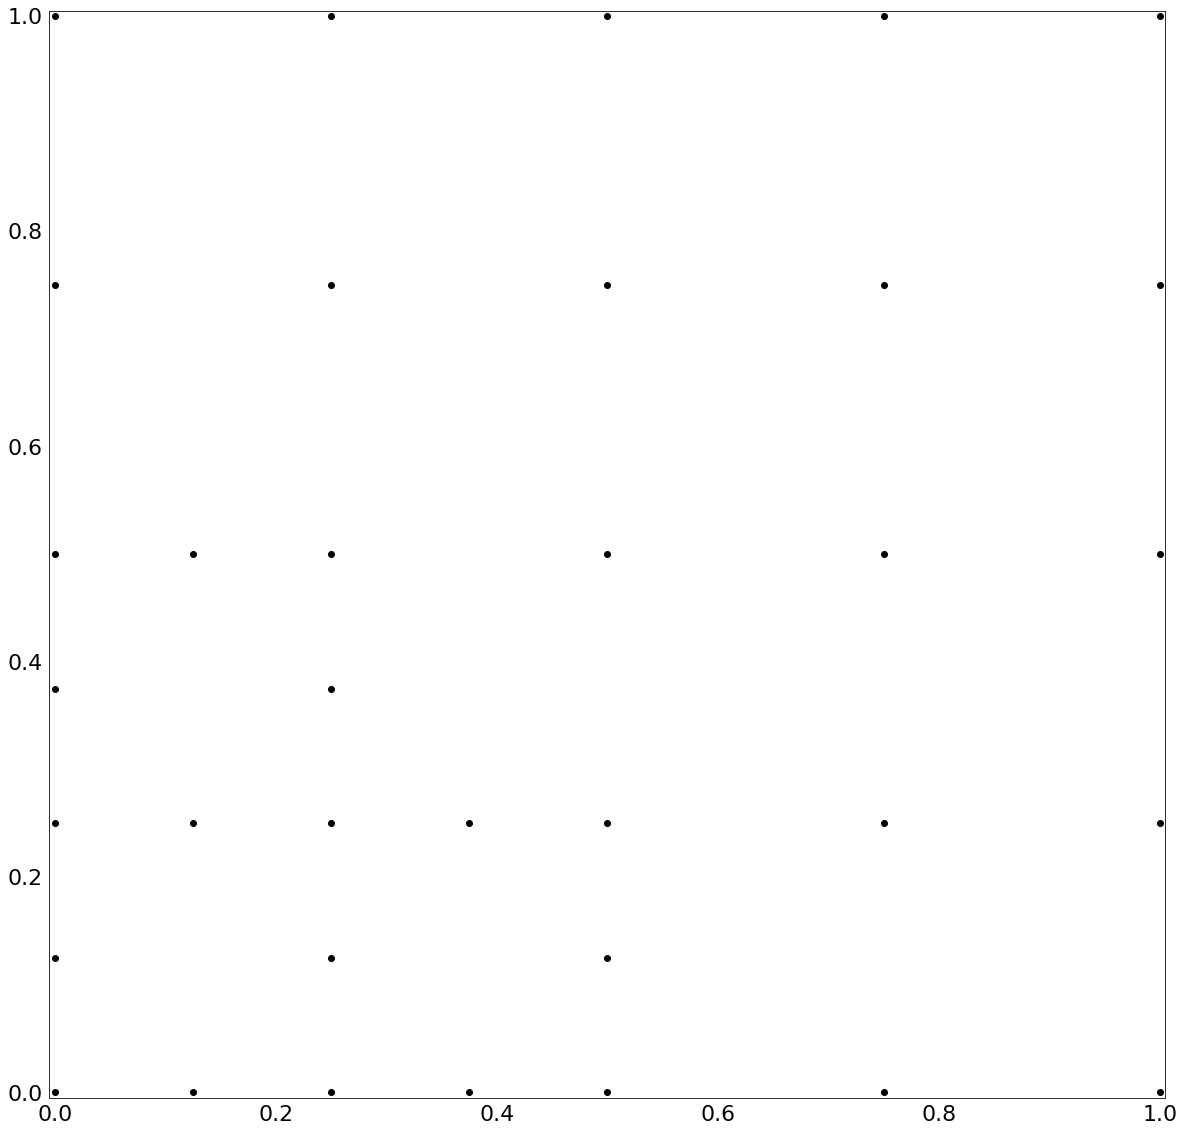

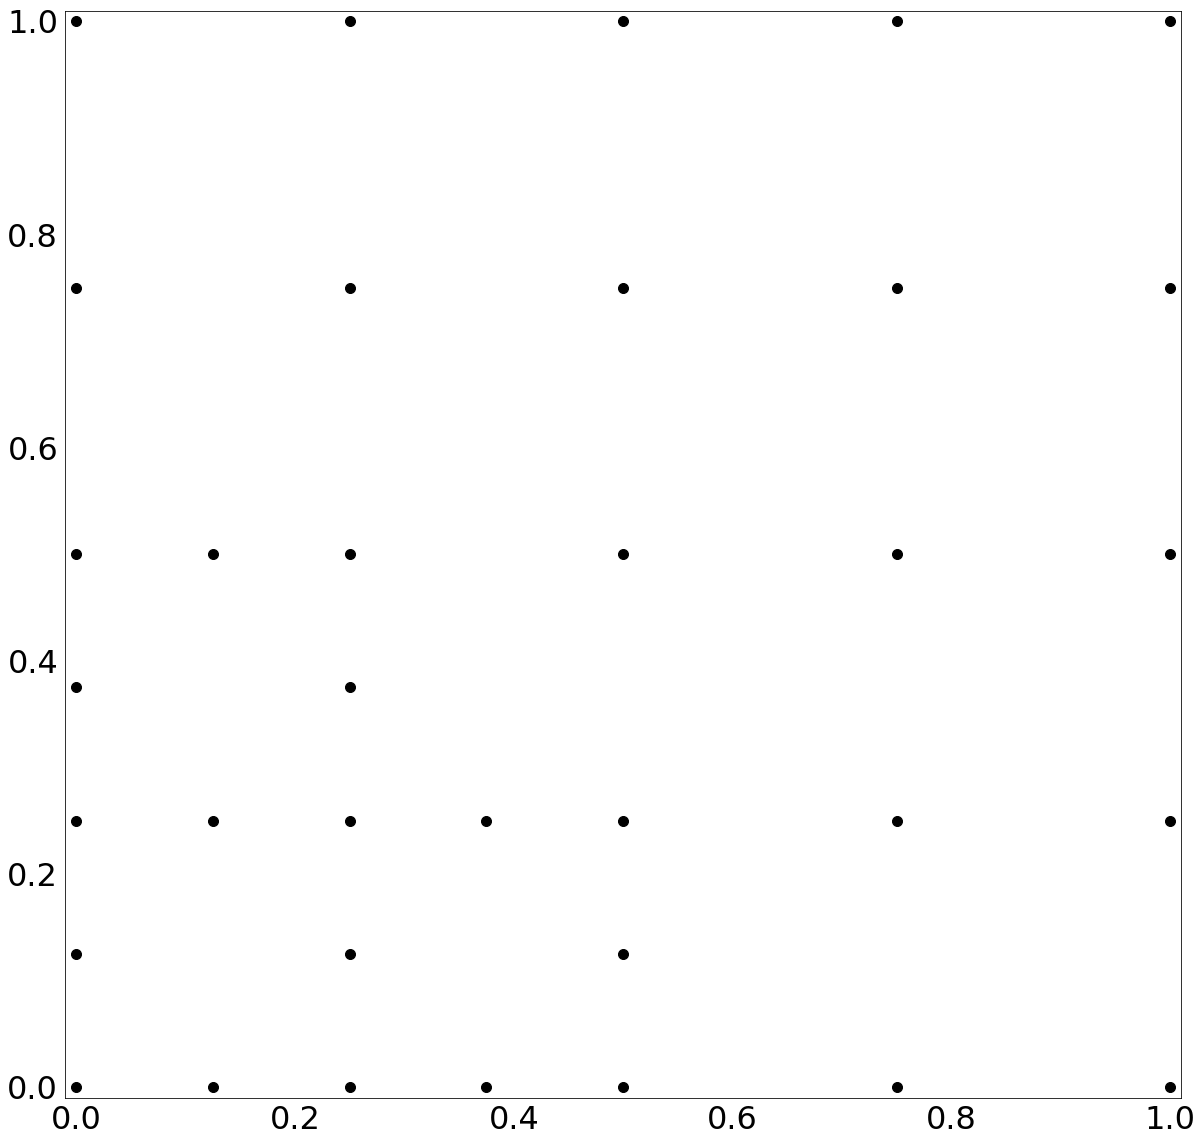

max error: 0.00373880961378
combiintegral: 0.104281572115
Current error: 0.161454267715
Finished refinement


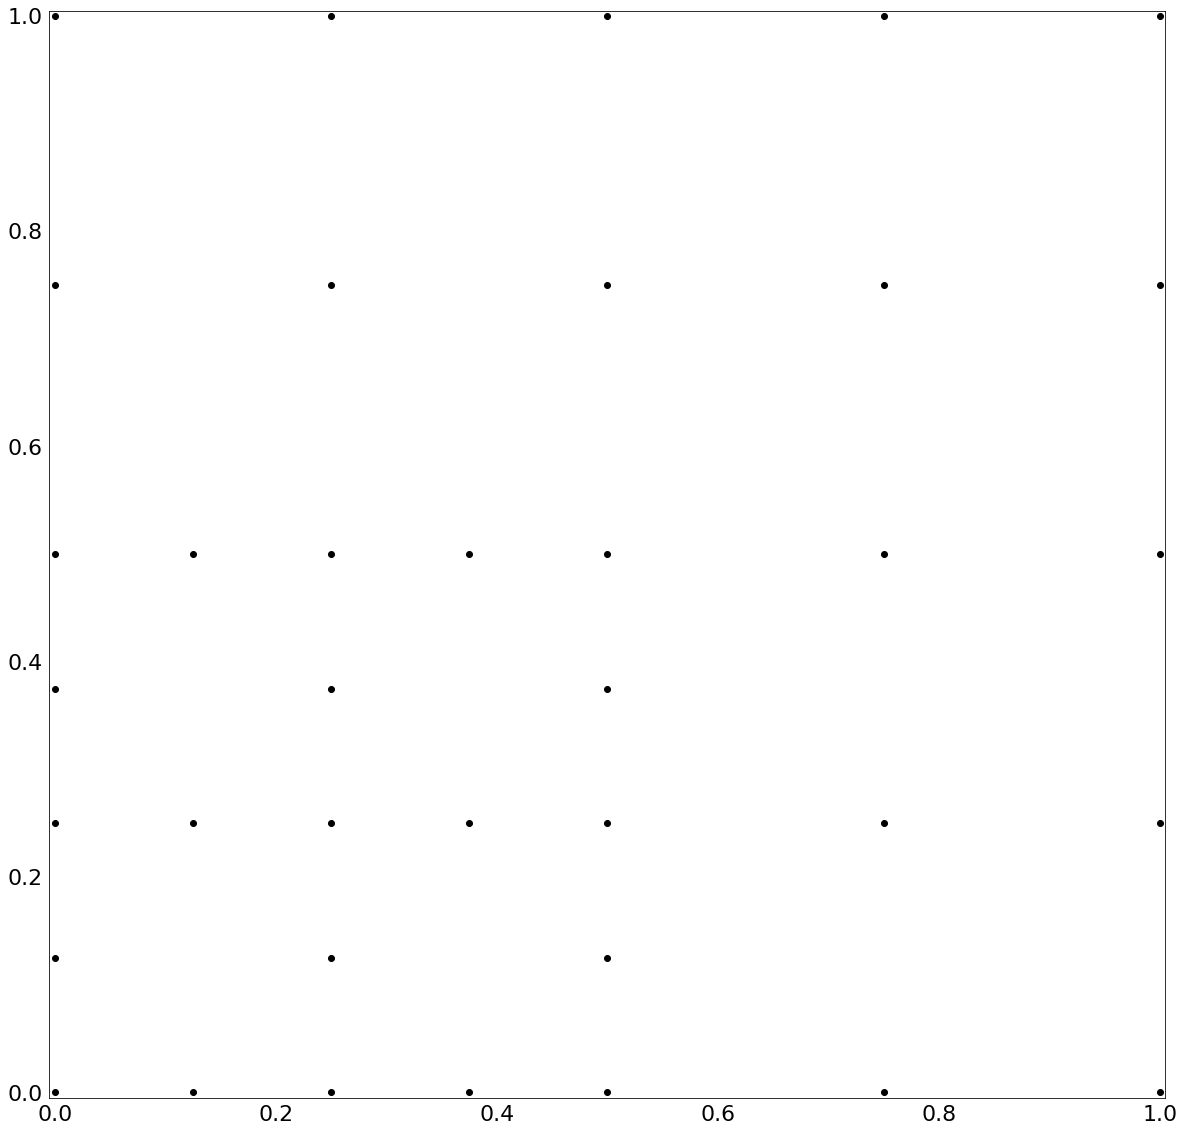

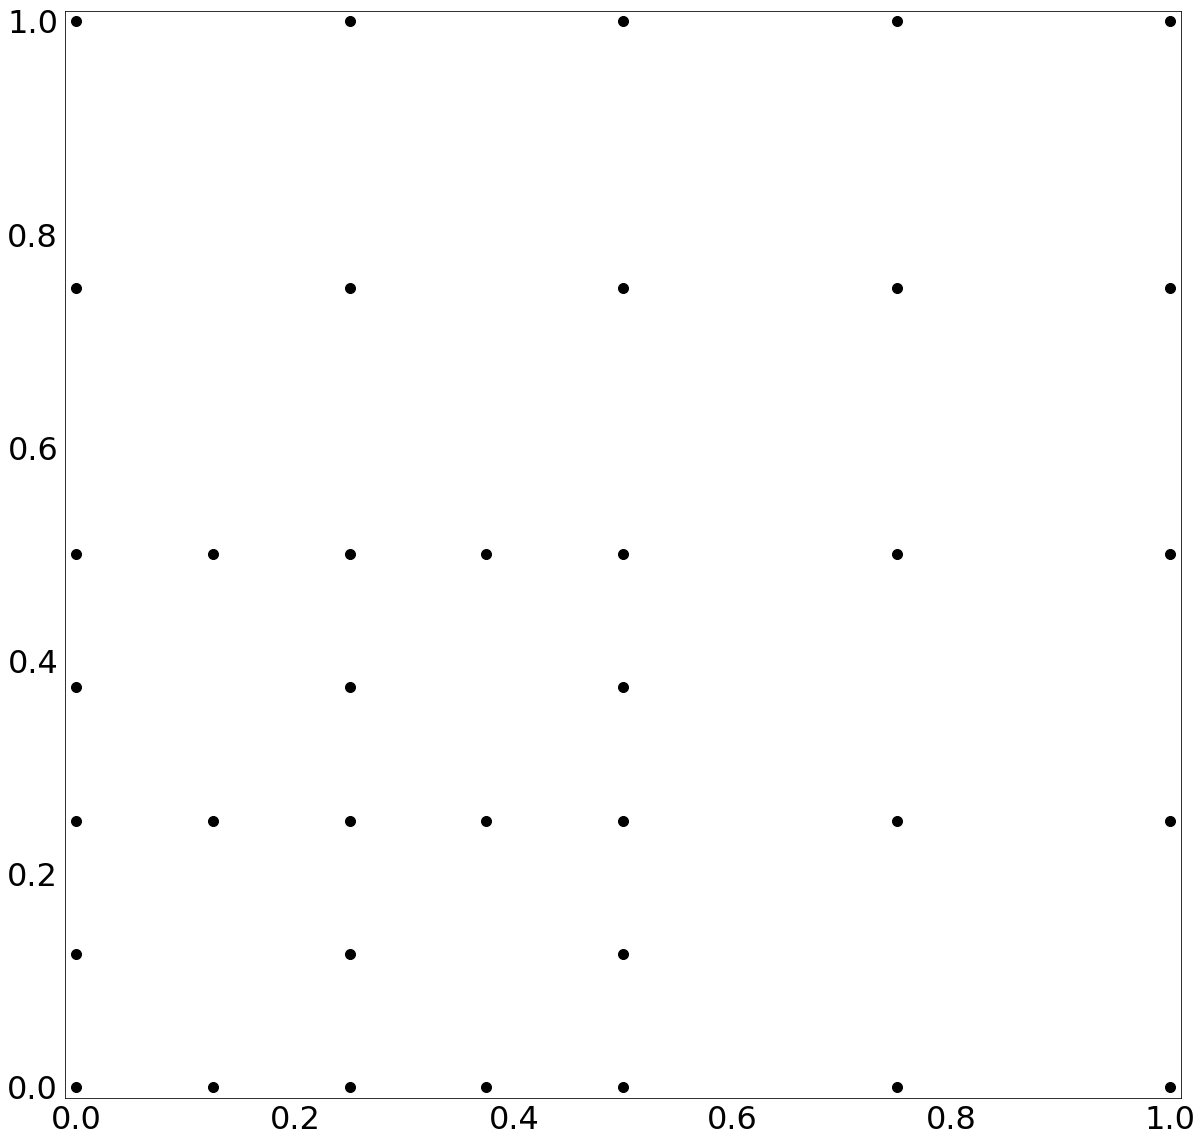

max error: 0.00234997959129
combiintegral: 0.108054088722
Current error: 0.131118824578
Finished refinement


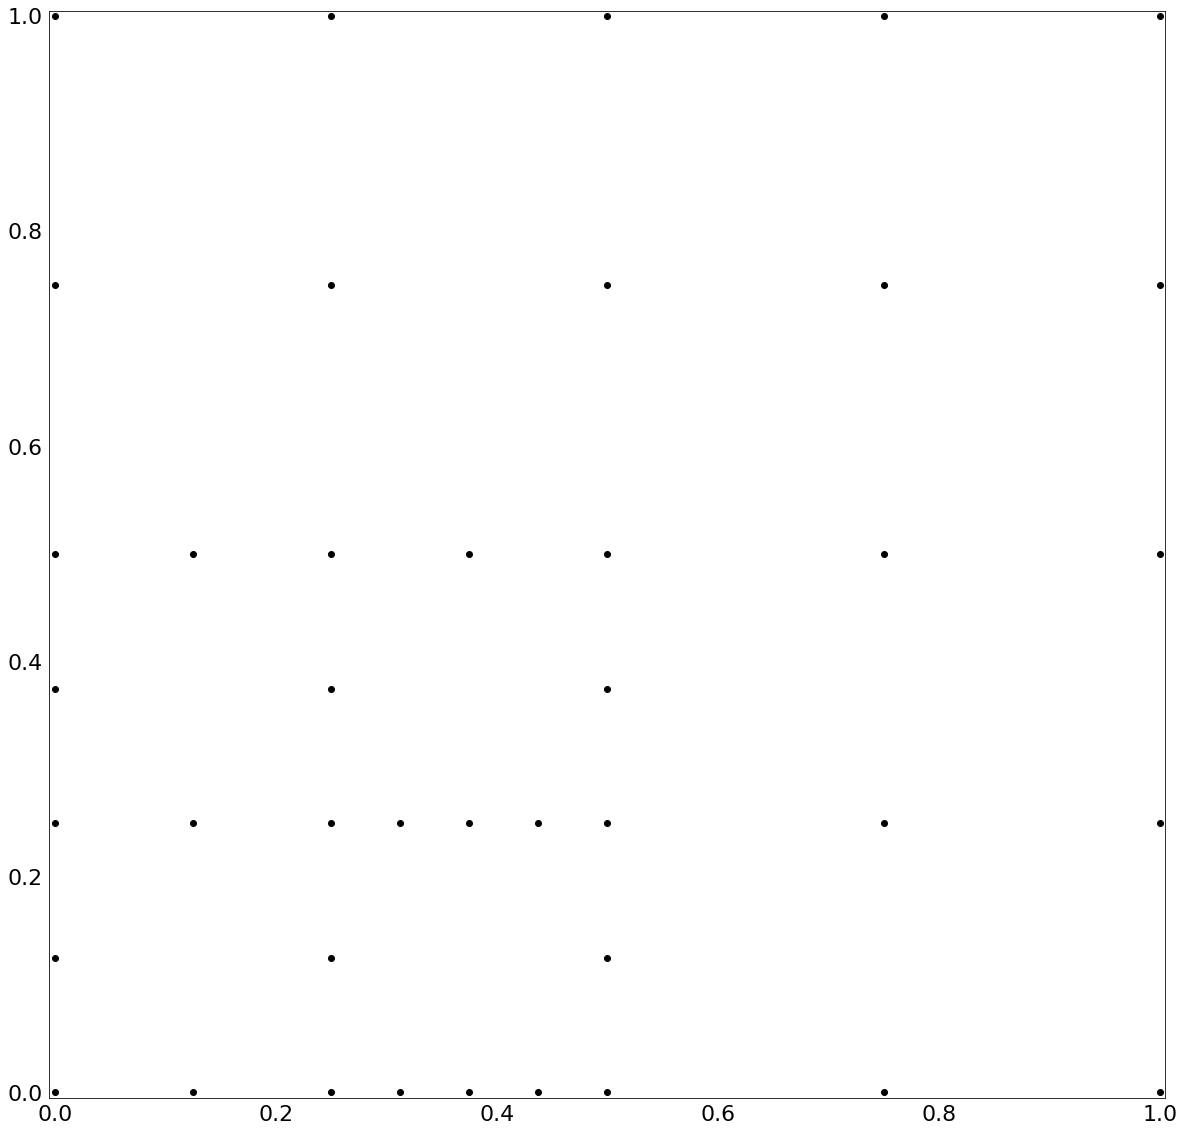

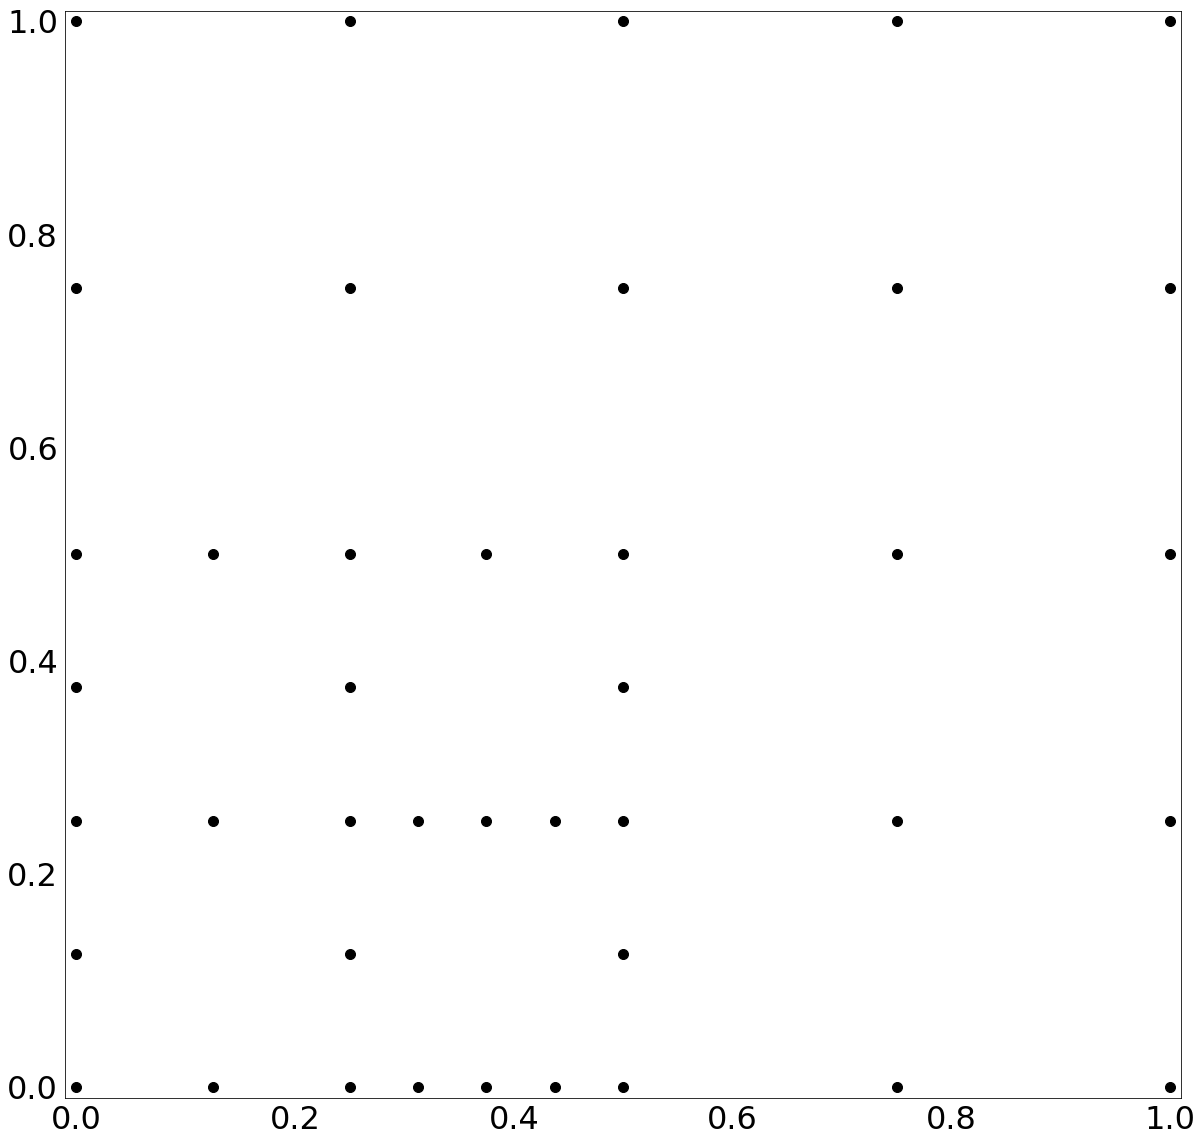

max error: 0.00189522853074
combiintegral: 0.110506771028
Current error: 0.111396391955
Finished refinement


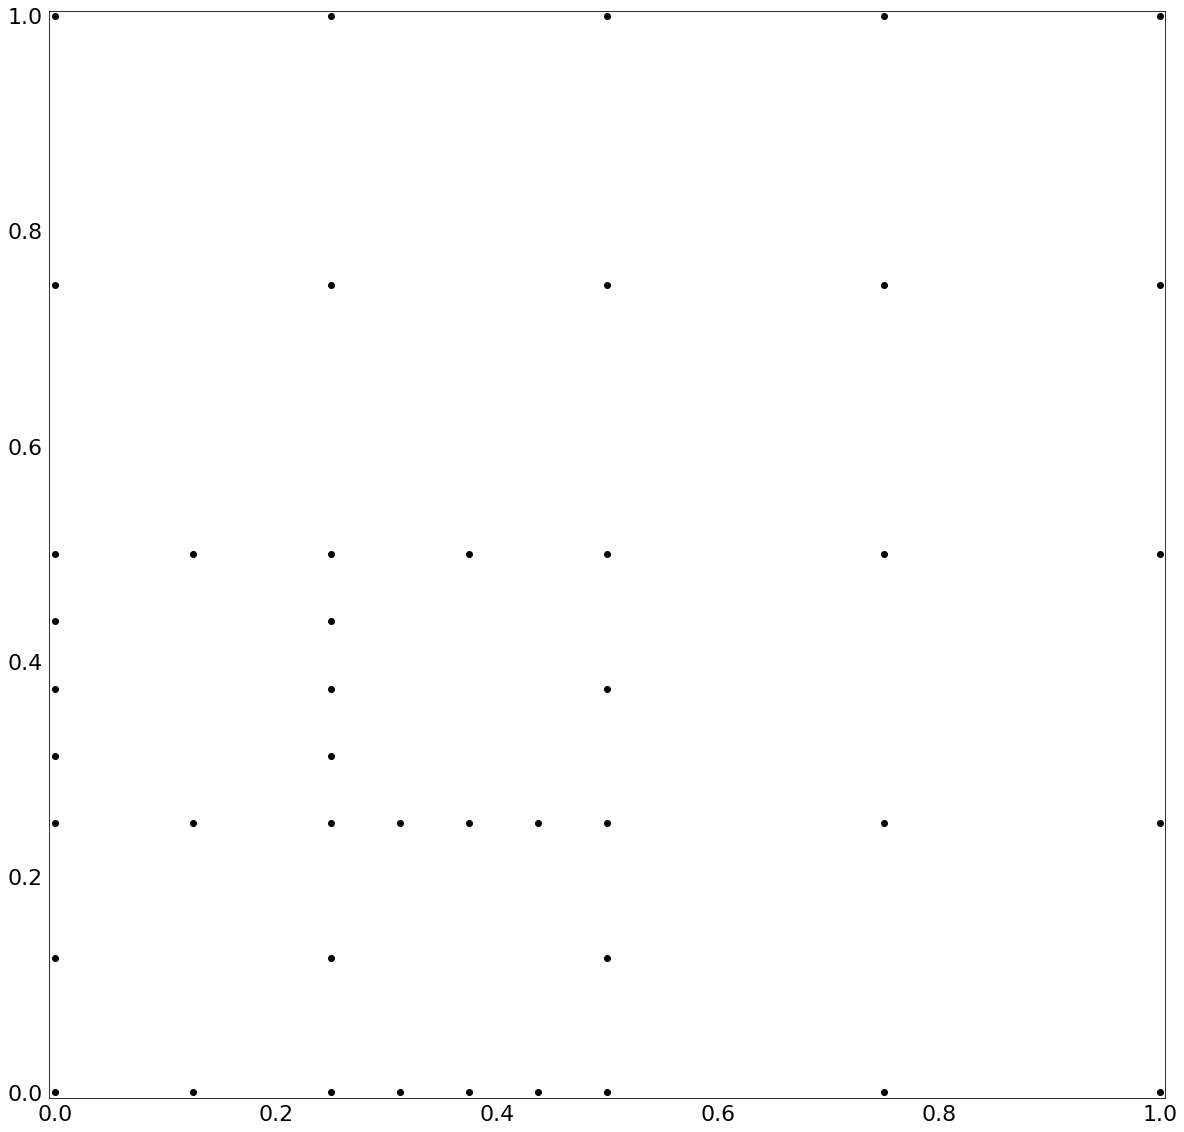

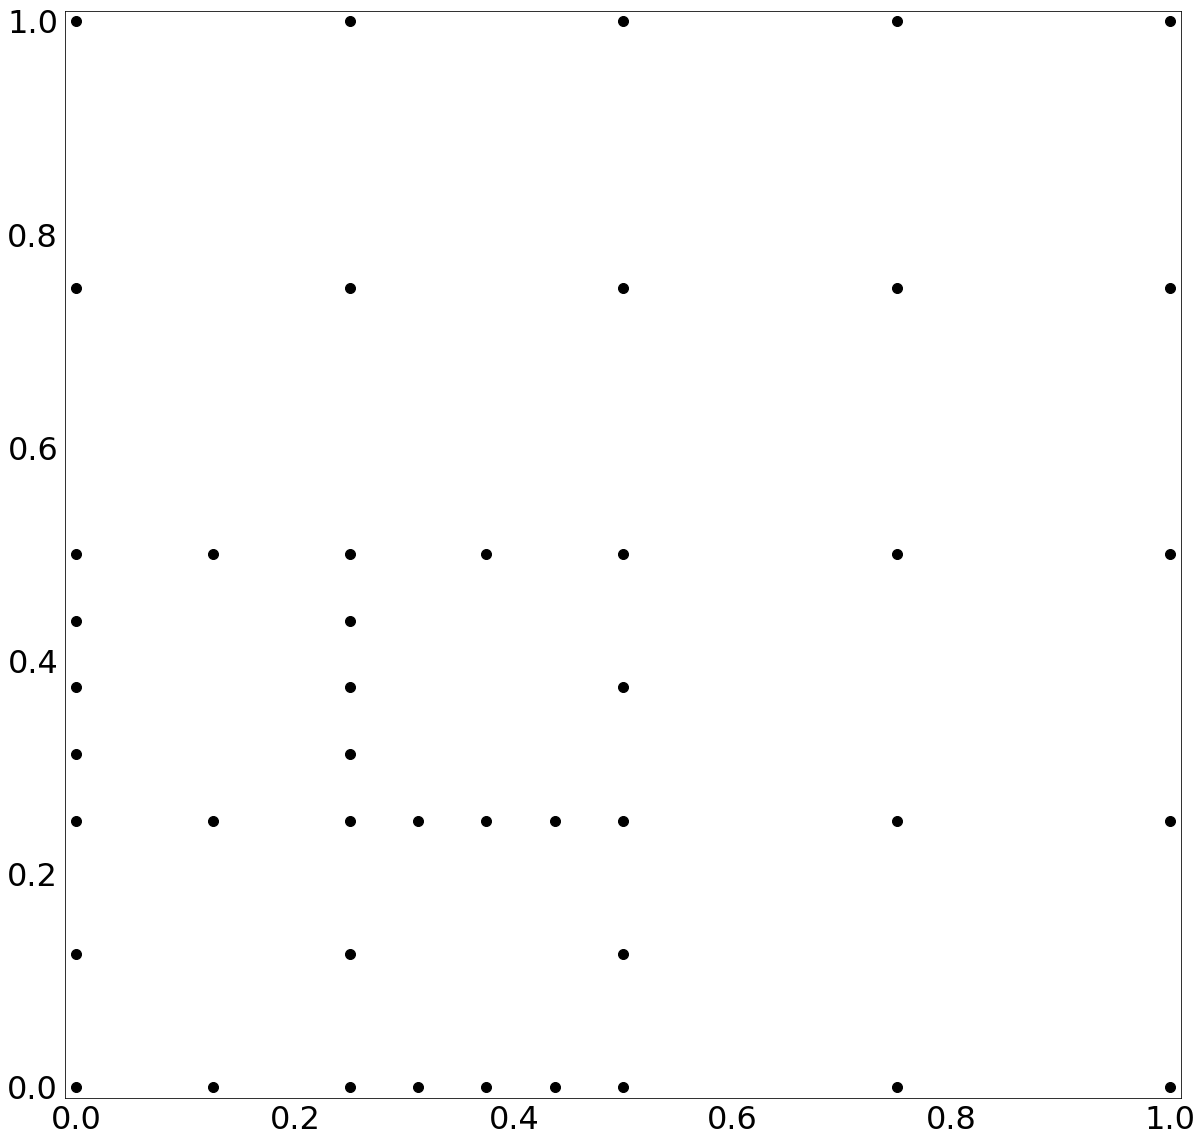

max error: 0.00141155268209
combiintegral: 0.112405956691
Current error: 0.0961247193043
Finished refinement


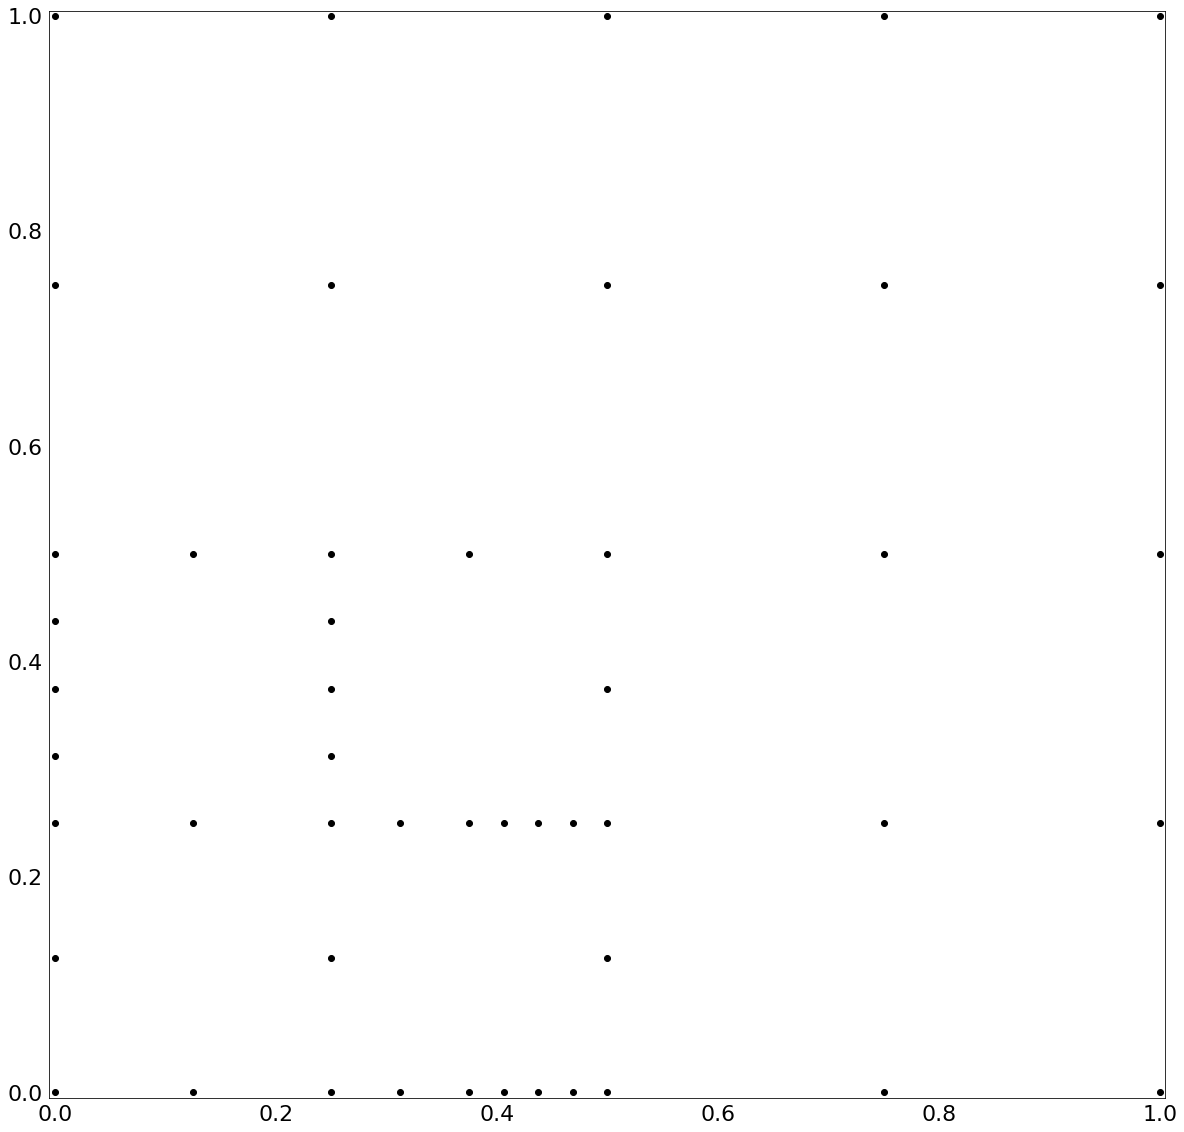

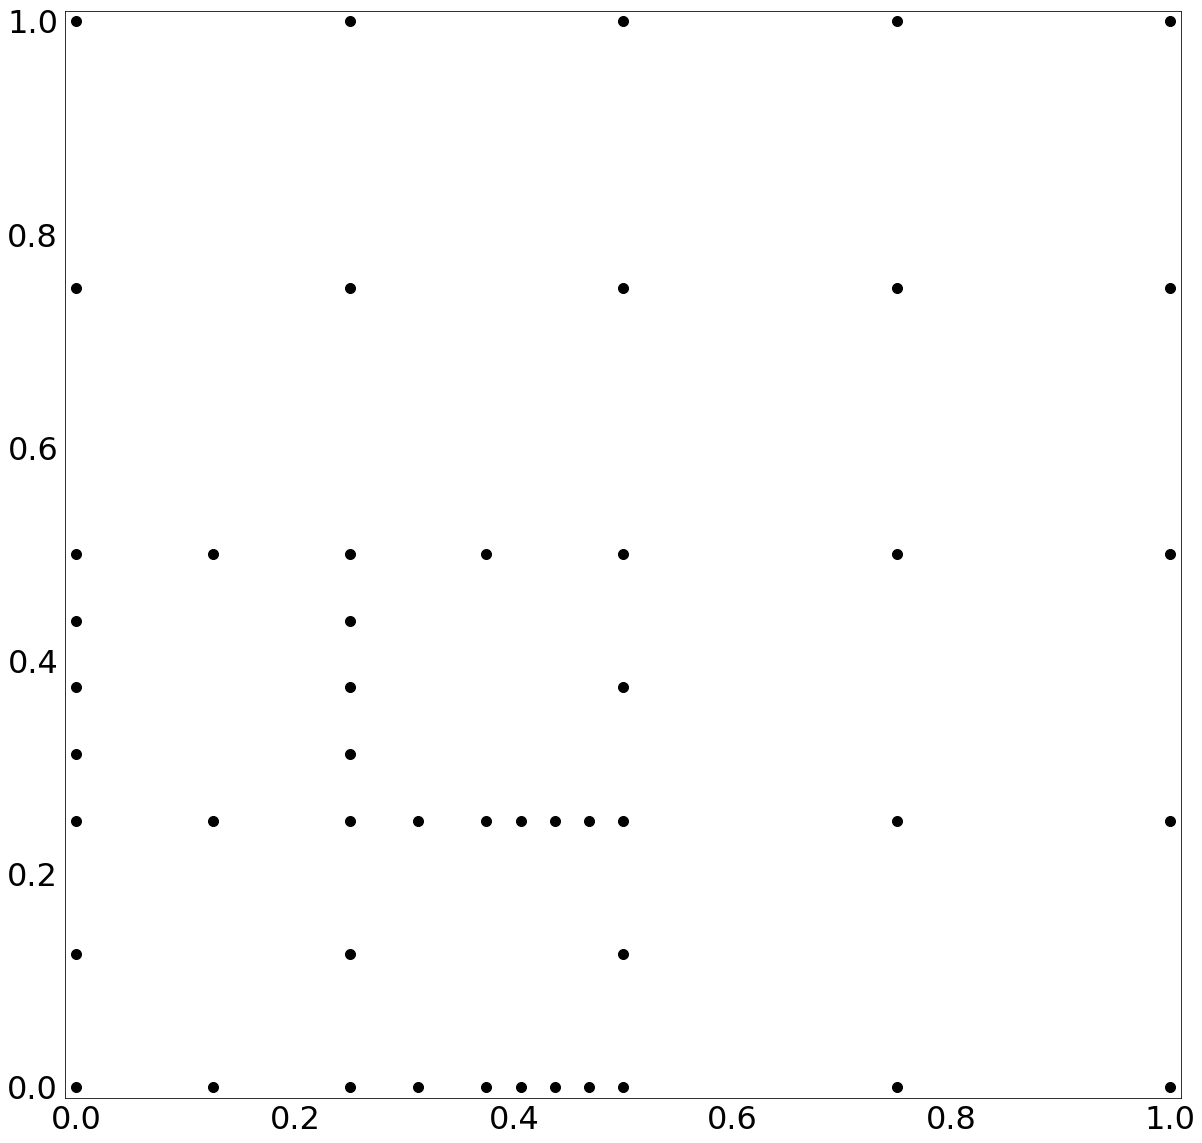

max error: 0.00125543550813
combiintegral: 0.113830235134
Current error: 0.0846718558139
Finished refinement


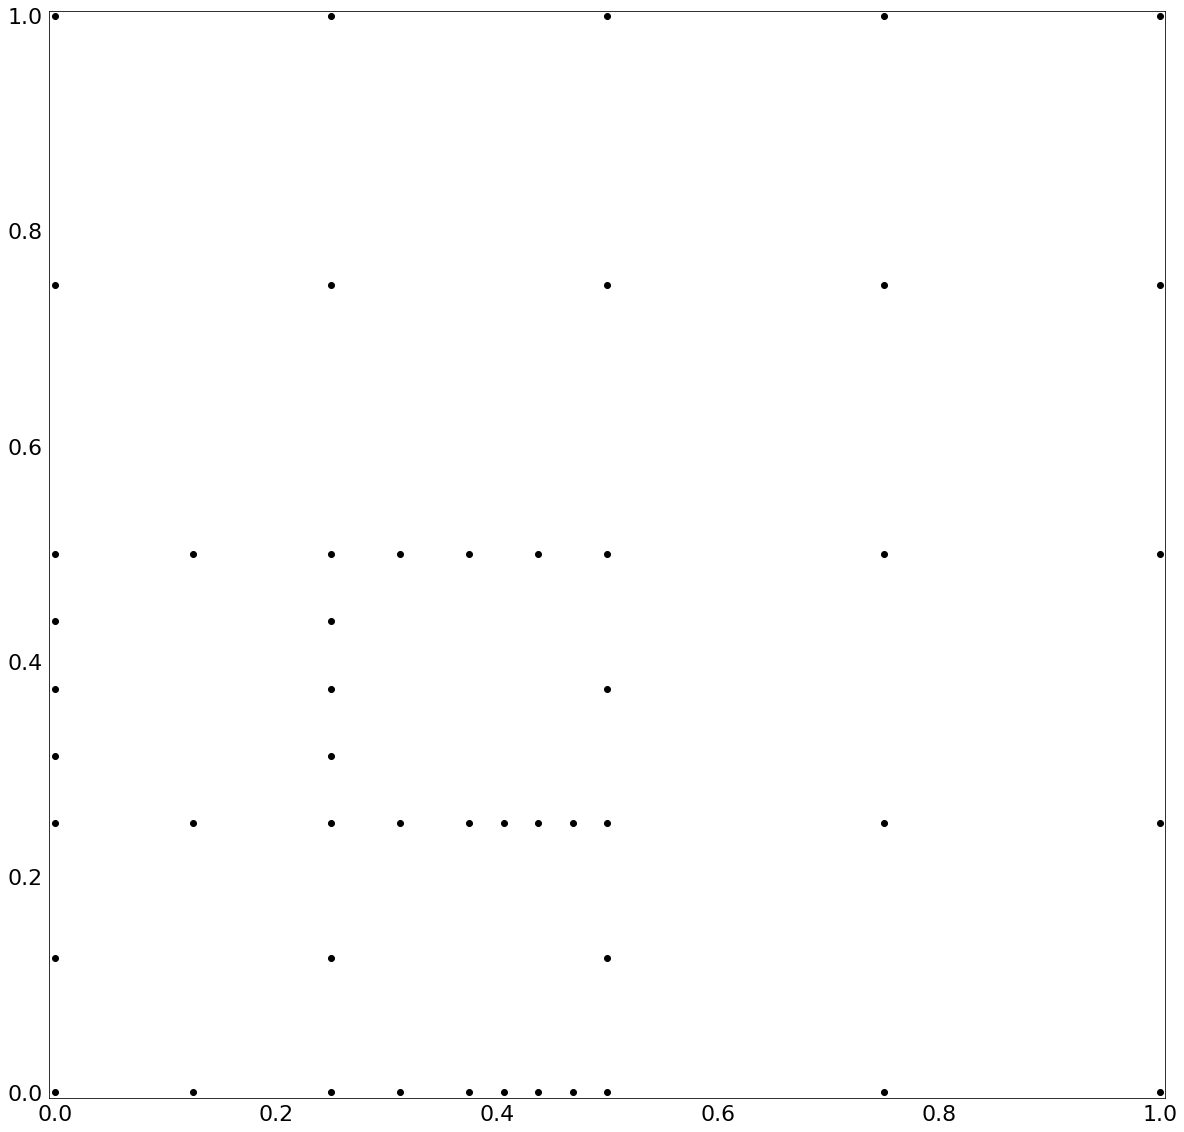

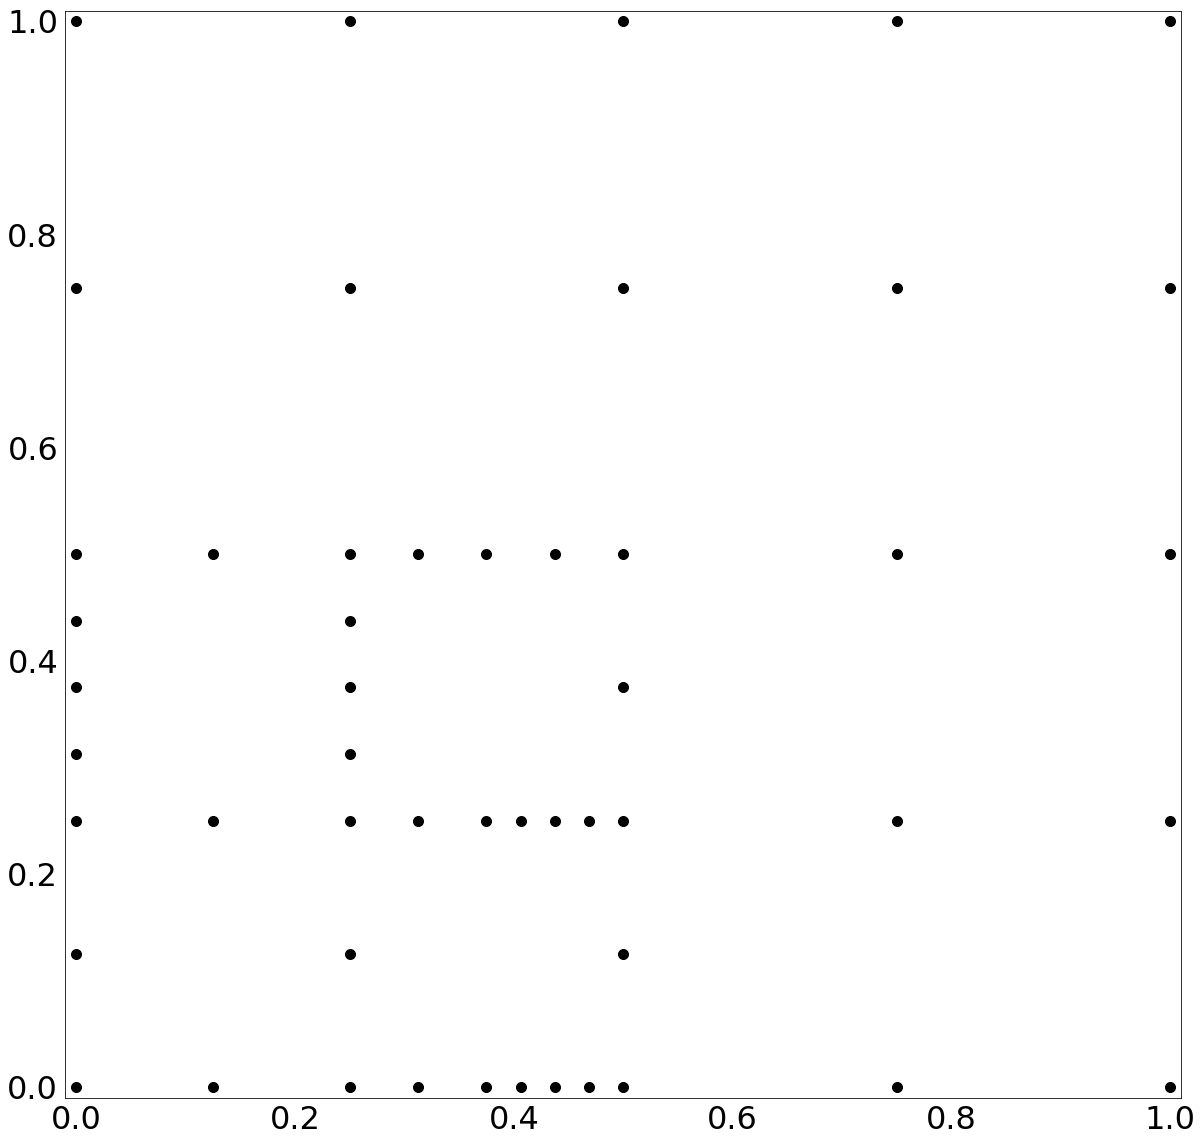

max error: 0.00102887628751
combiintegral: 0.115096988939
Current error: 0.0744856745414
Finished refinement


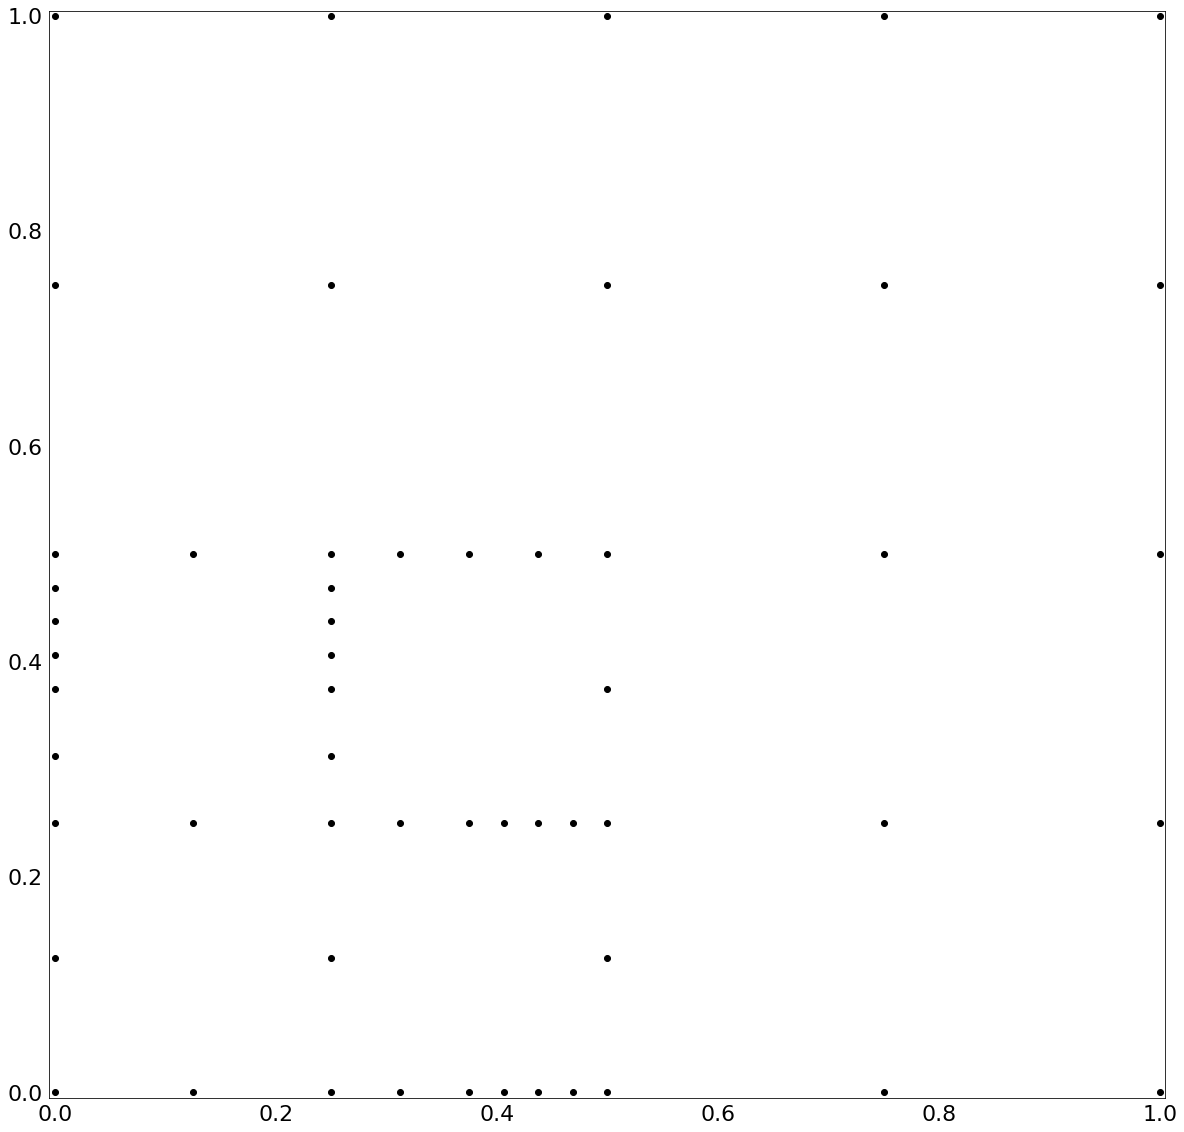

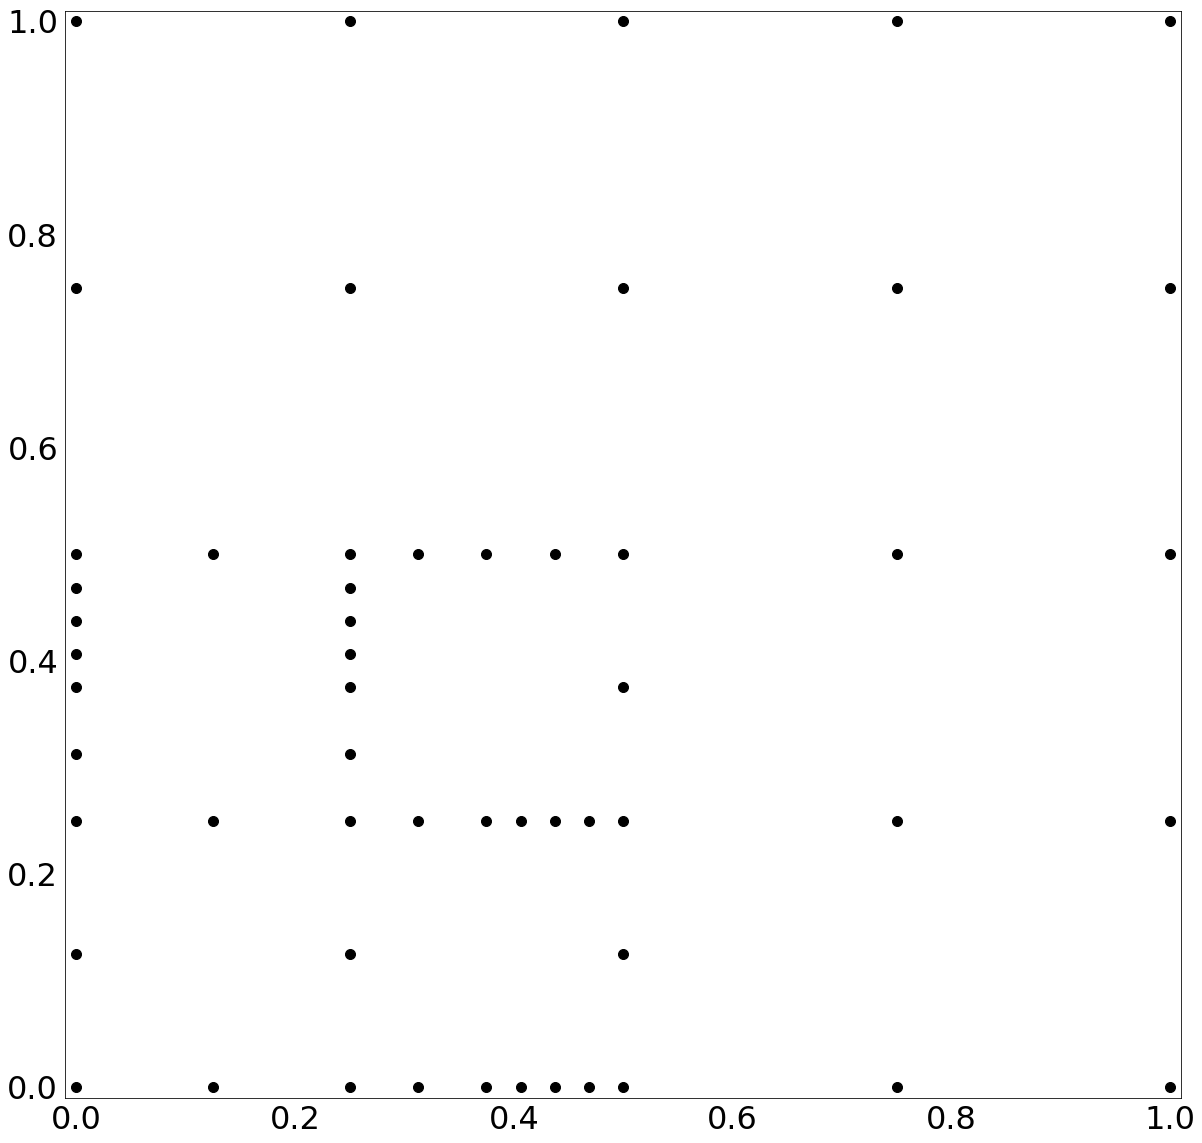

max error: 0.000715525847022
combiintegral: 0.117909007786
Current error: 0.0518737561014
Finished refinement


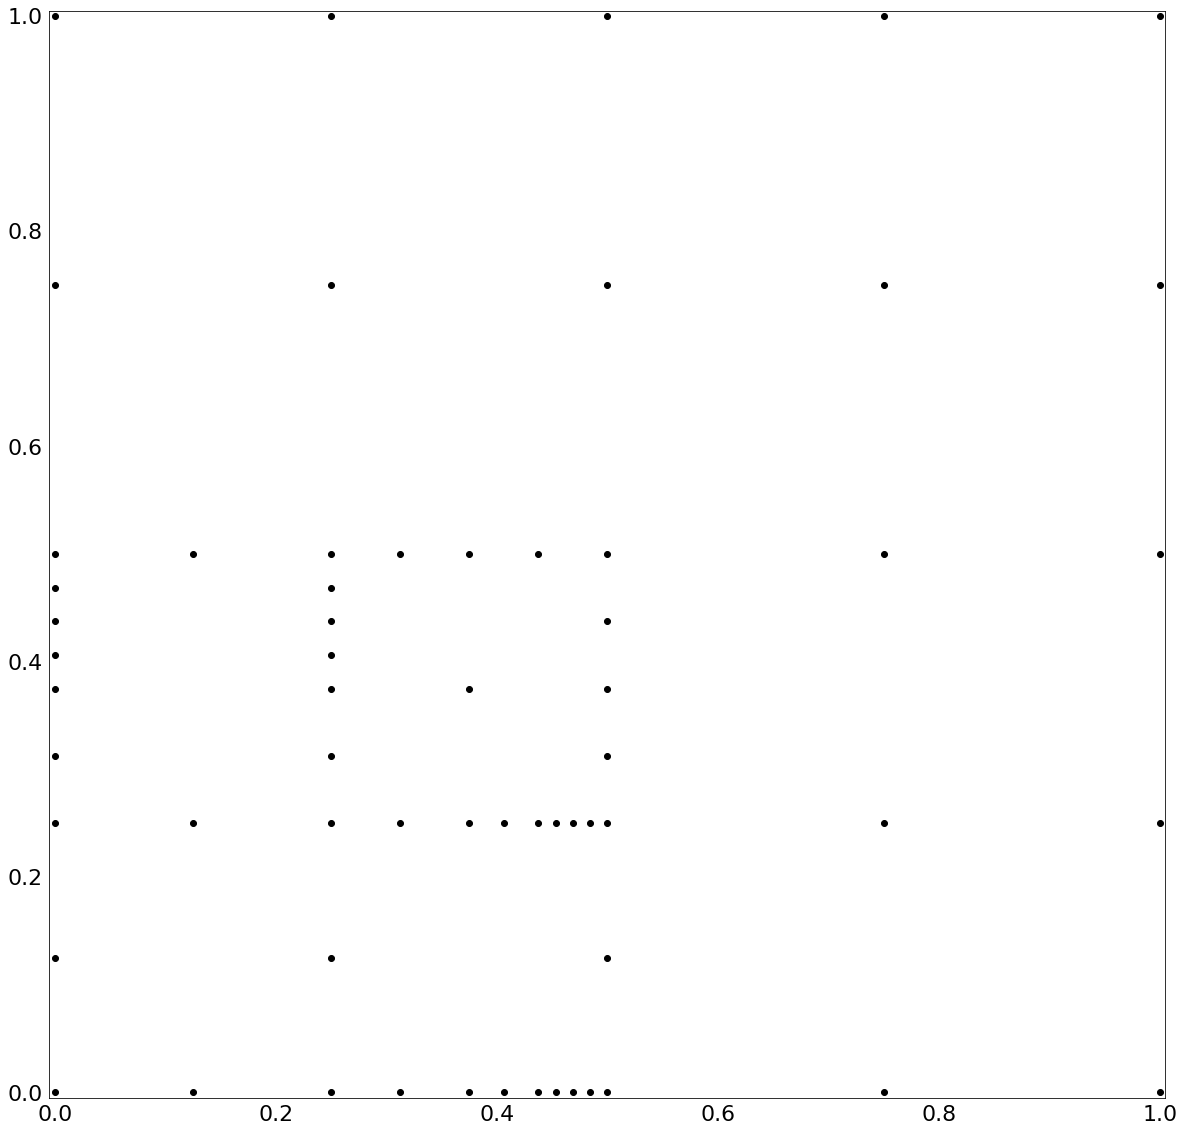

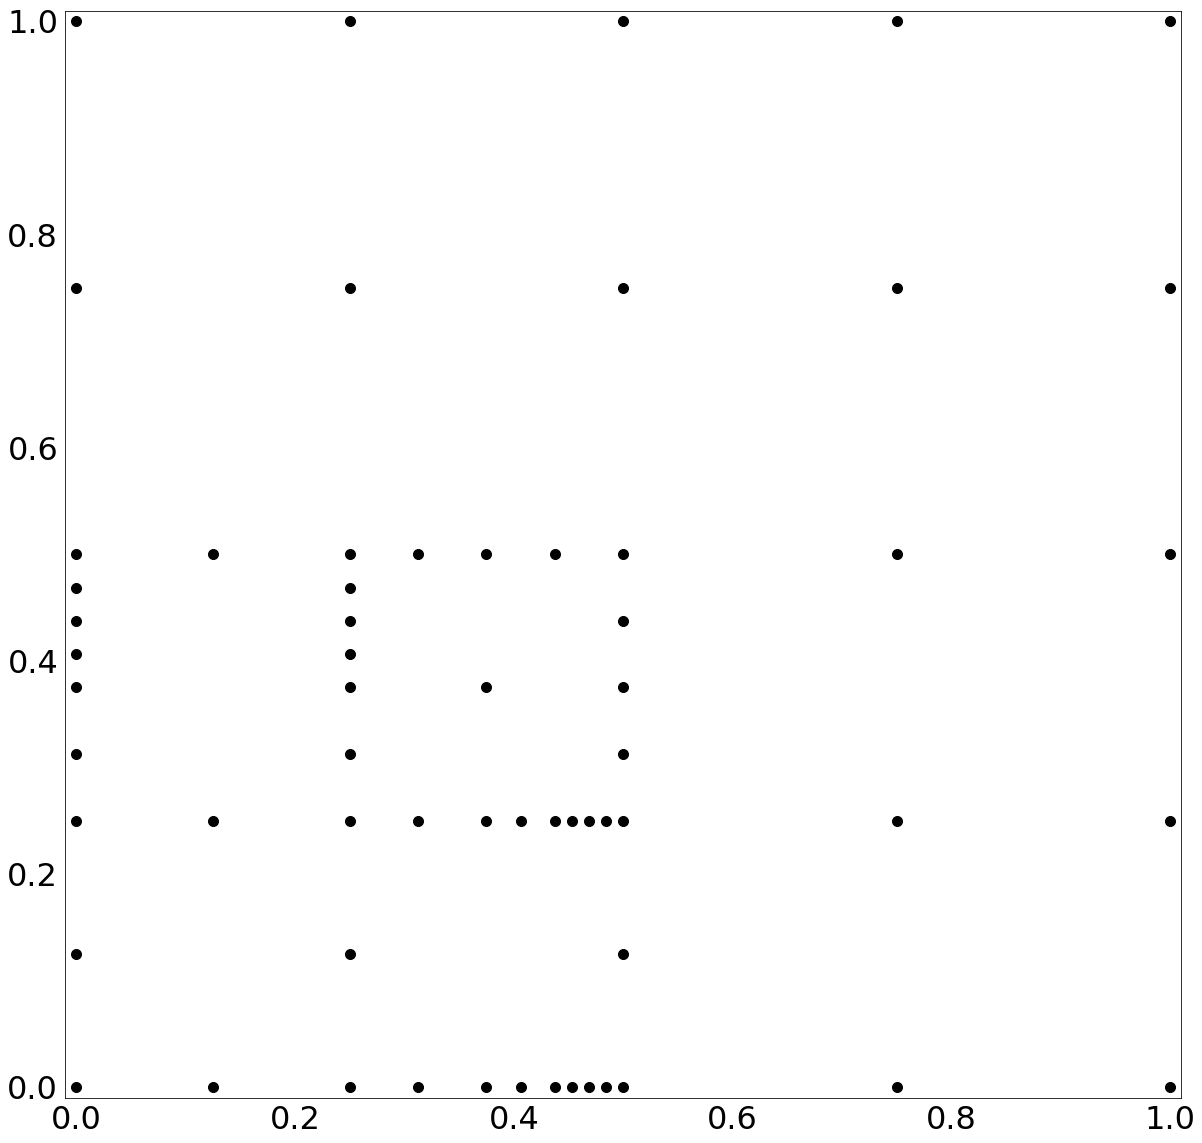

max error: 0.000636388968495
combiintegral: 0.118626027612
Current error: 0.0461080785953
Finished refinement


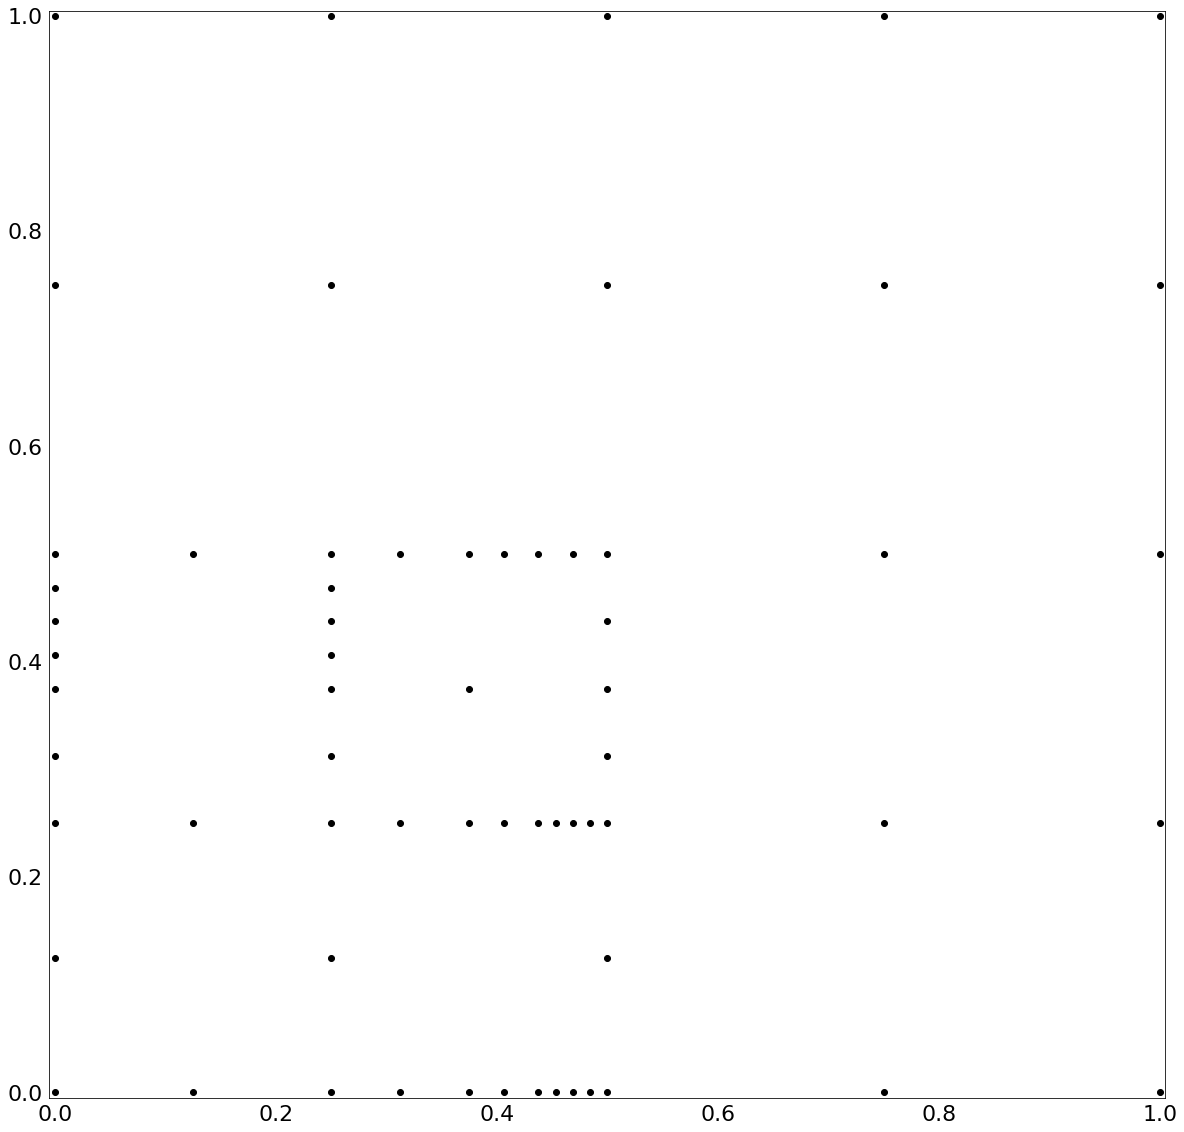

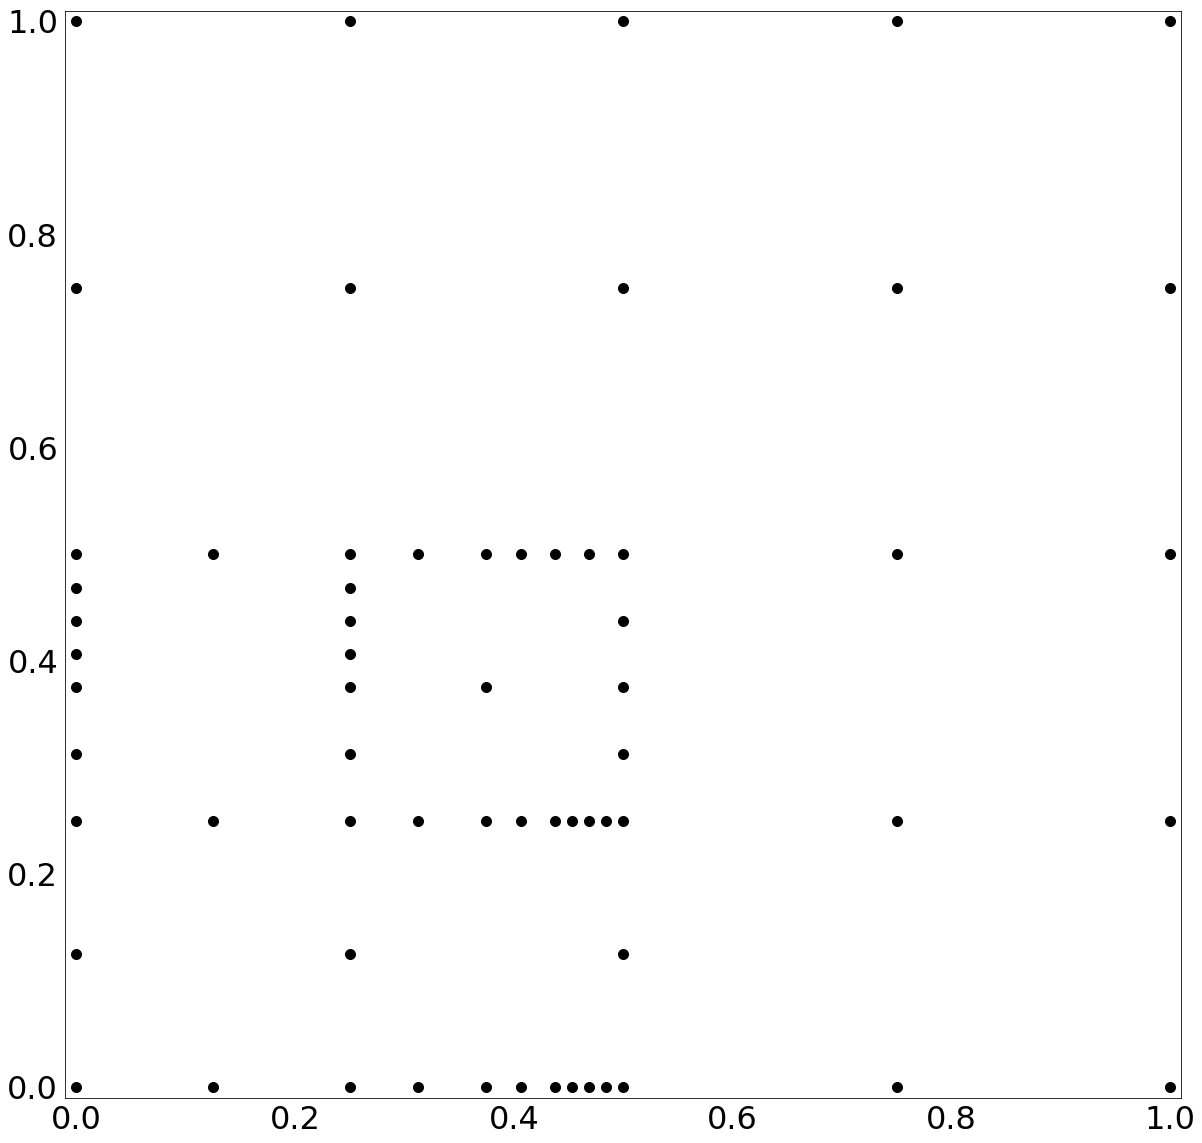

max error: 0.000549659167081
combiintegral: 0.119263745325
Current error: 0.0409800827639
Finished refinement


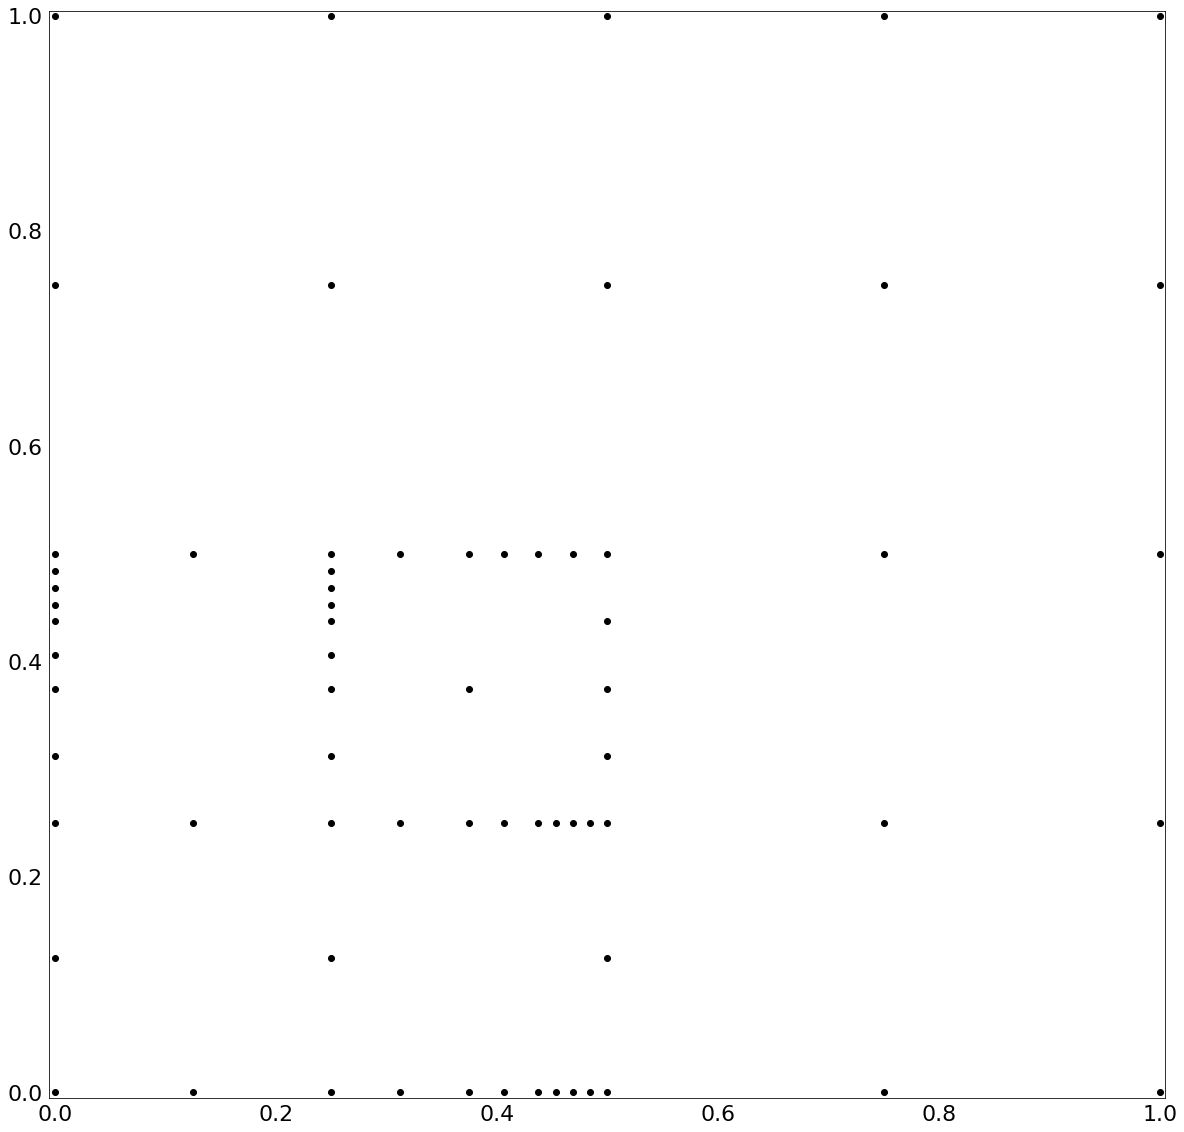

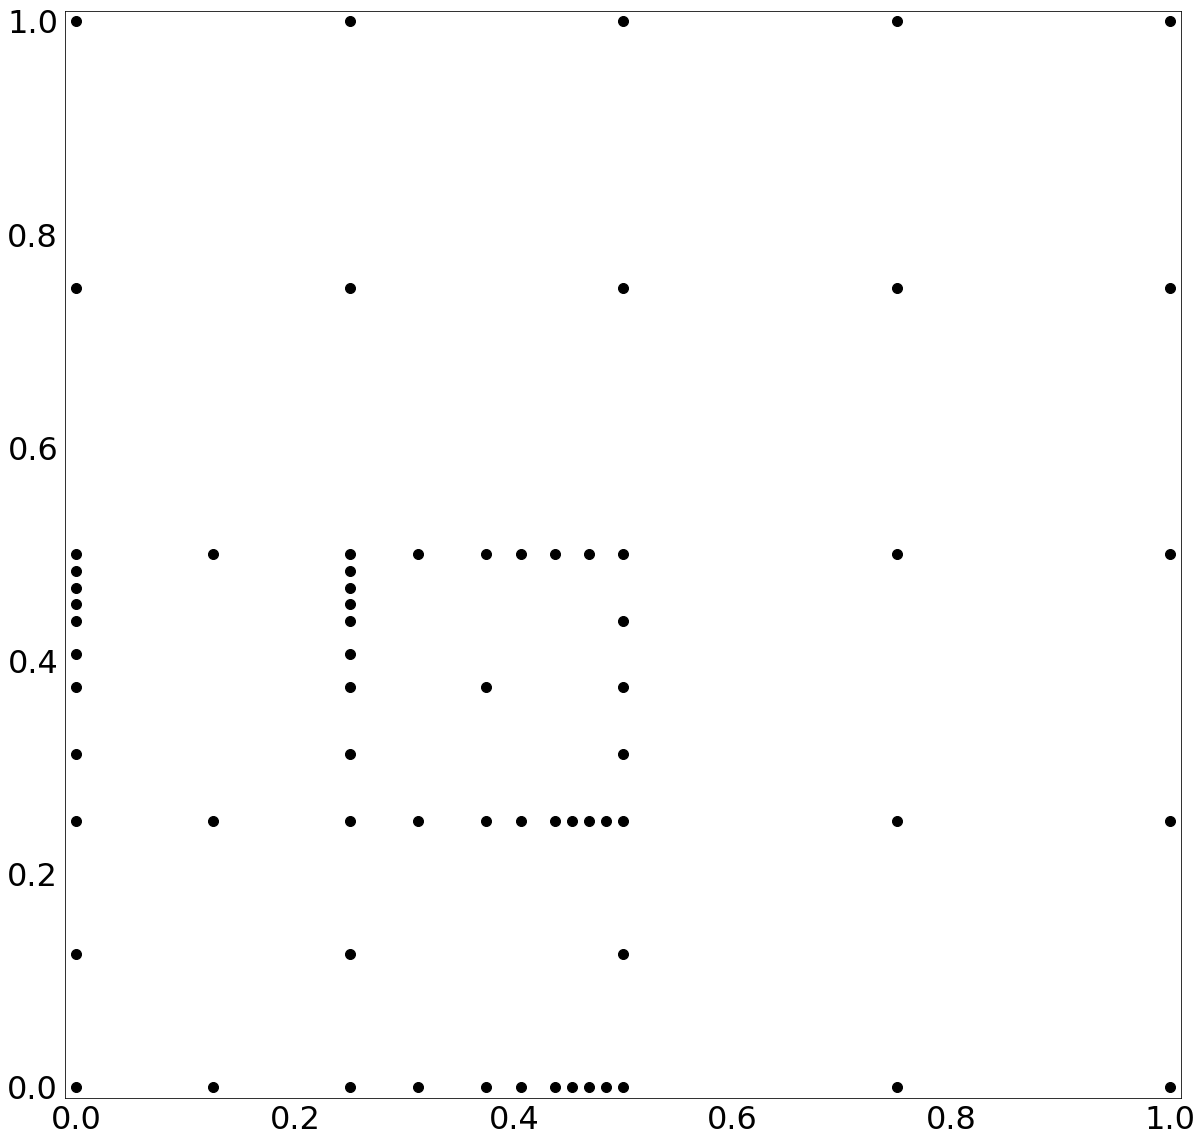

max error: 0.000475668191702
combiintegral: 0.119818359909
Current error: 0.0365203332365
Finished refinement


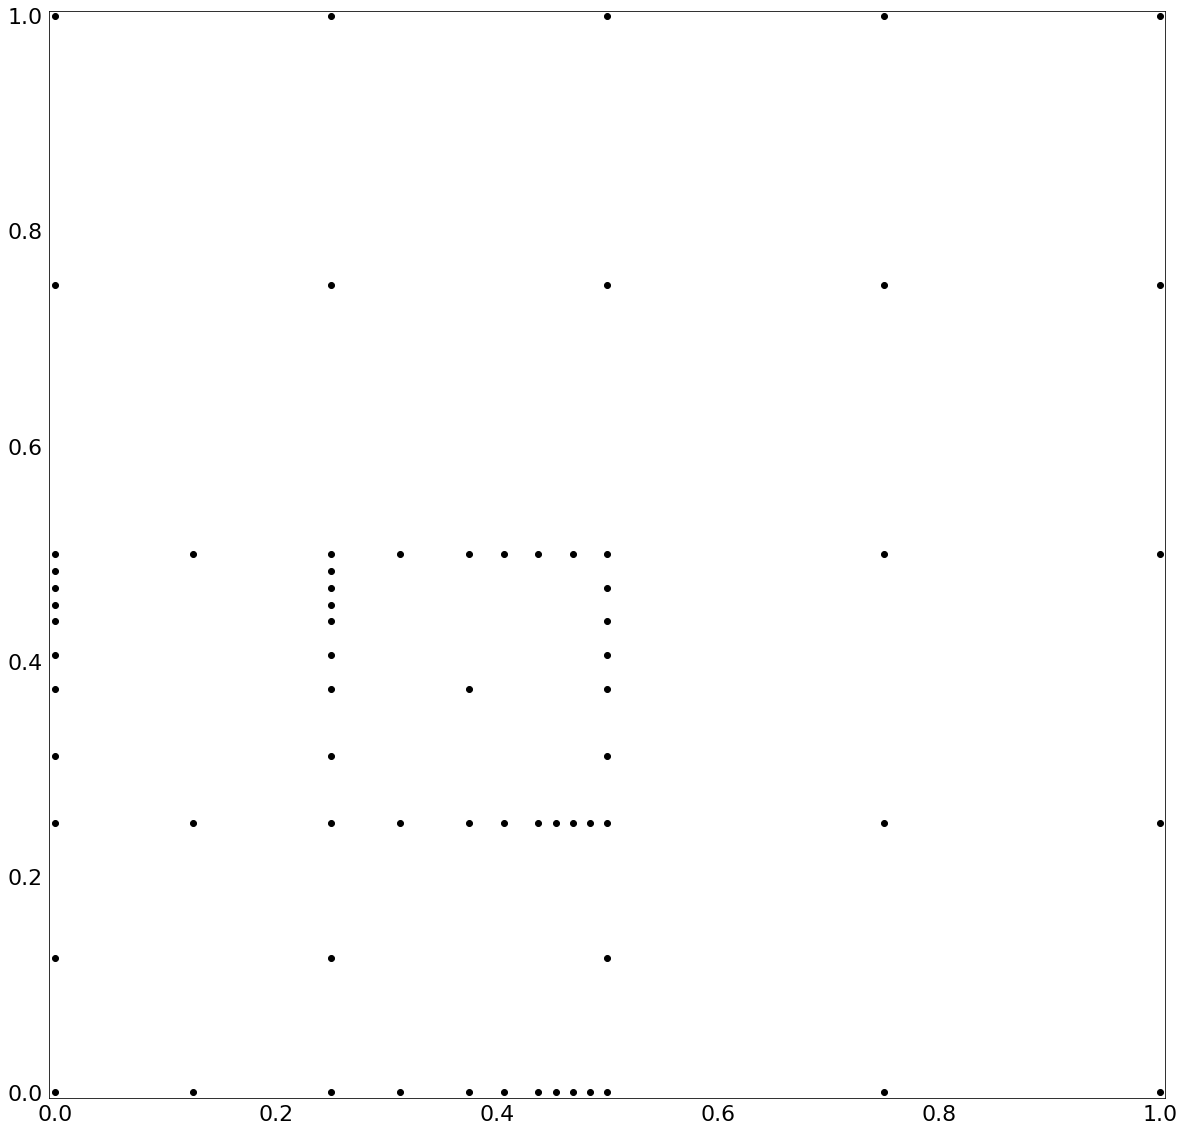

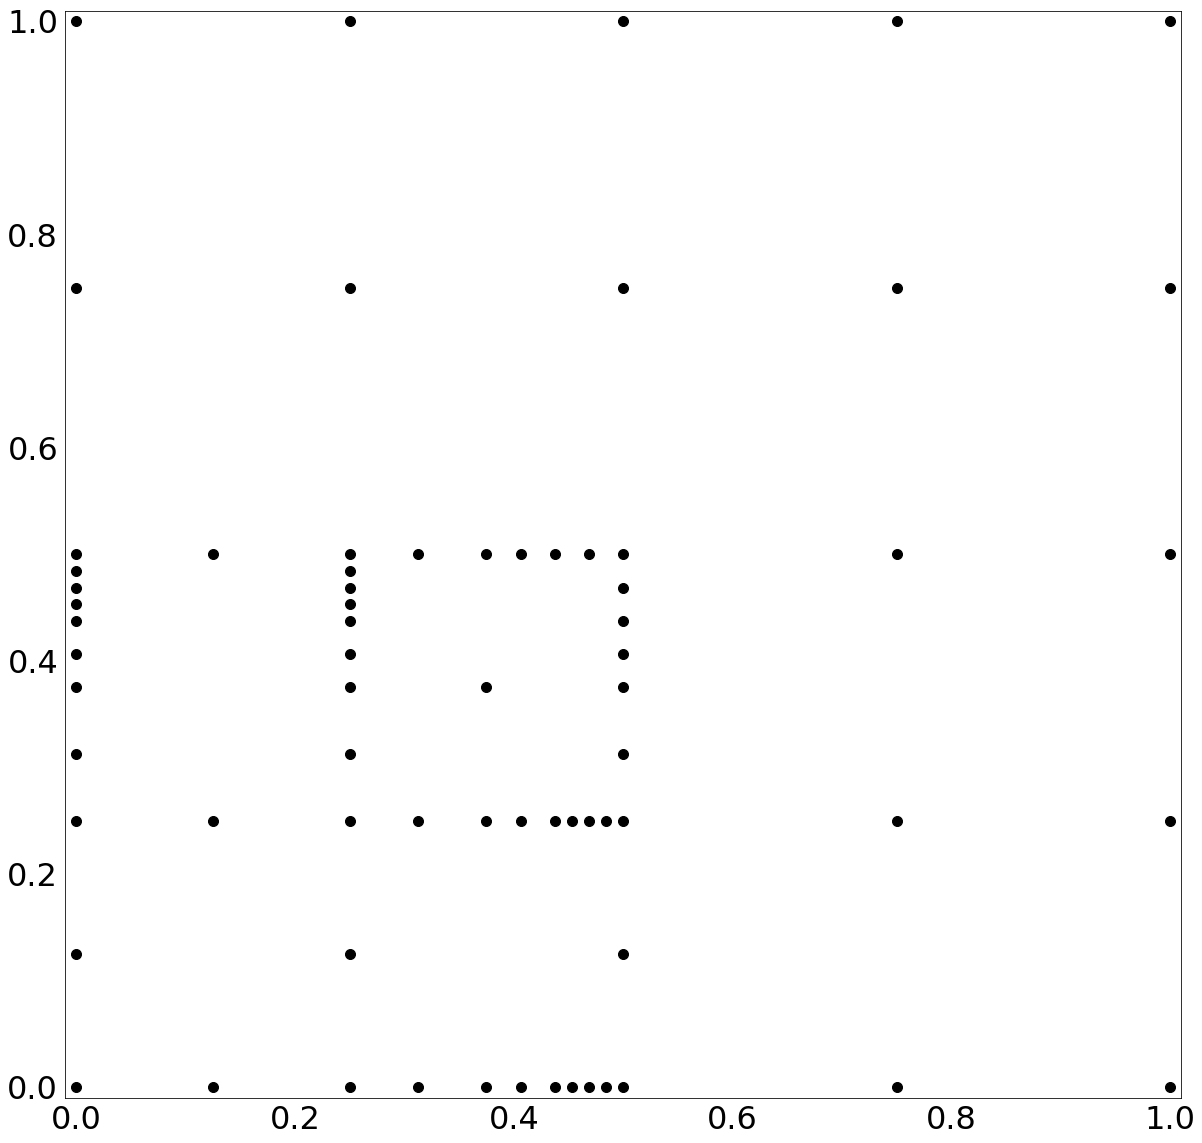

max error: 0.000358895263369
combiintegral: 0.120294087095
Current error: 0.0326949305939
Finished refinement


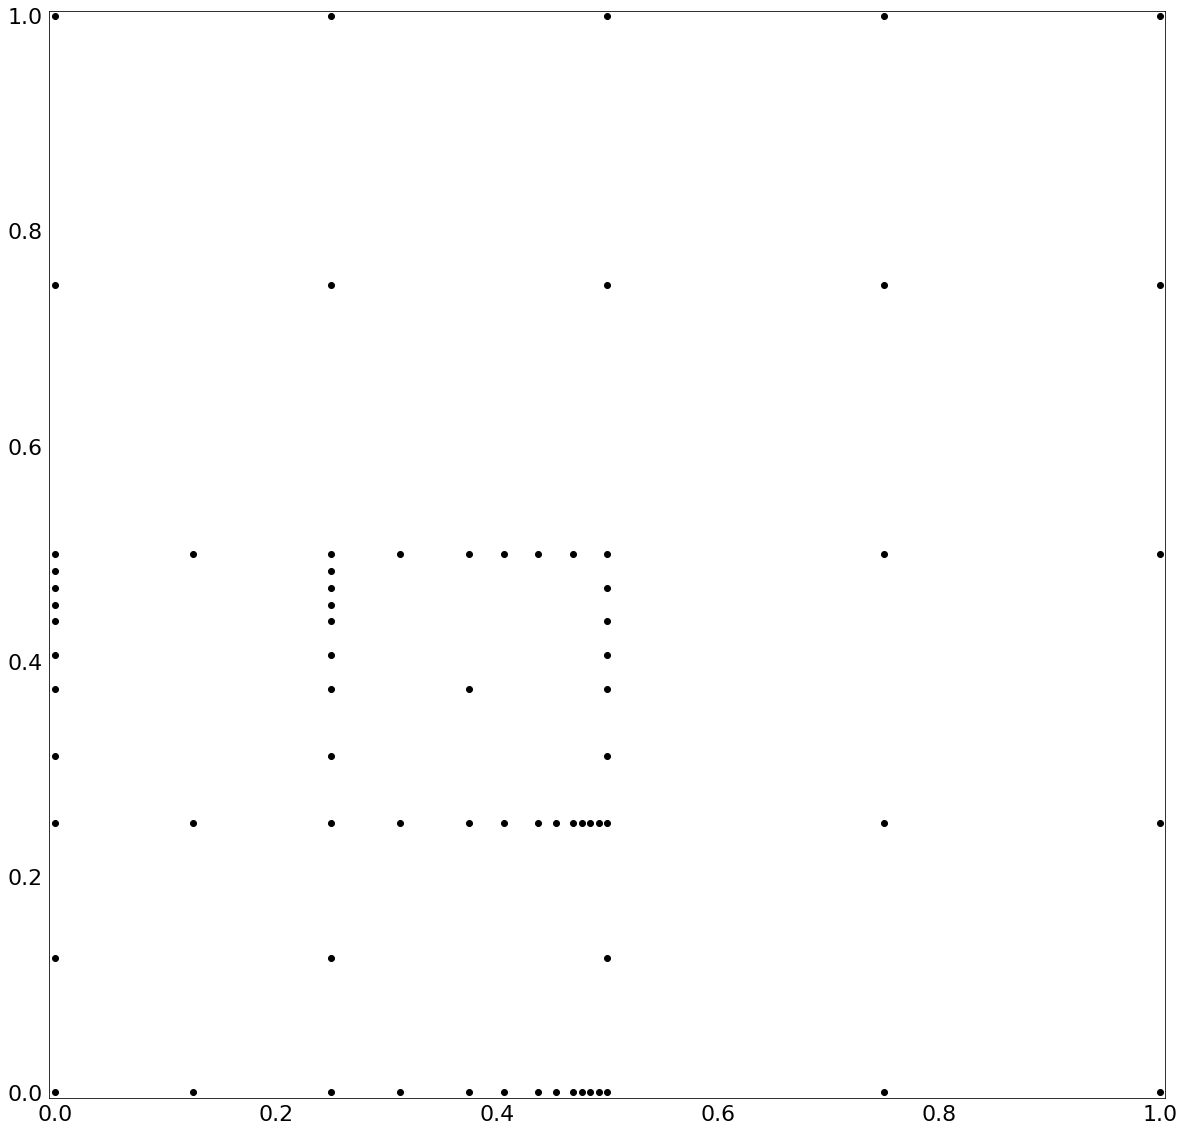

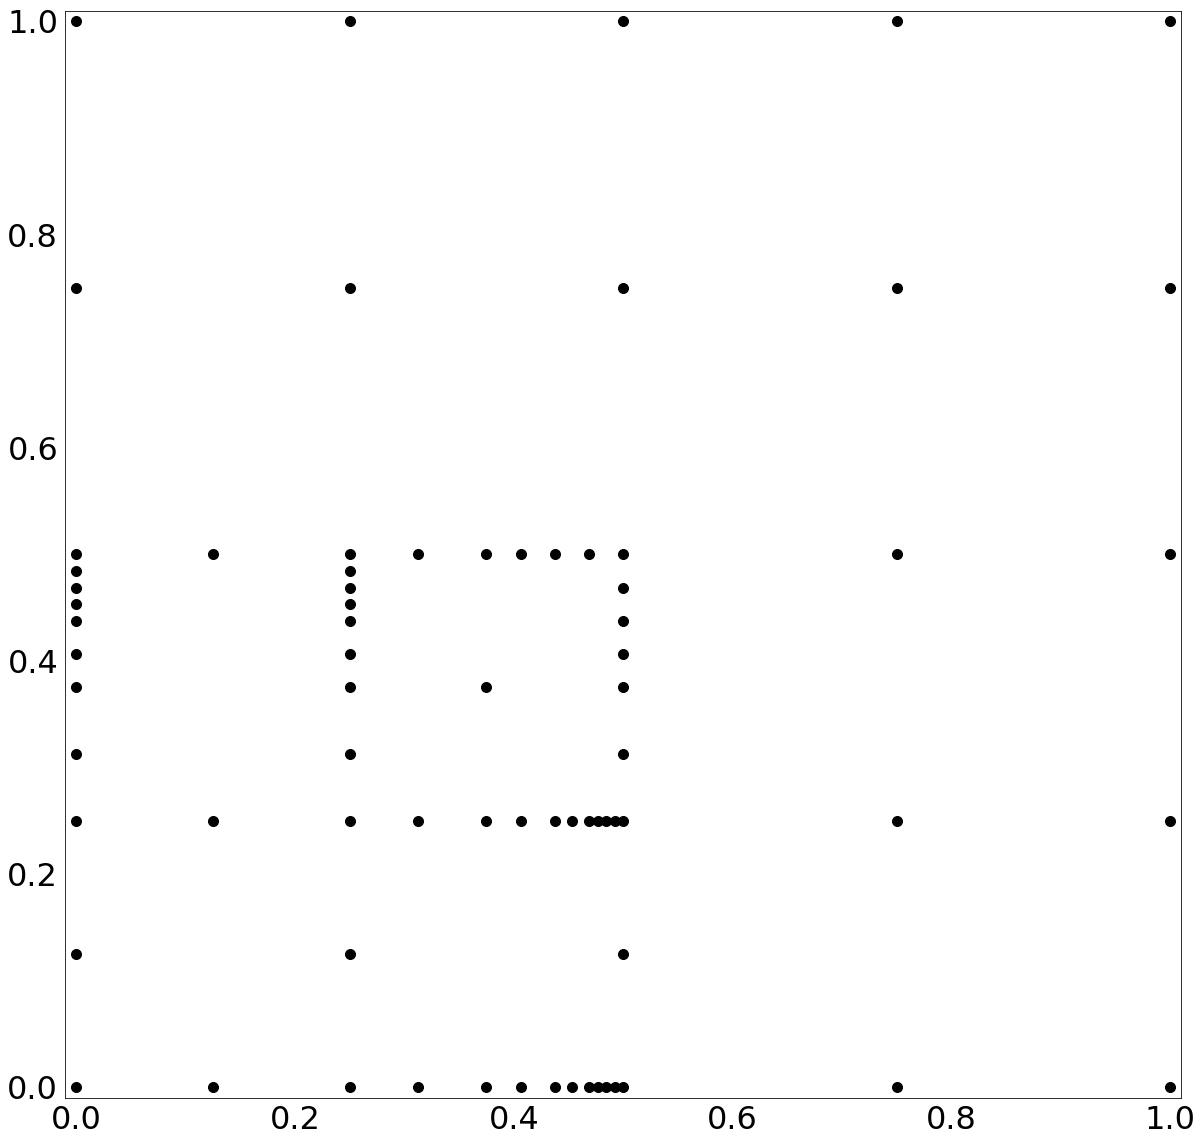

max error: 0.00031920158776
combiintegral: 0.1204825106
Current error: 0.0311797853687
Finished refinement


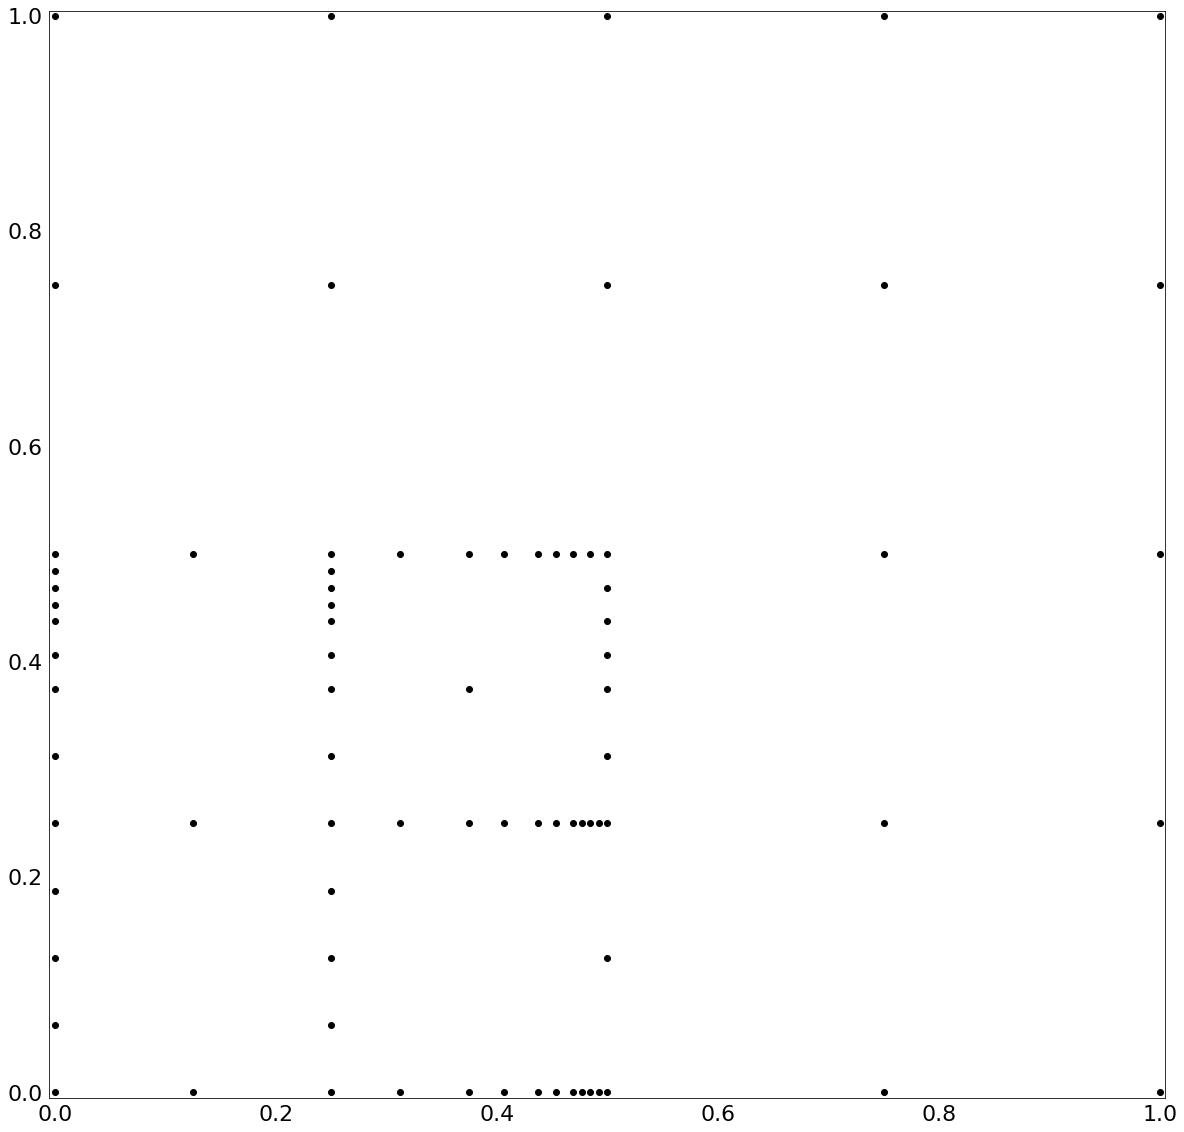

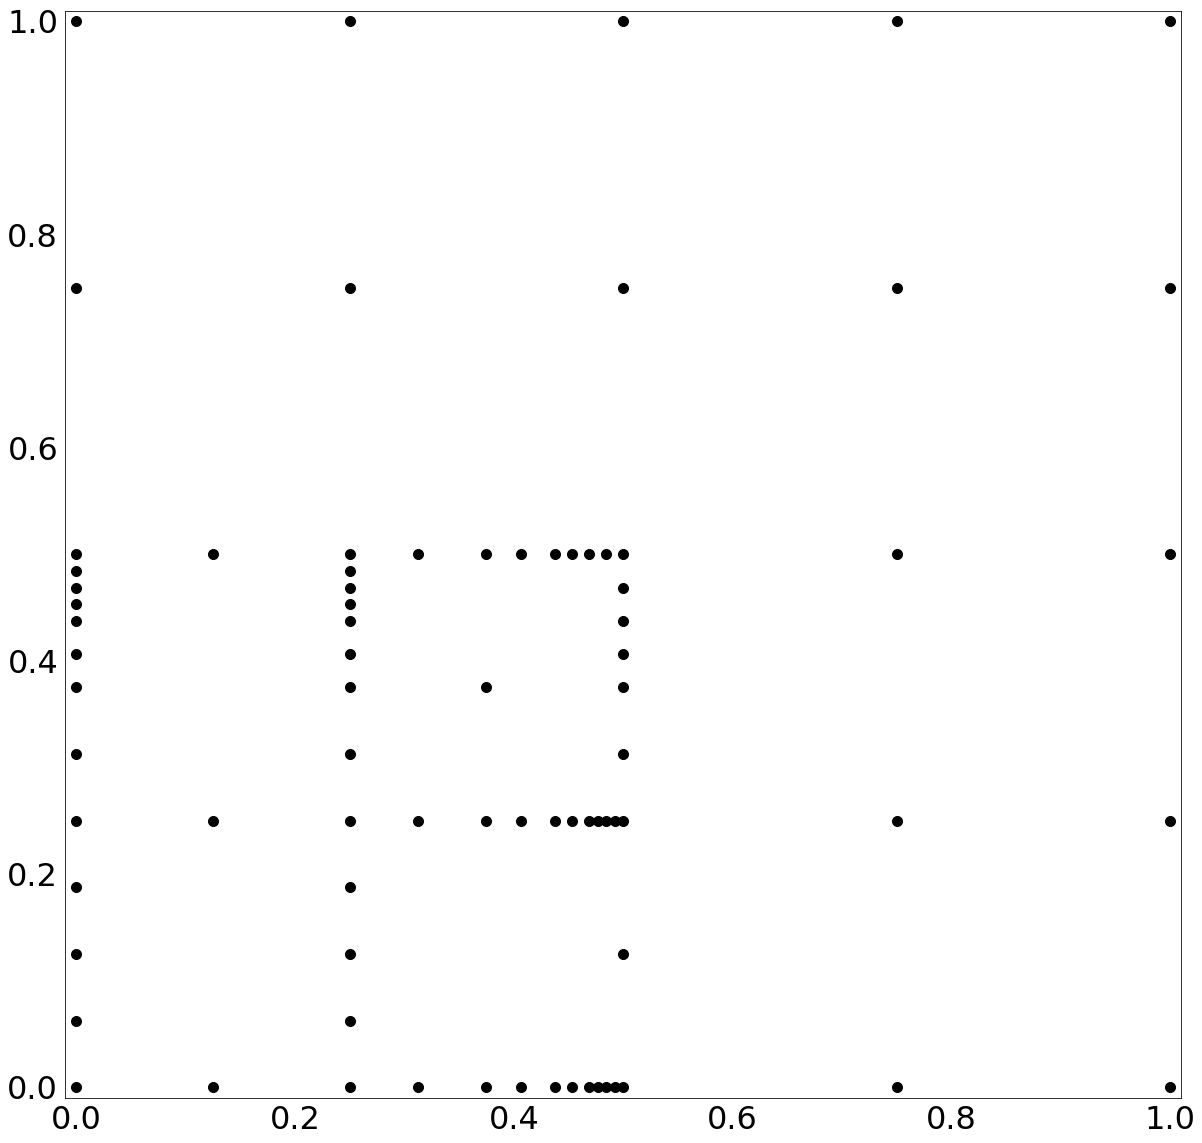

max error: 0.000278626044984
combiintegral: 0.120801873161
Current error: 0.0286117370829
Finished refinement


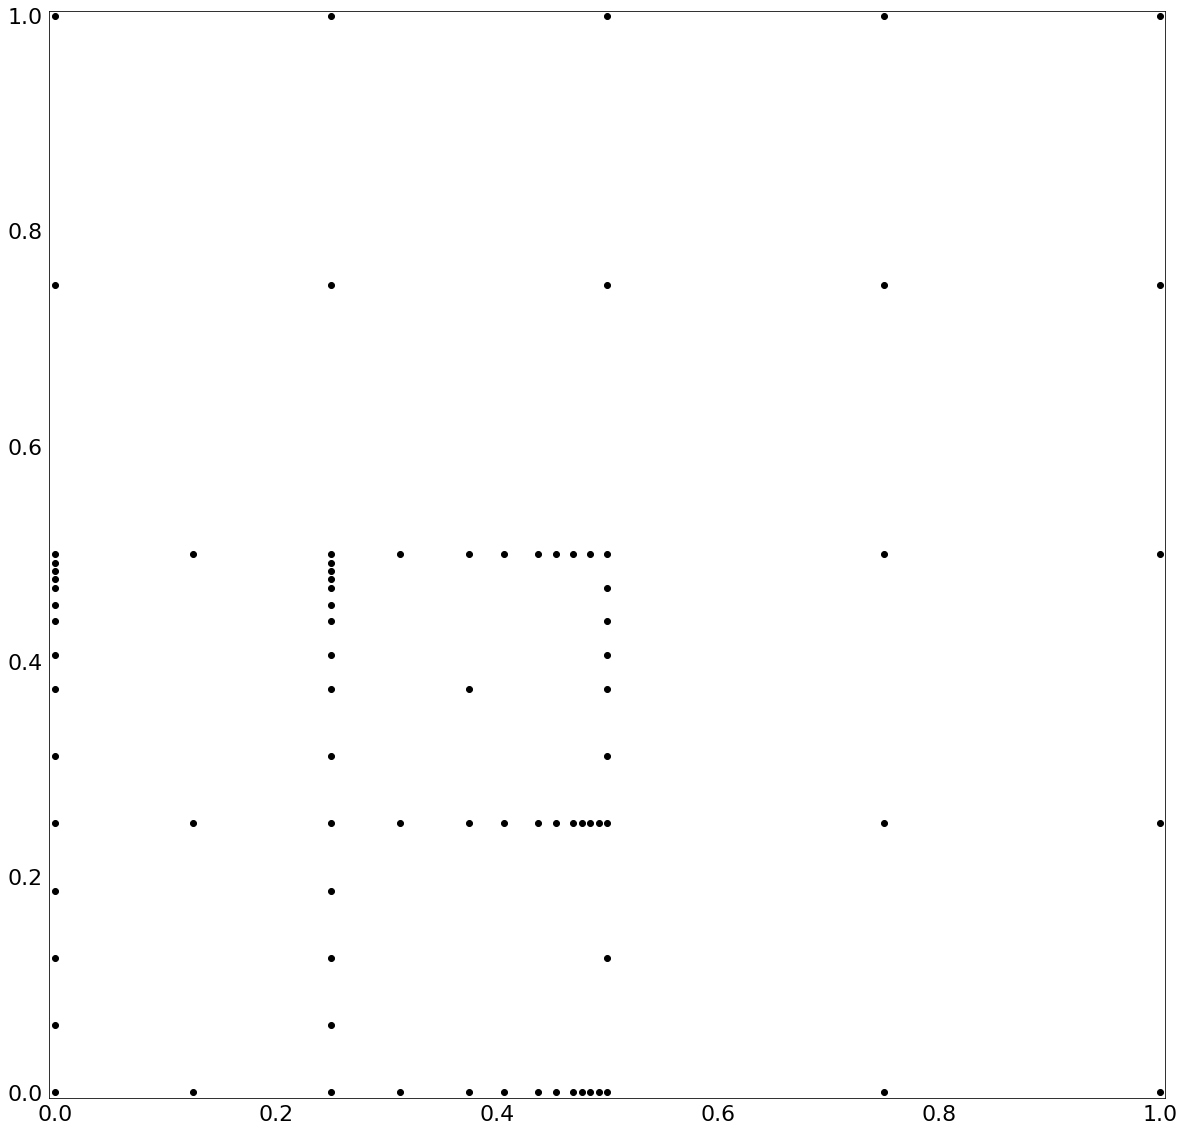

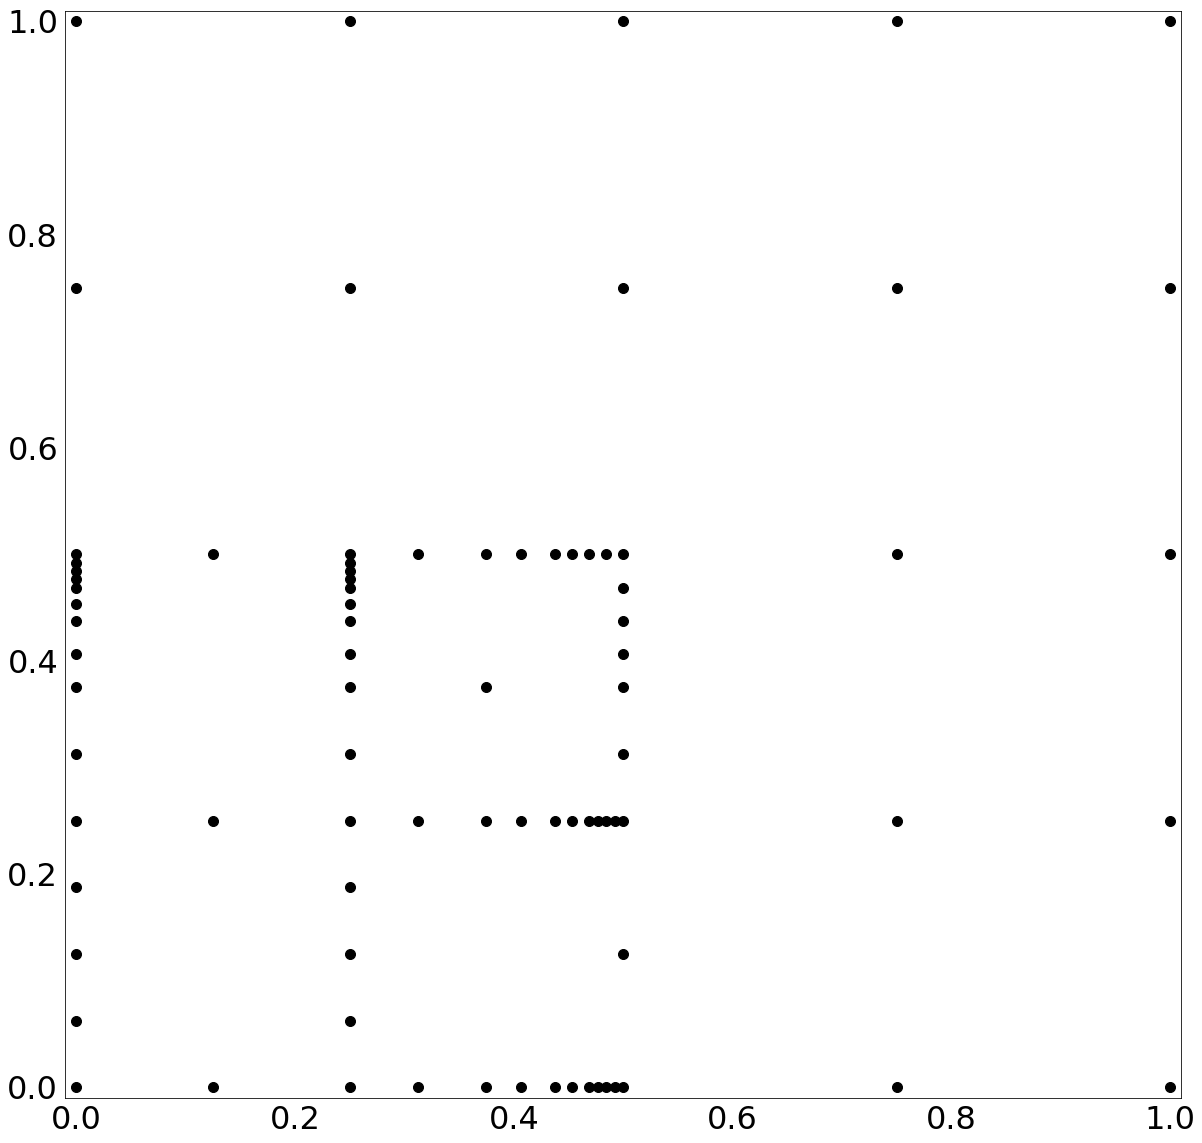

max error: 0.000237878457239
combiintegral: 0.121081080962
Current error: 0.0263665800045
Finished refinement


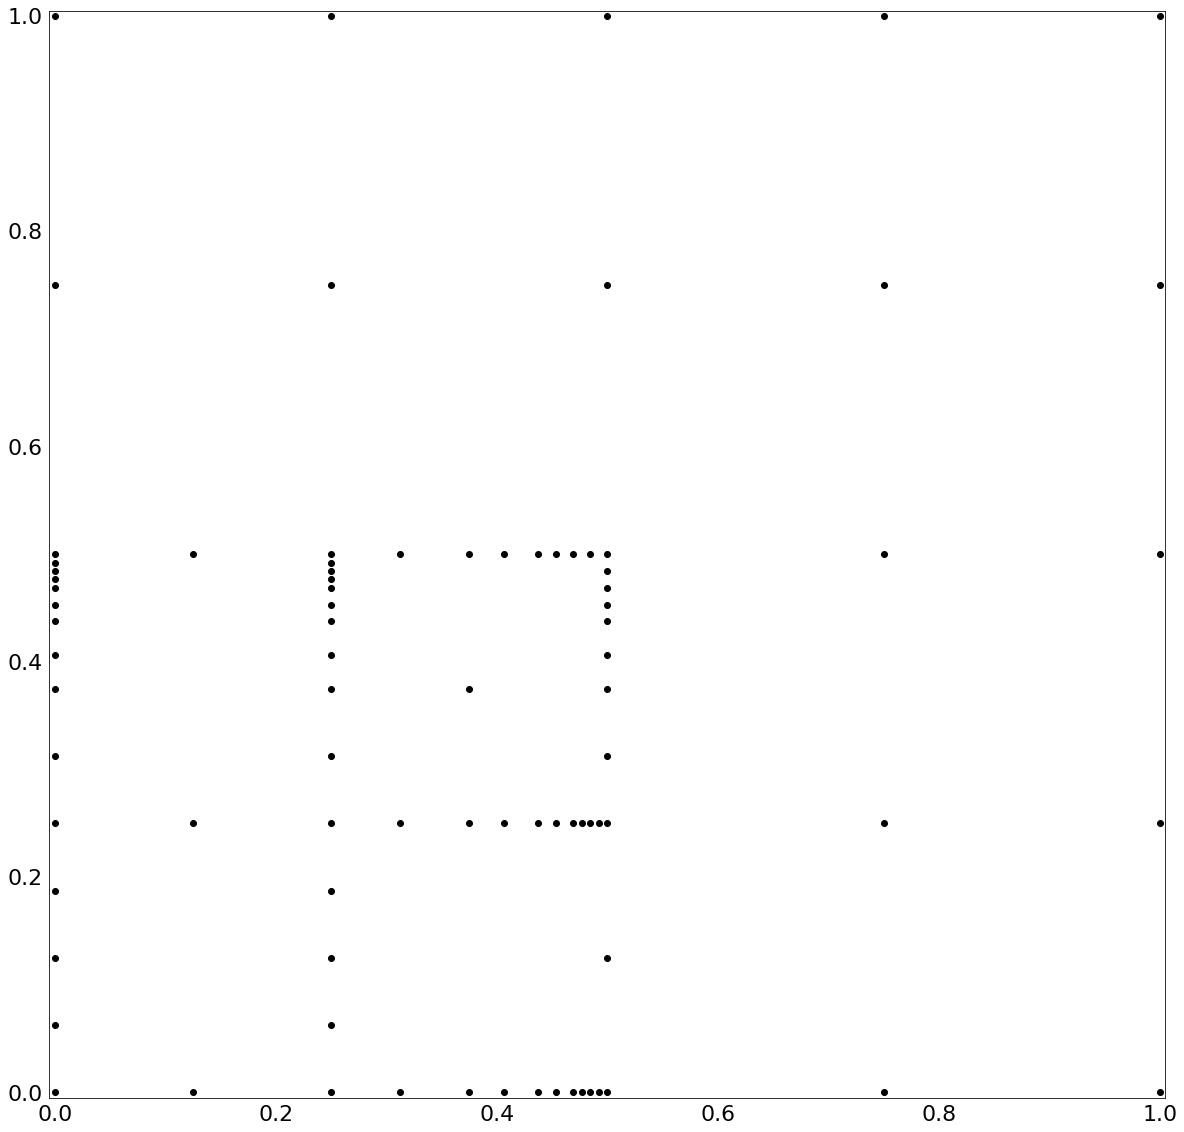

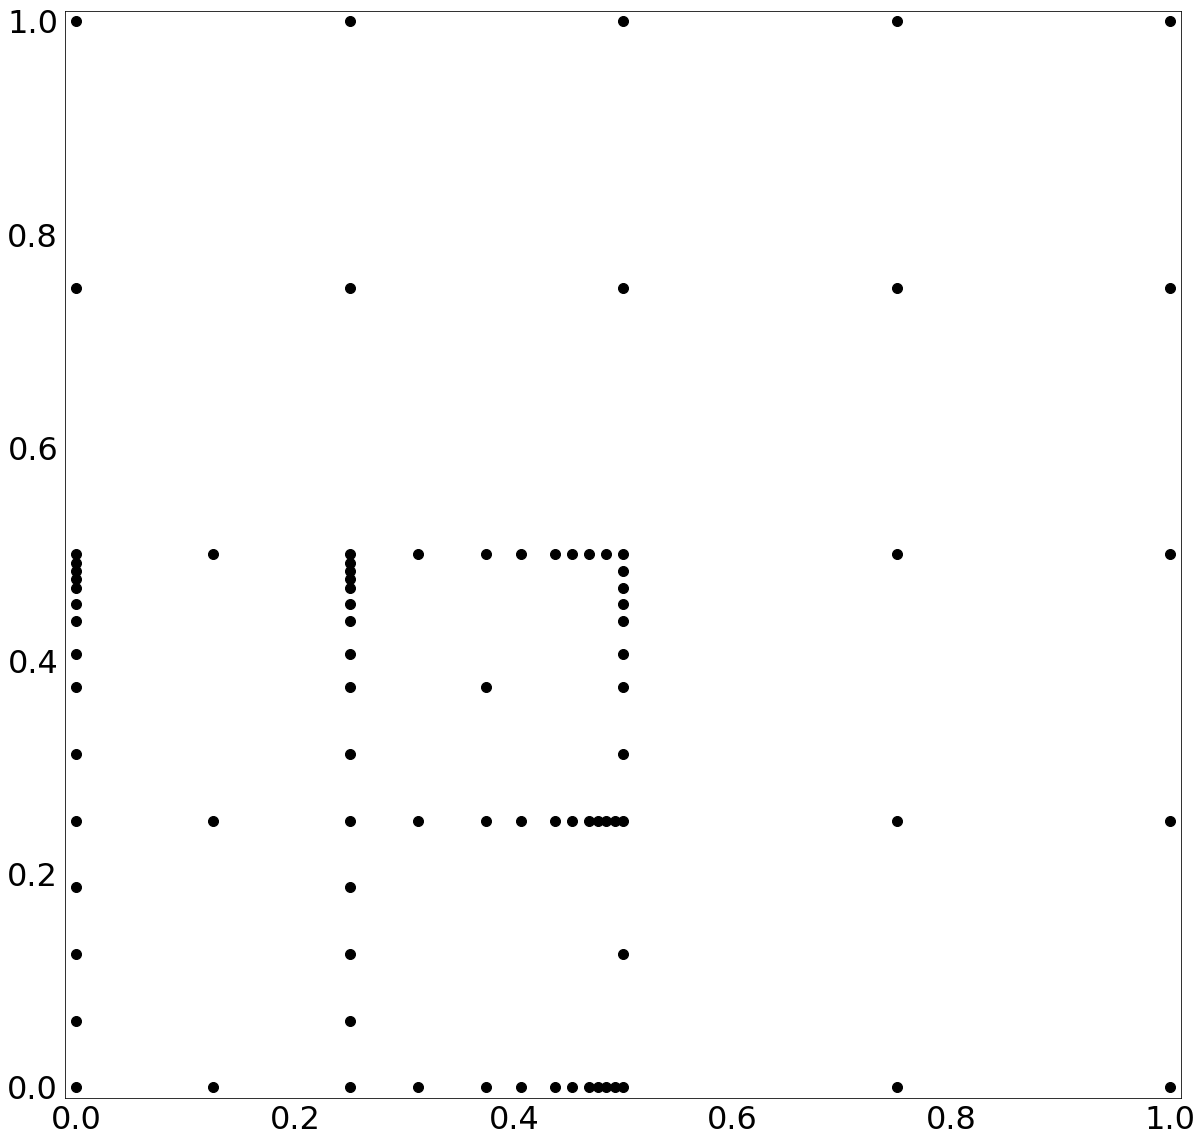

max error: 0.000196770996557
combiintegral: 0.121318966736
Current error: 0.0244537003212
Finished refinement


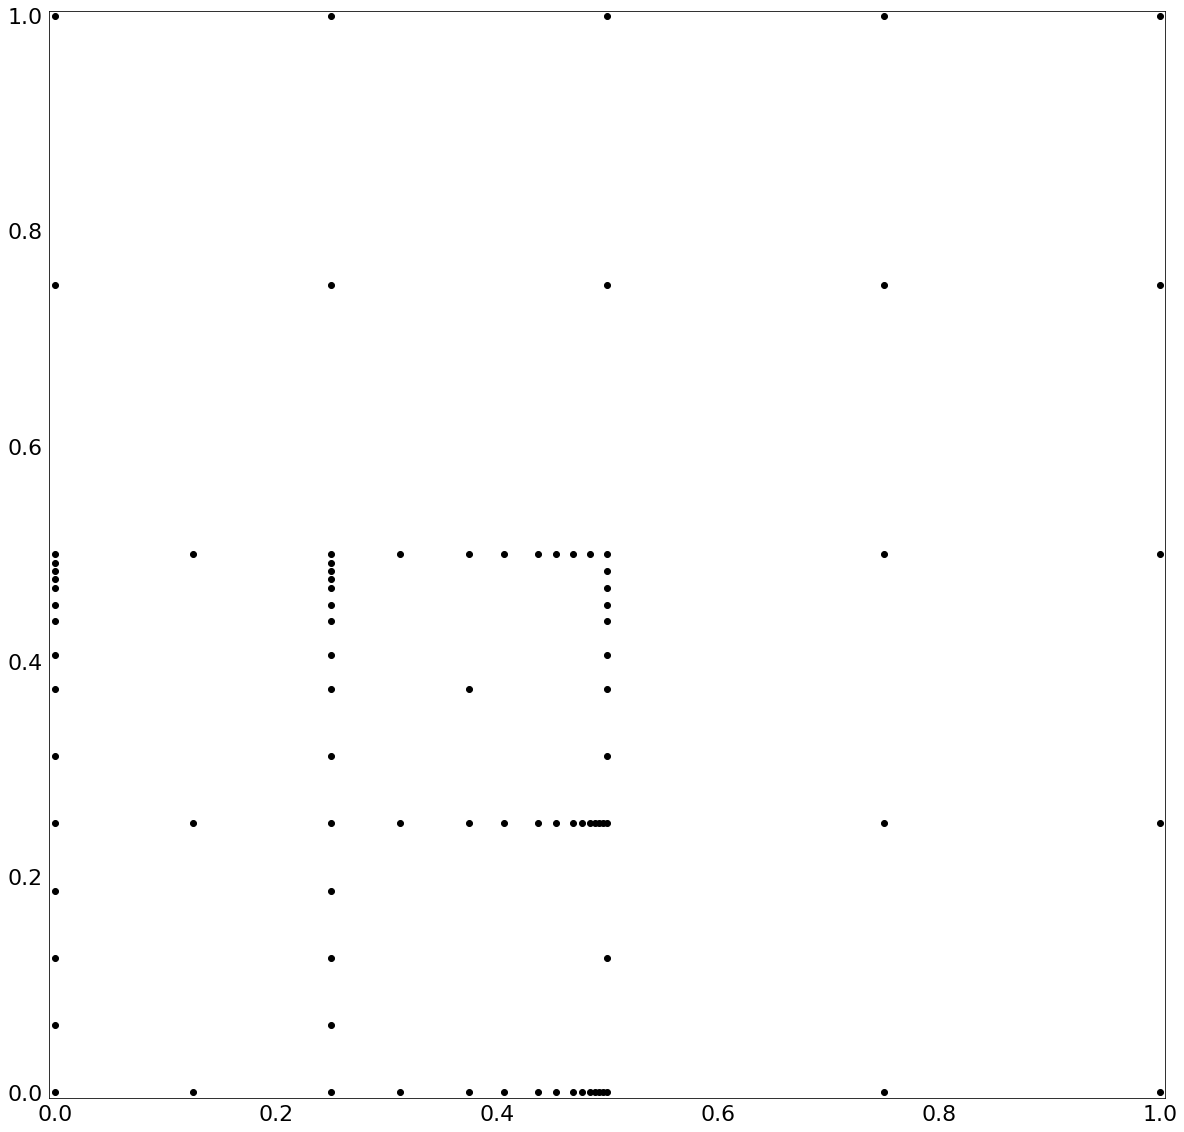

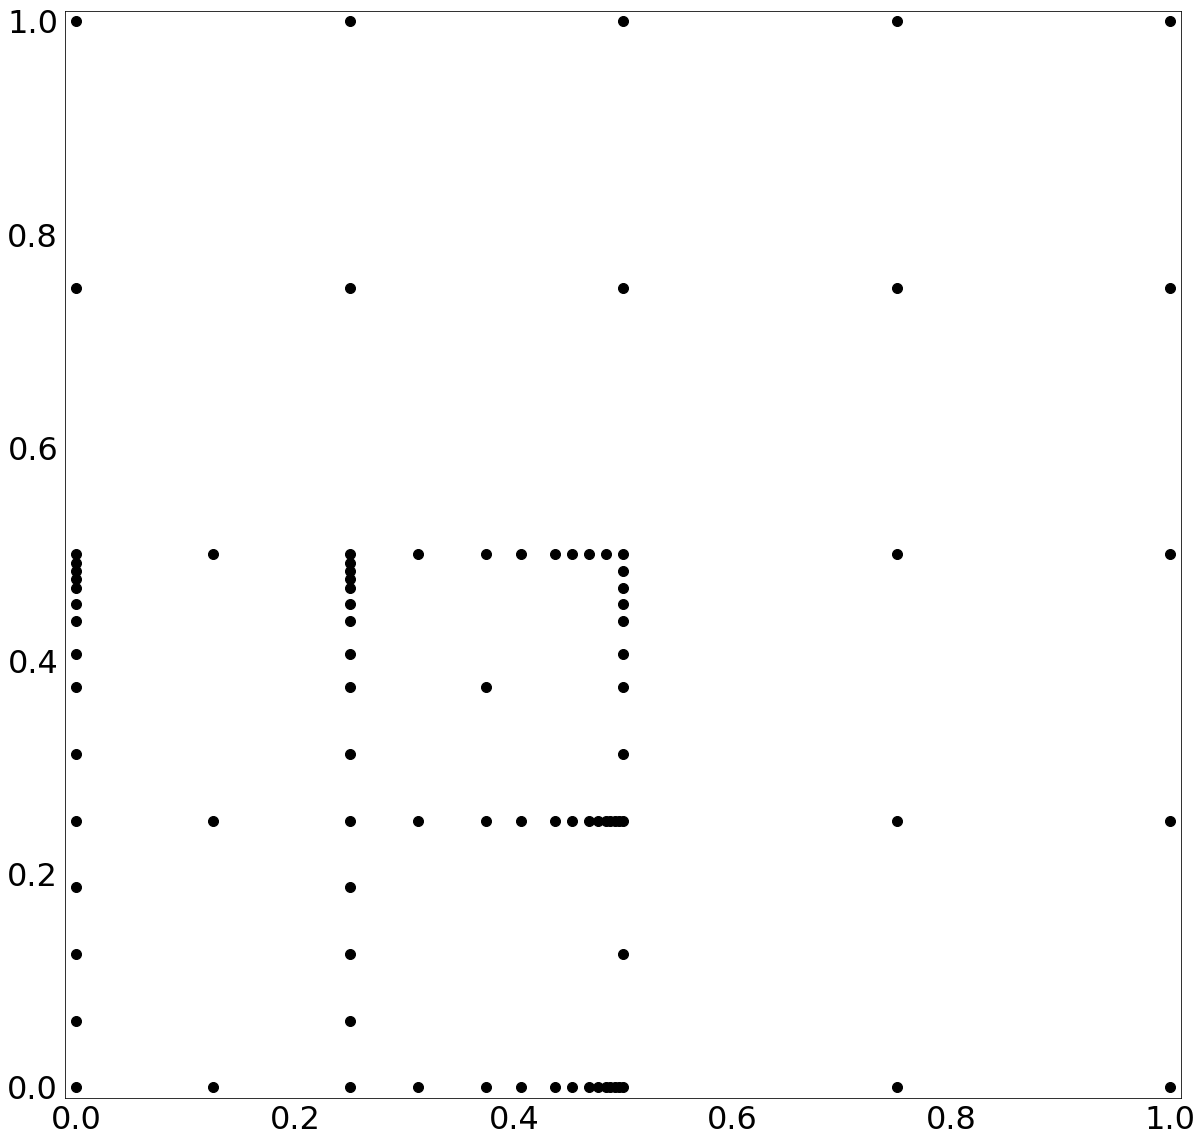

max error: 0.000159722157488
combiintegral: 0.122318037286
Current error: 0.0164200053019
Finished refinement


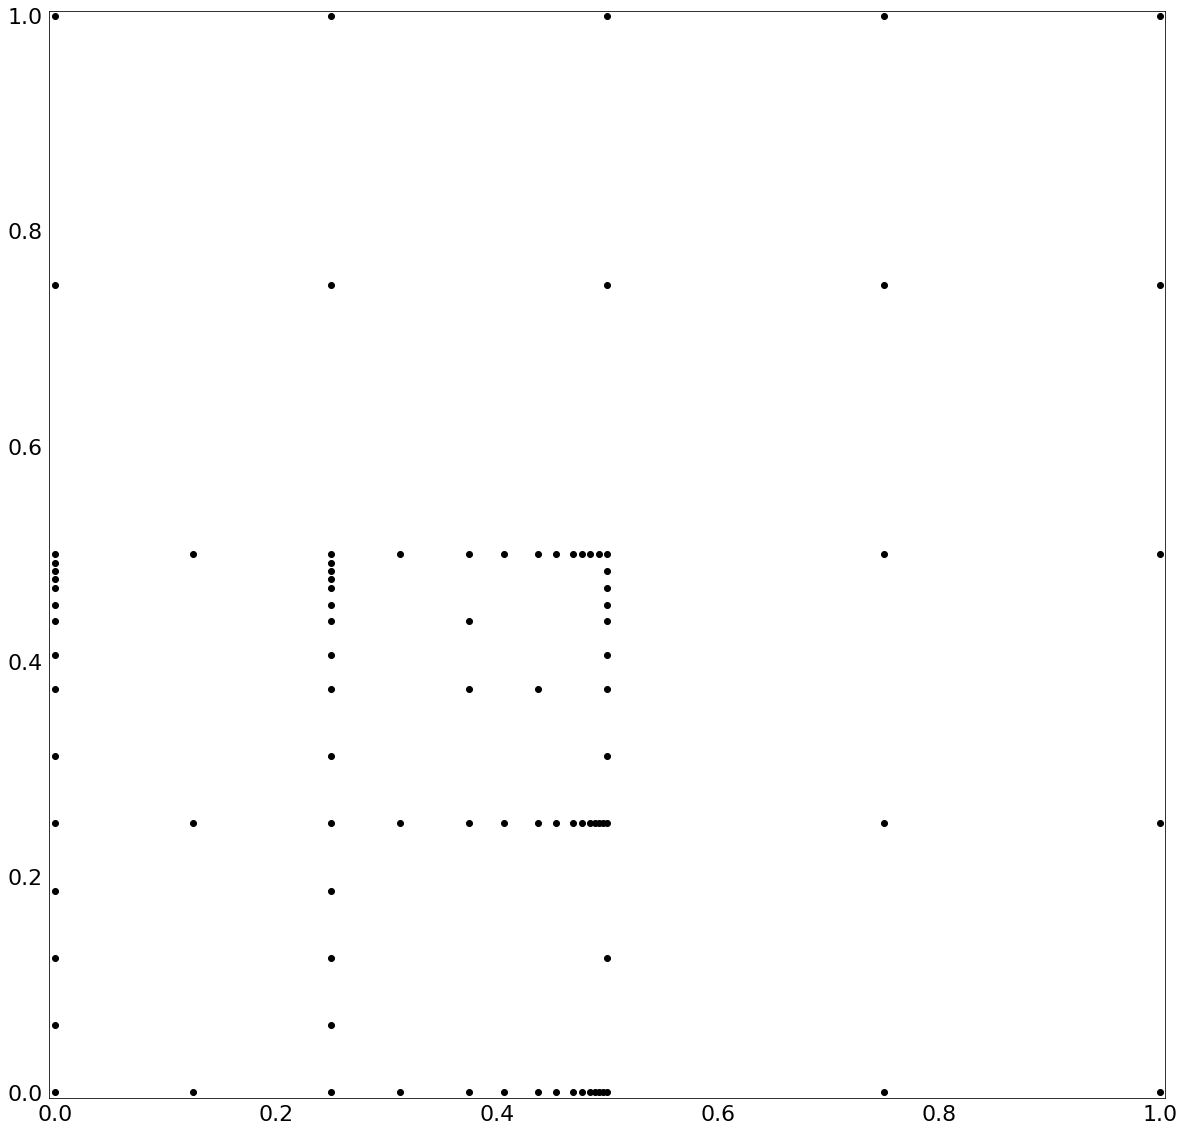

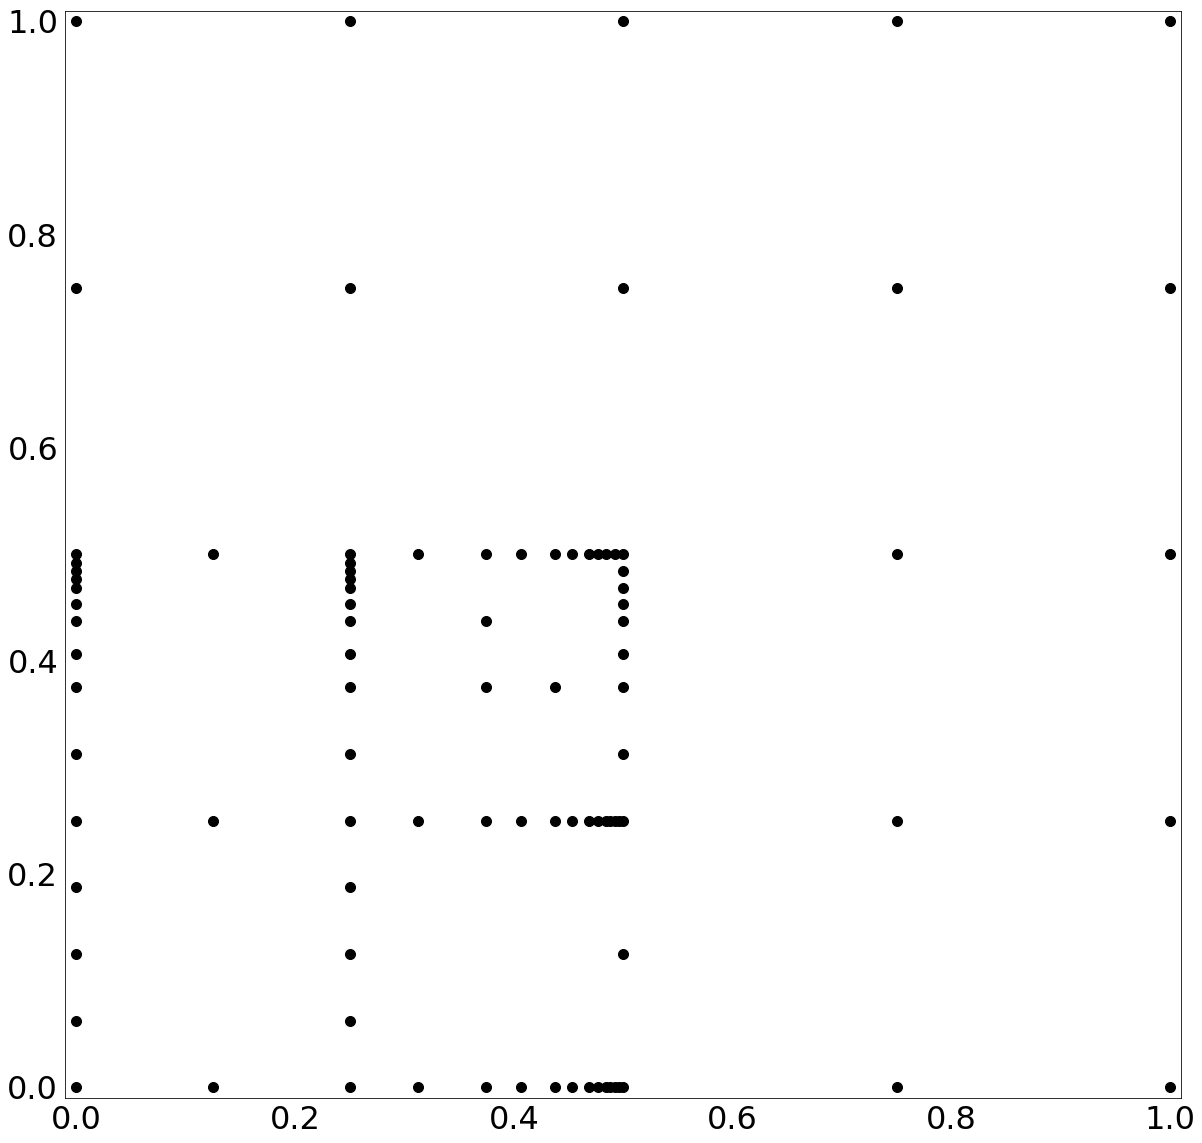

max error: 0.000139753956076
combiintegral: 0.122289192897
Current error: 0.0166519479047
Finished refinement


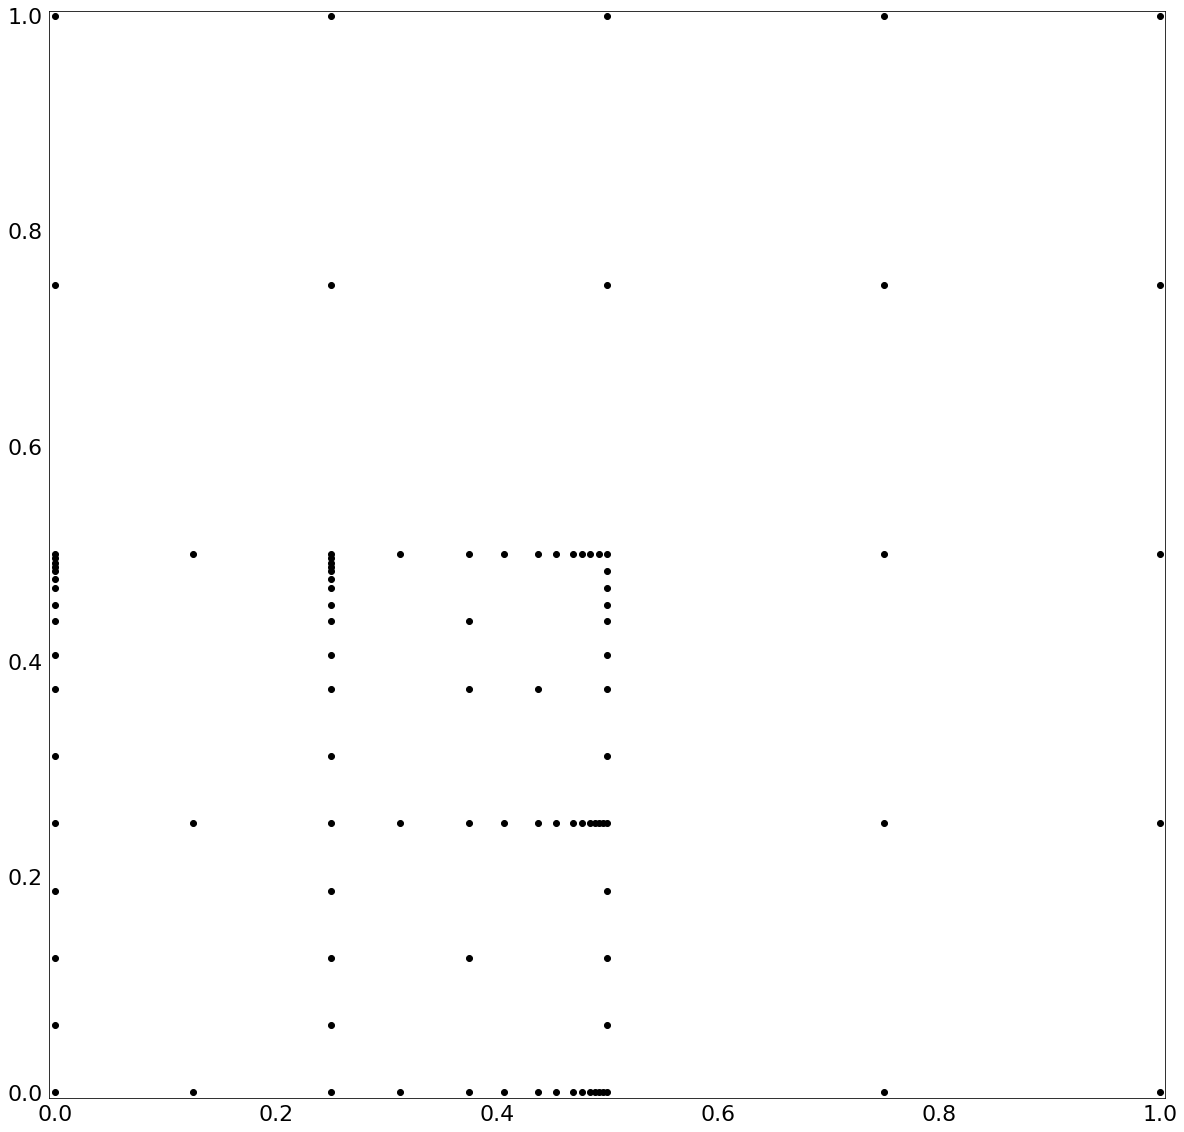

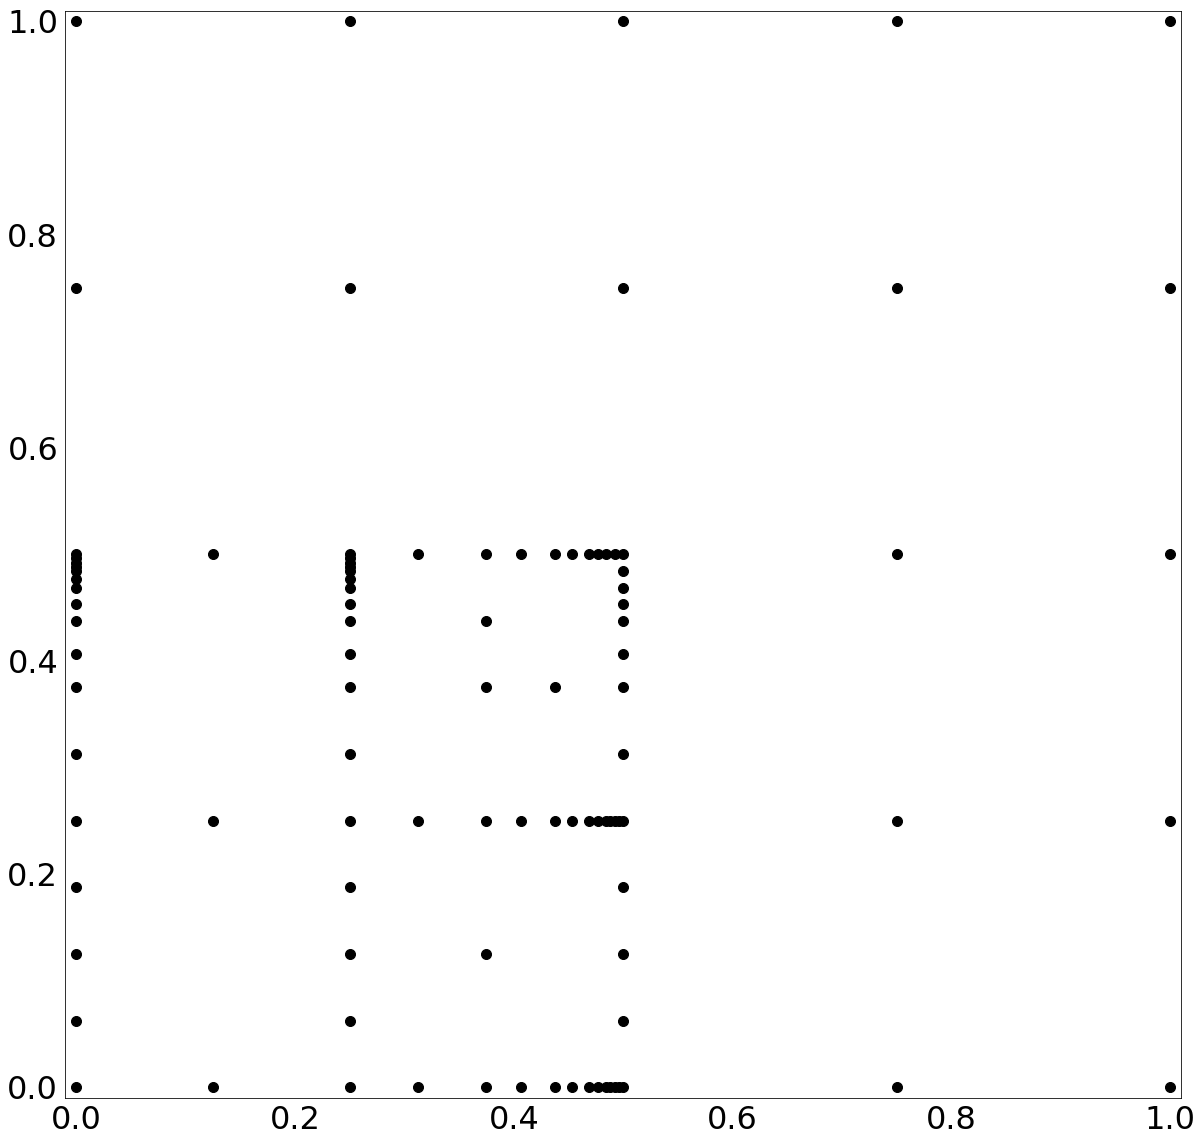

max error: 0.000118944723432
combiintegral: 0.122429017331
Current error: 0.0155275960184
Finished refinement


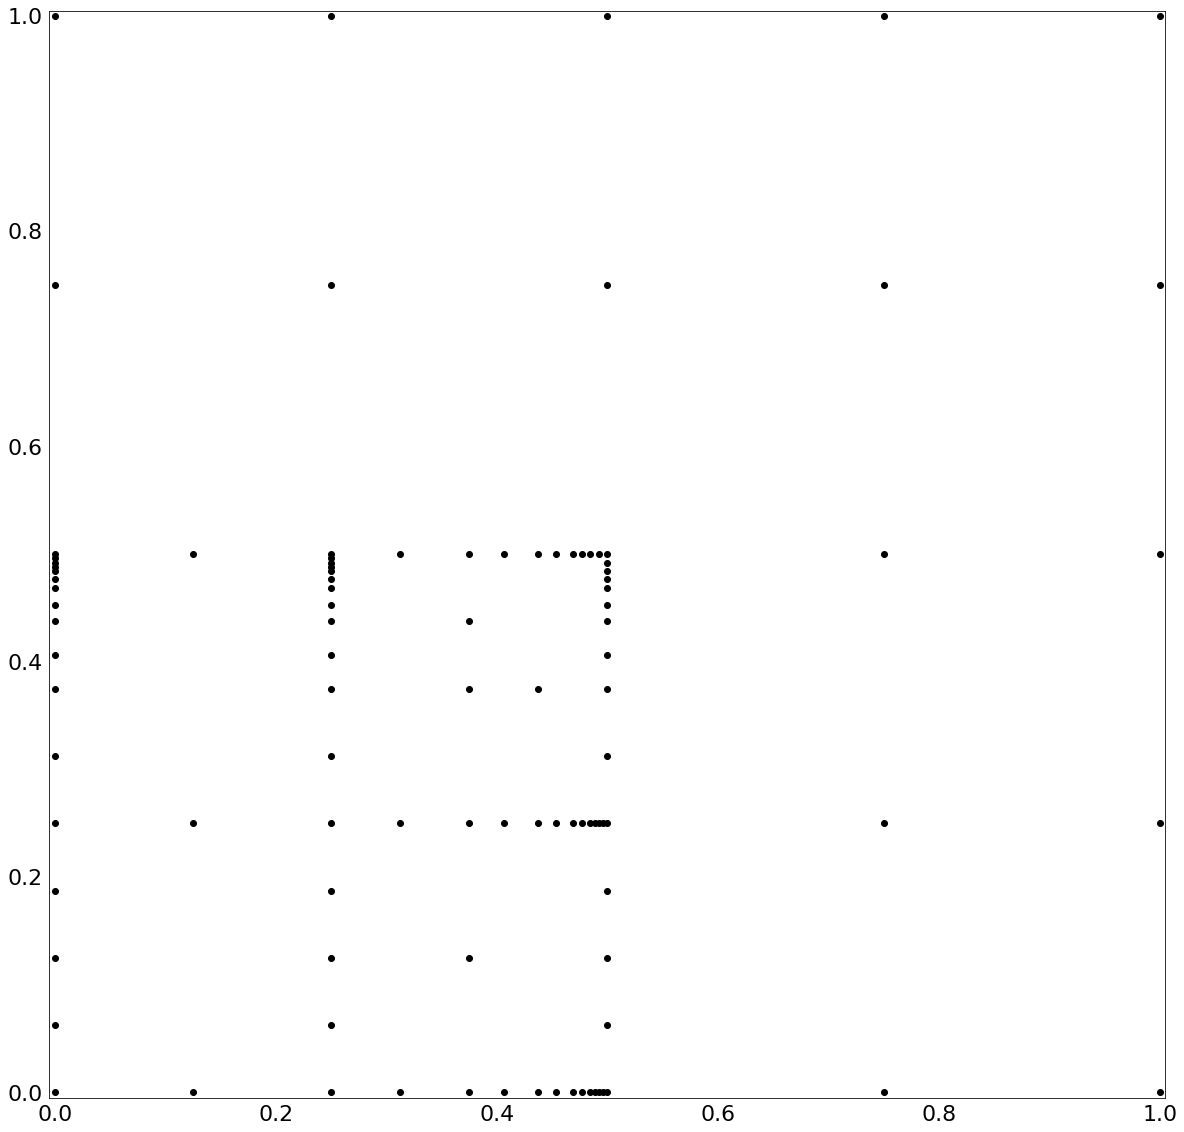

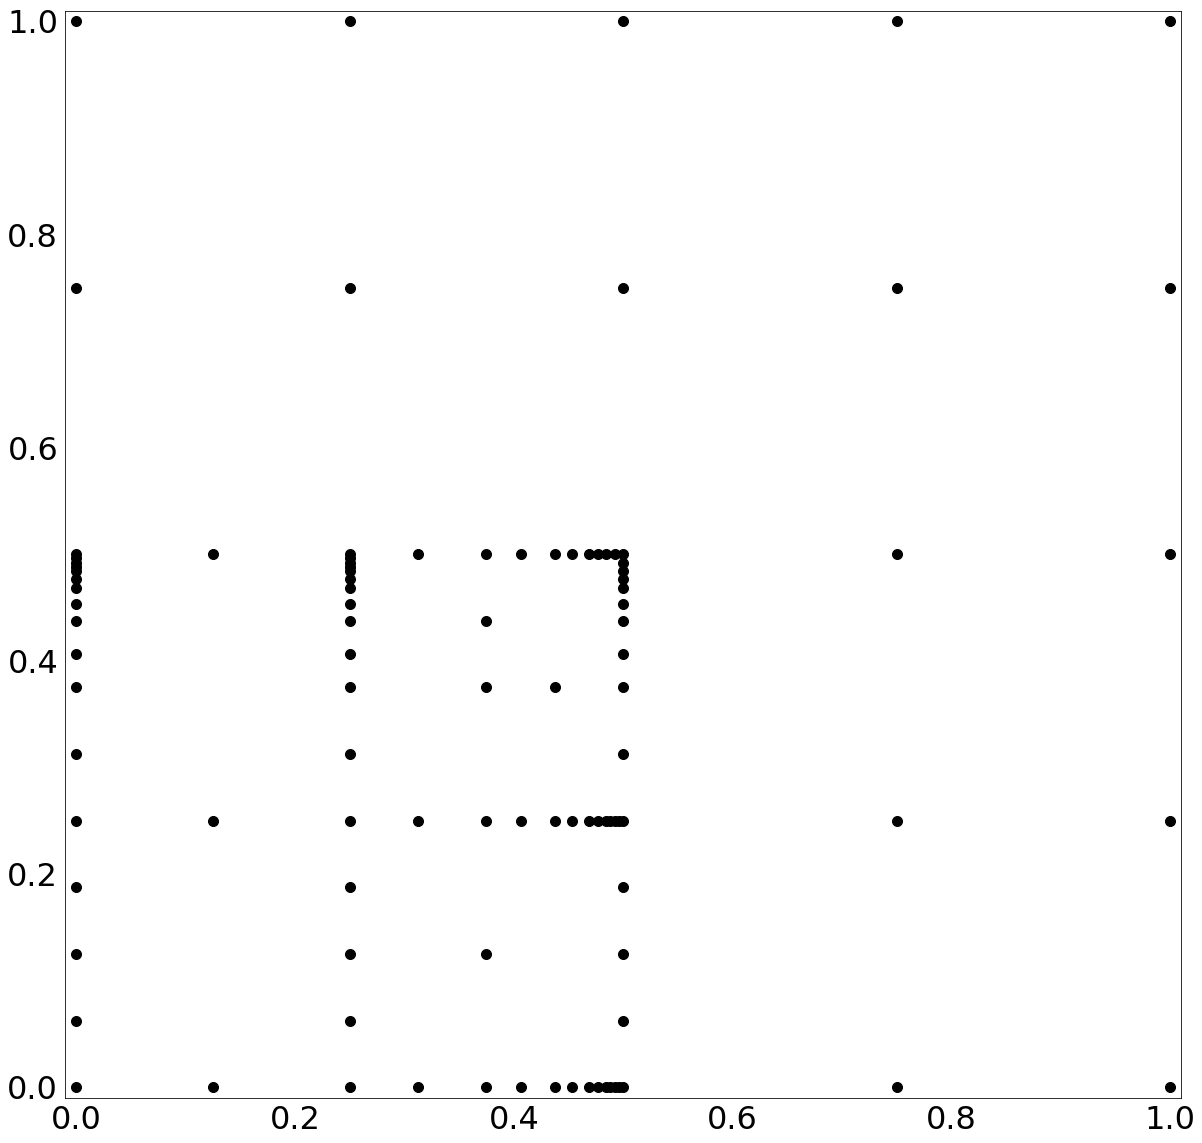

max error: 0.000105121464443
combiintegral: 0.122547962966
Current error: 0.0145711340842
Finished refinement


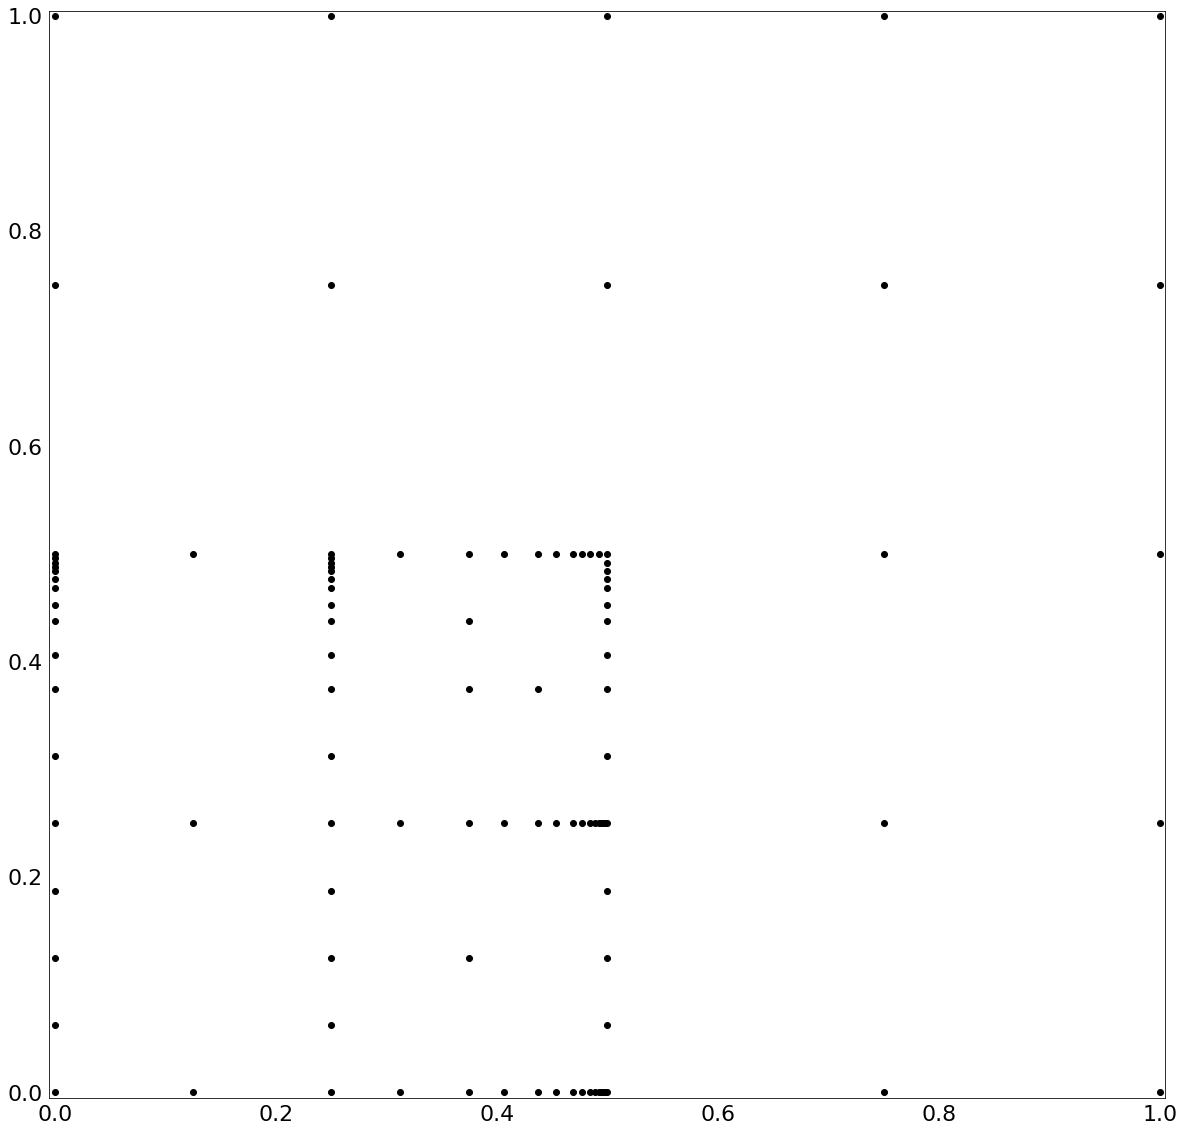

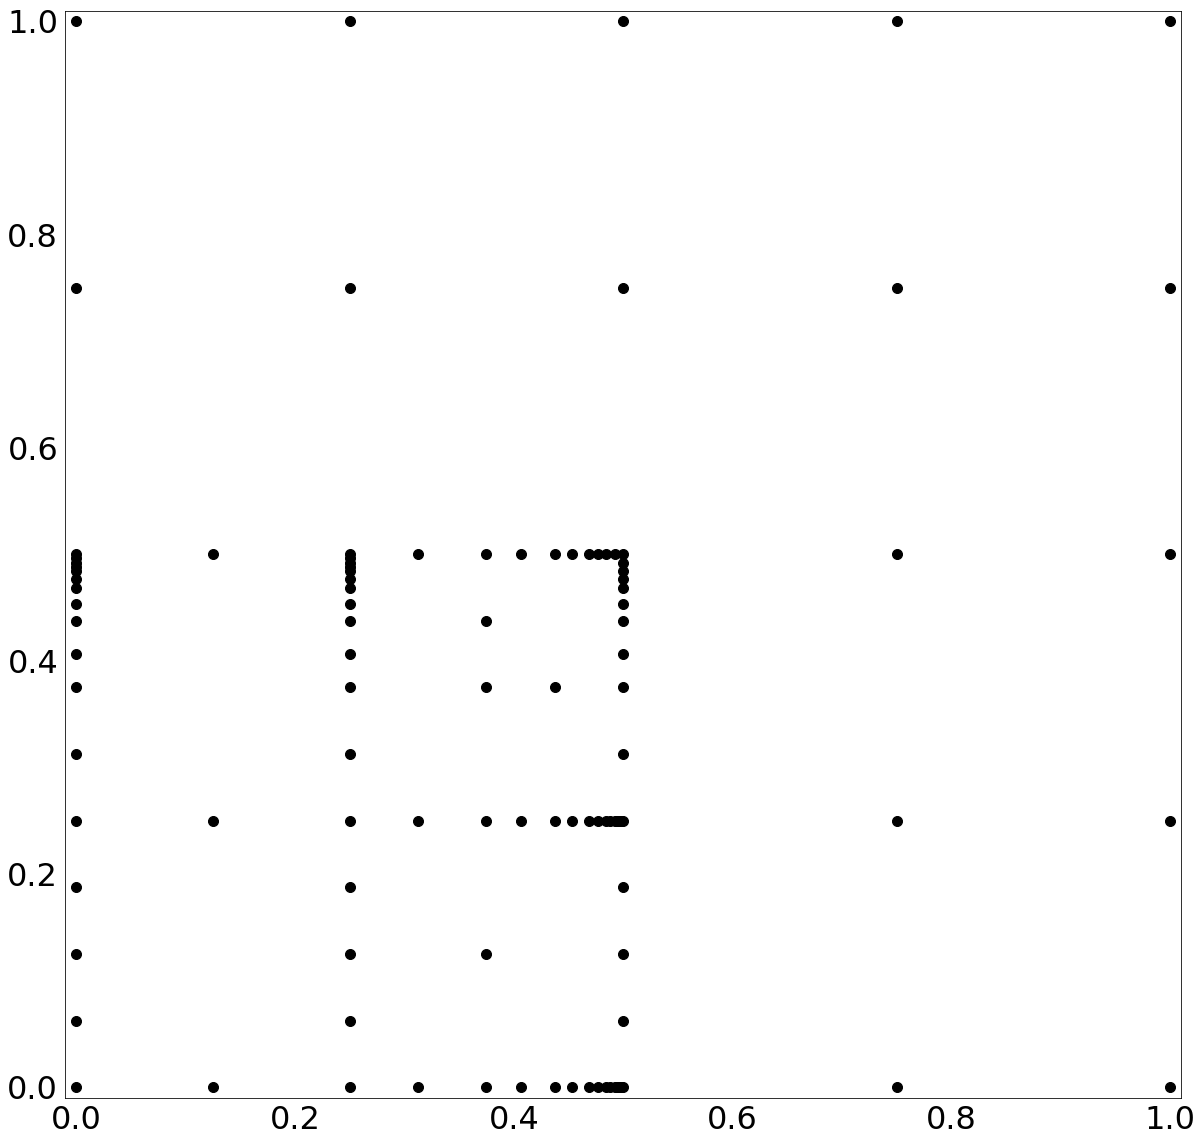

max error: 8.98087918388e-05
combiintegral: 0.123174377923
Current error: 0.00953402562153
Number of refinements 58


(<RefinementContainer.RefinementContainer at 0x7faf17b9eda0>,
 [(array([2, 2]), 1.0)],
 [2, 2],
 0.12317437792337008,
 1312,
 [0.28884290720342765,
  0.2957040623962055,
  0.23796914551203702,
  0.20070207067608858,
  0.16145426771529511,
  0.13111882457787827,
  0.11139639195475459,
  0.096124719304326395,
  0.084671855813937866,
  0.074485674541381344,
  0.051873756101385525,
  0.046108078595276575,
  0.040980082763874499,
  0.036520333236512249,
  0.032694930593926398,
  0.031179785368690455,
  0.028611737082897225,
  0.026366580004549736,
  0.024453700321154914,
  0.016420005301911456,
  0.016651947904742254,
  0.015527596018361907,
  0.014571134084202658,
  0.0095340256215264724],
 [25,
  29,
  32,
  35,
  37,
  41,
  45,
  49,
  51,
  55,
  62,
  64,
  68,
  70,
  74,
  80,
  84,
  86,
  90,
  94,
  101,
  103,
  107,
  110])

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSplit import *
from spatiallyAdaptiveSingleDimension import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
import math
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorAnalytic()

grid=TrapezoidalGrid(a, b)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions(a, b,grid)
adaptiveCombiInstanceFixed = SpatiallyAdaptiveFixedScheme(a, b,grid)
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,2,grid,False,version=0)
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b,grid)

#the cell method does not have component grids and therefore the sparse grid is printed twice per iteration!
adaptiveCombiInstanceCell.performSpatiallyAdaptiv(2,2,f,errorOperator,10**-2, do_plot=True)

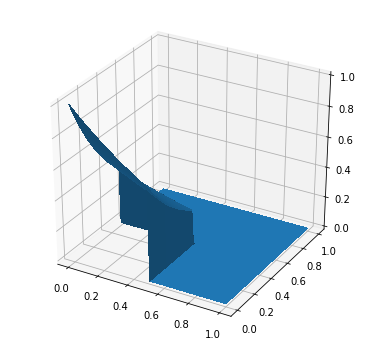

0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
max error: 0.0377768144582
combiintegral: 0.086583215174
Current error: 0.303769744748
Finished refinement


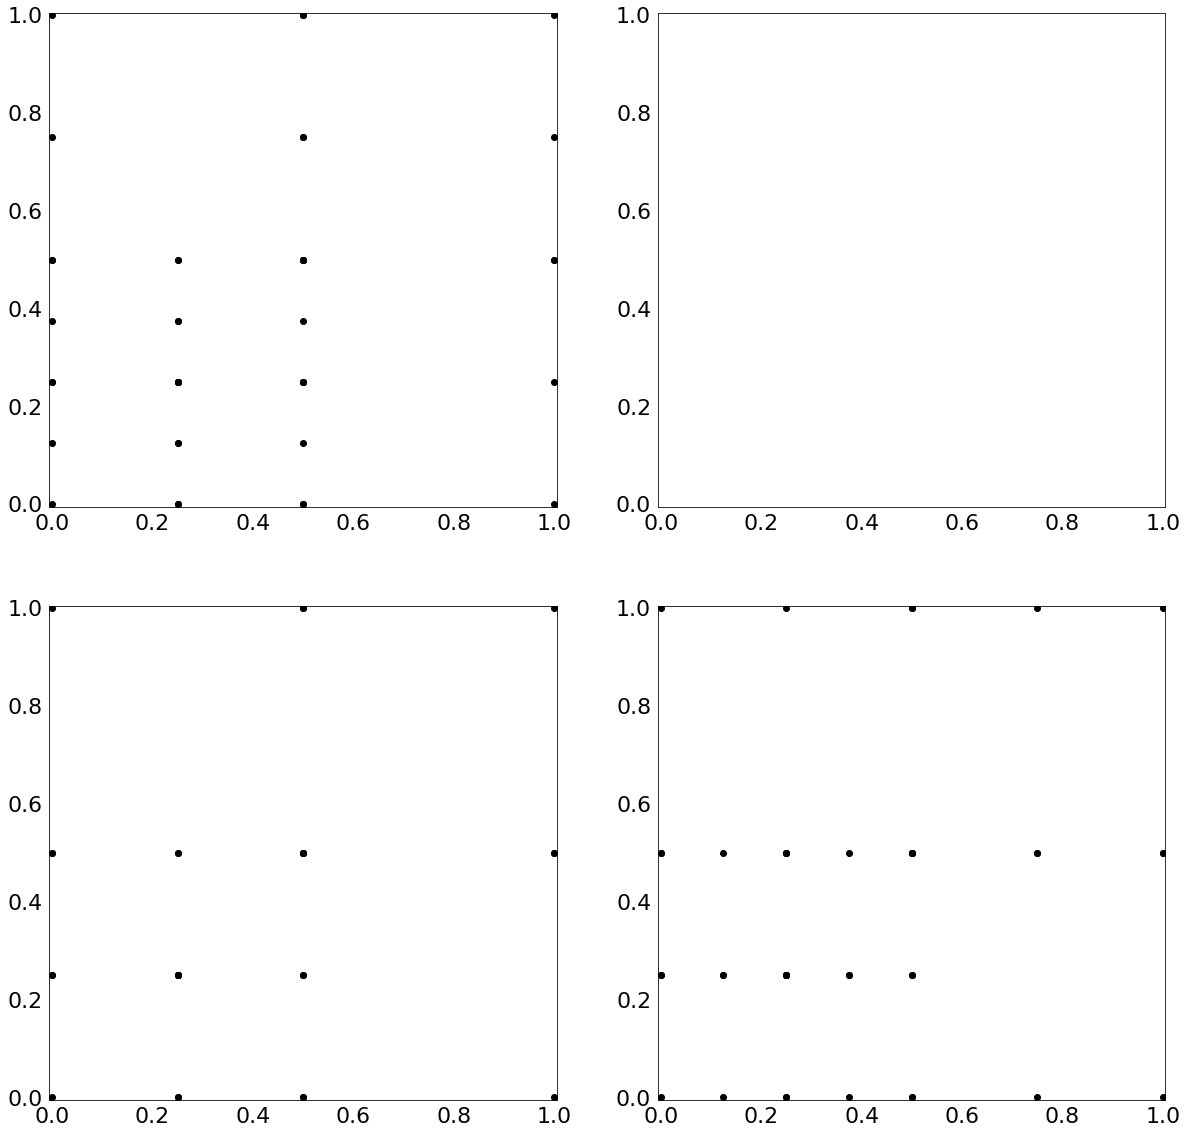

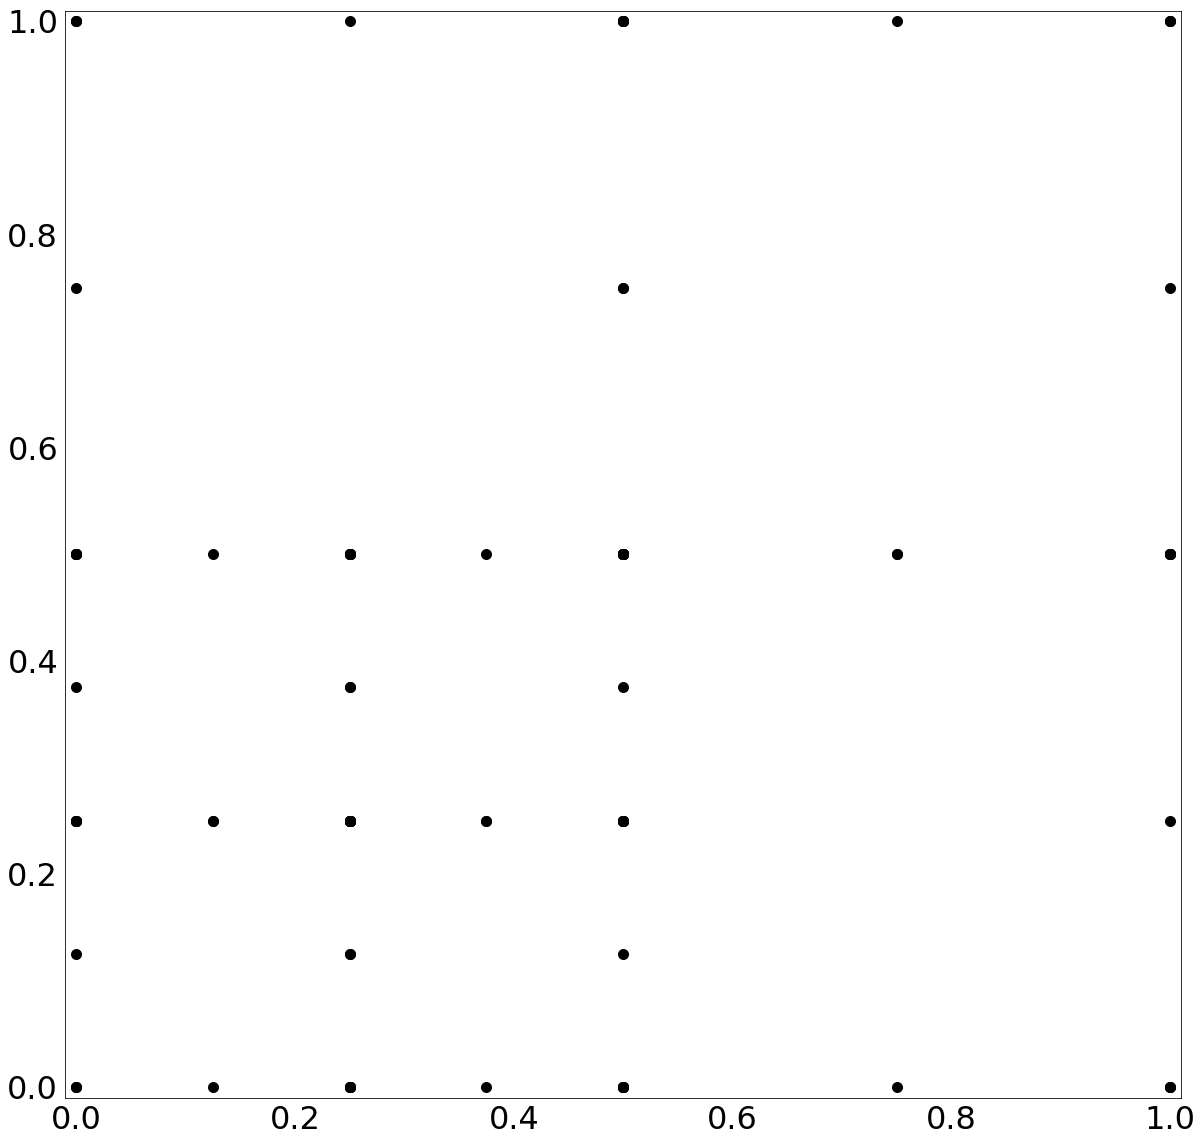

max error: 0.00829465210313
combiintegral: 0.104281572115
Current error: 0.161454267715
Finished refinement


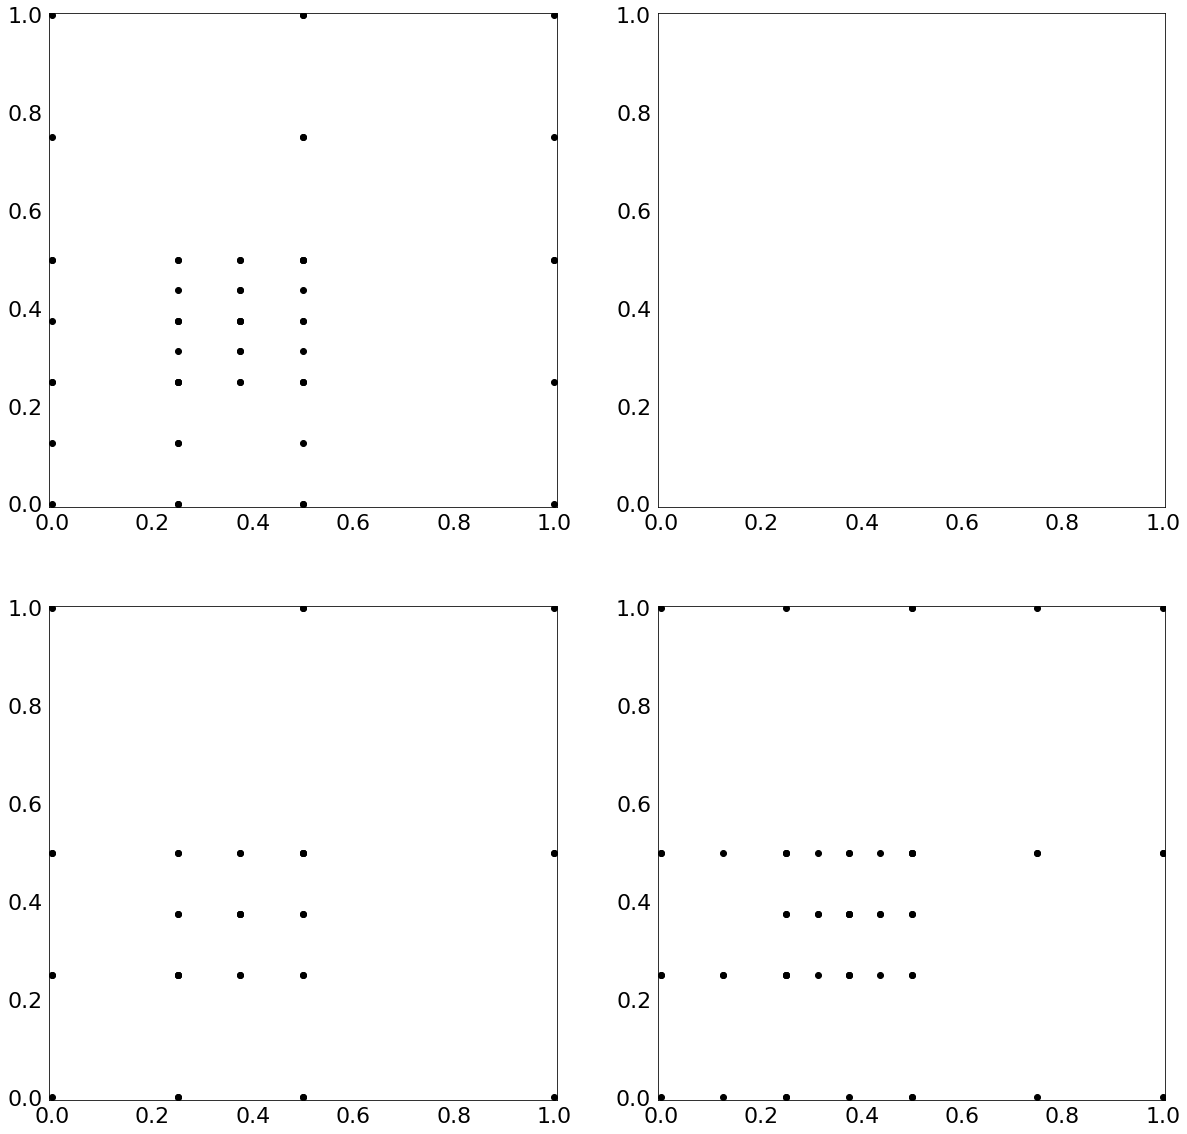

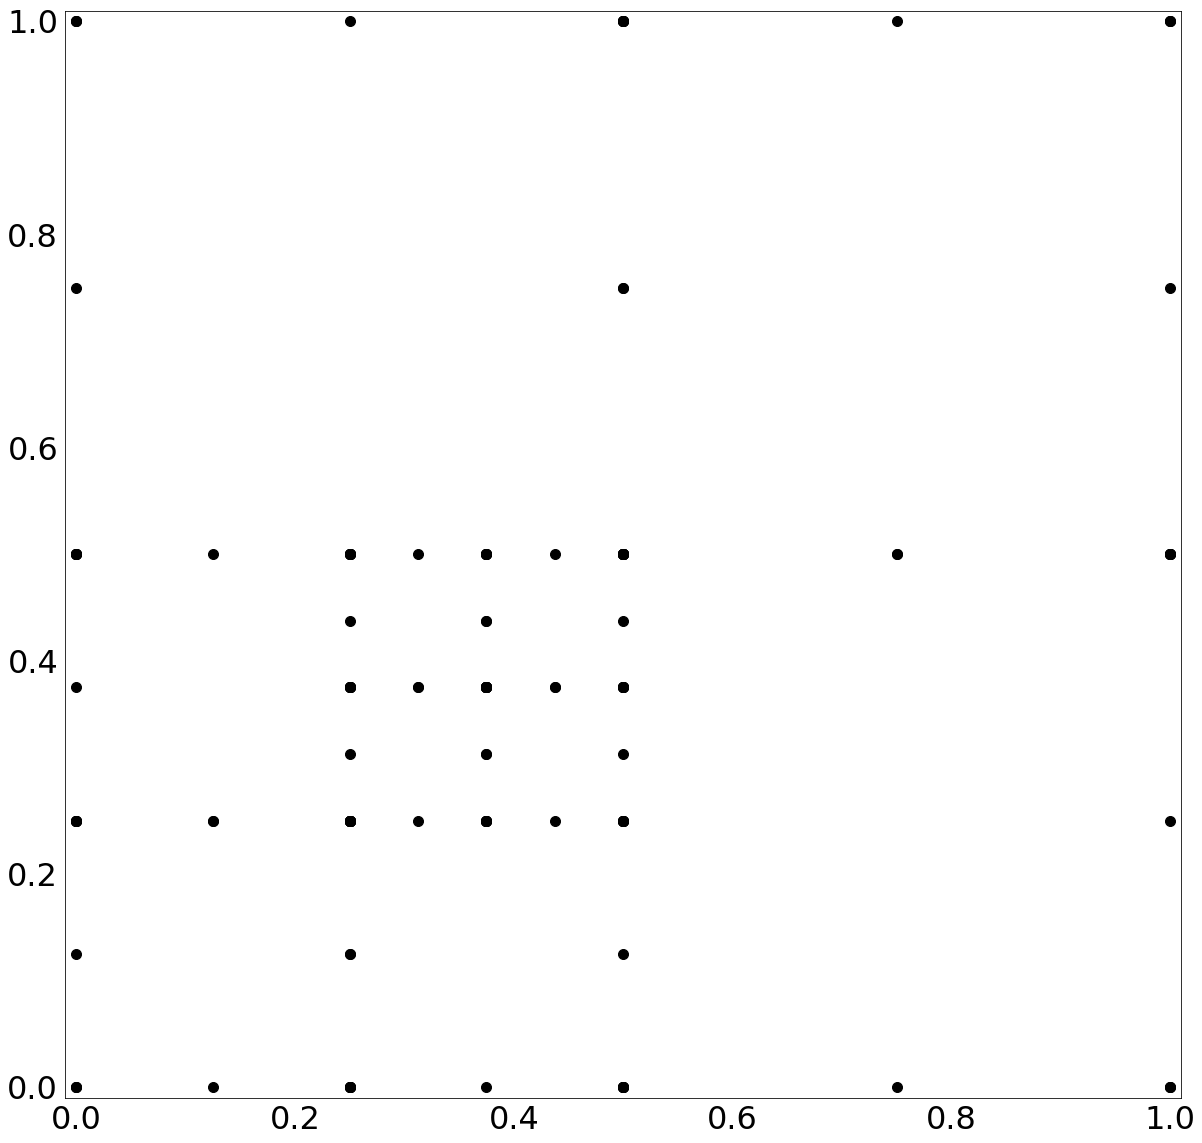

max error: 0.007162100298
combiintegral: 0.108374607658
Current error: 0.128541477688
Finished refinement


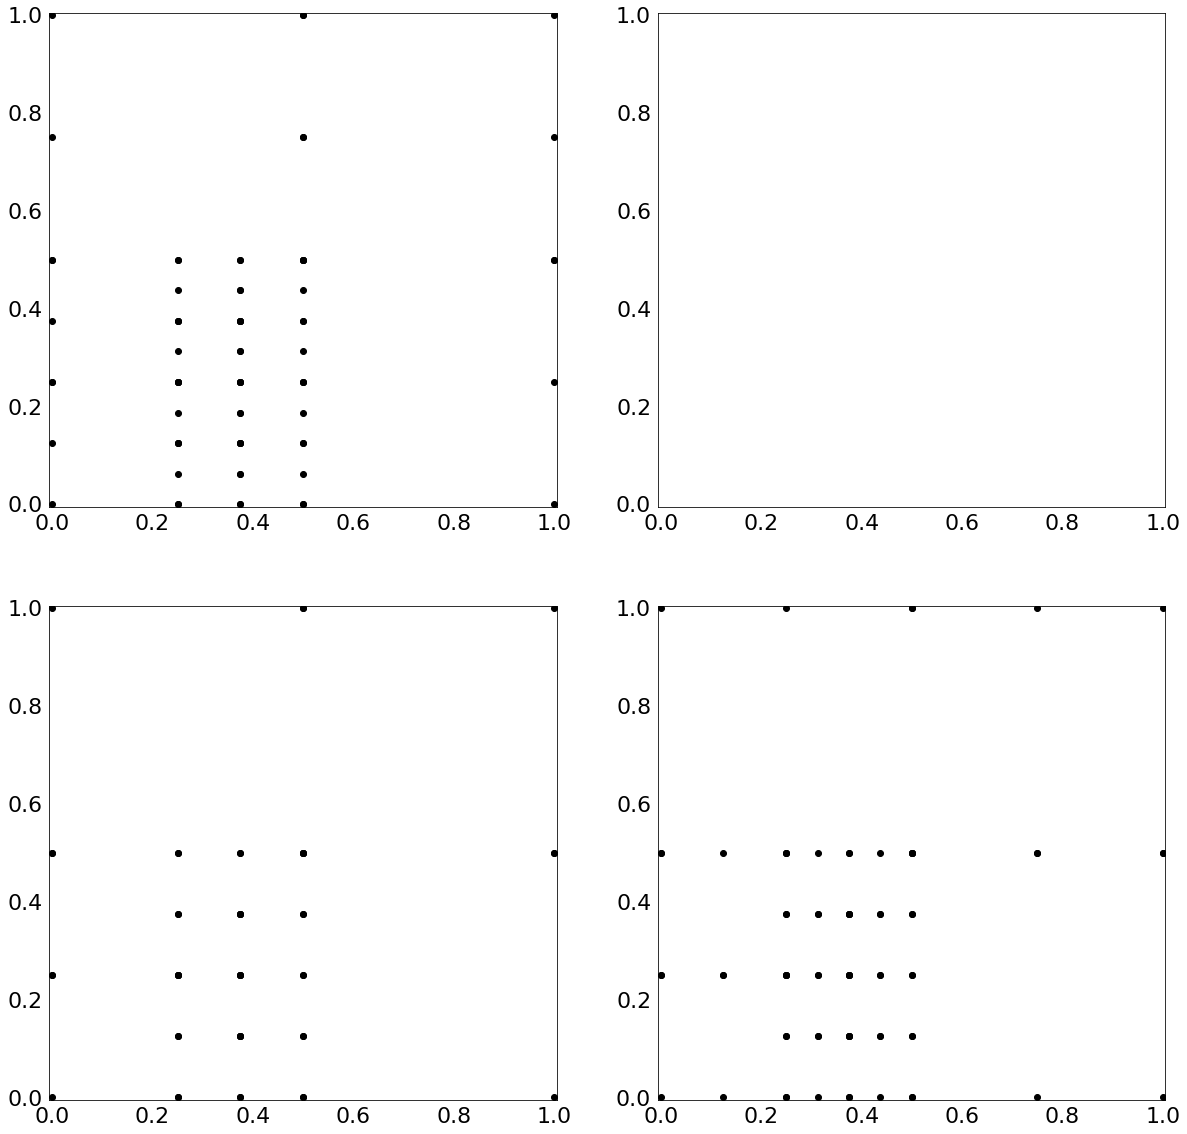

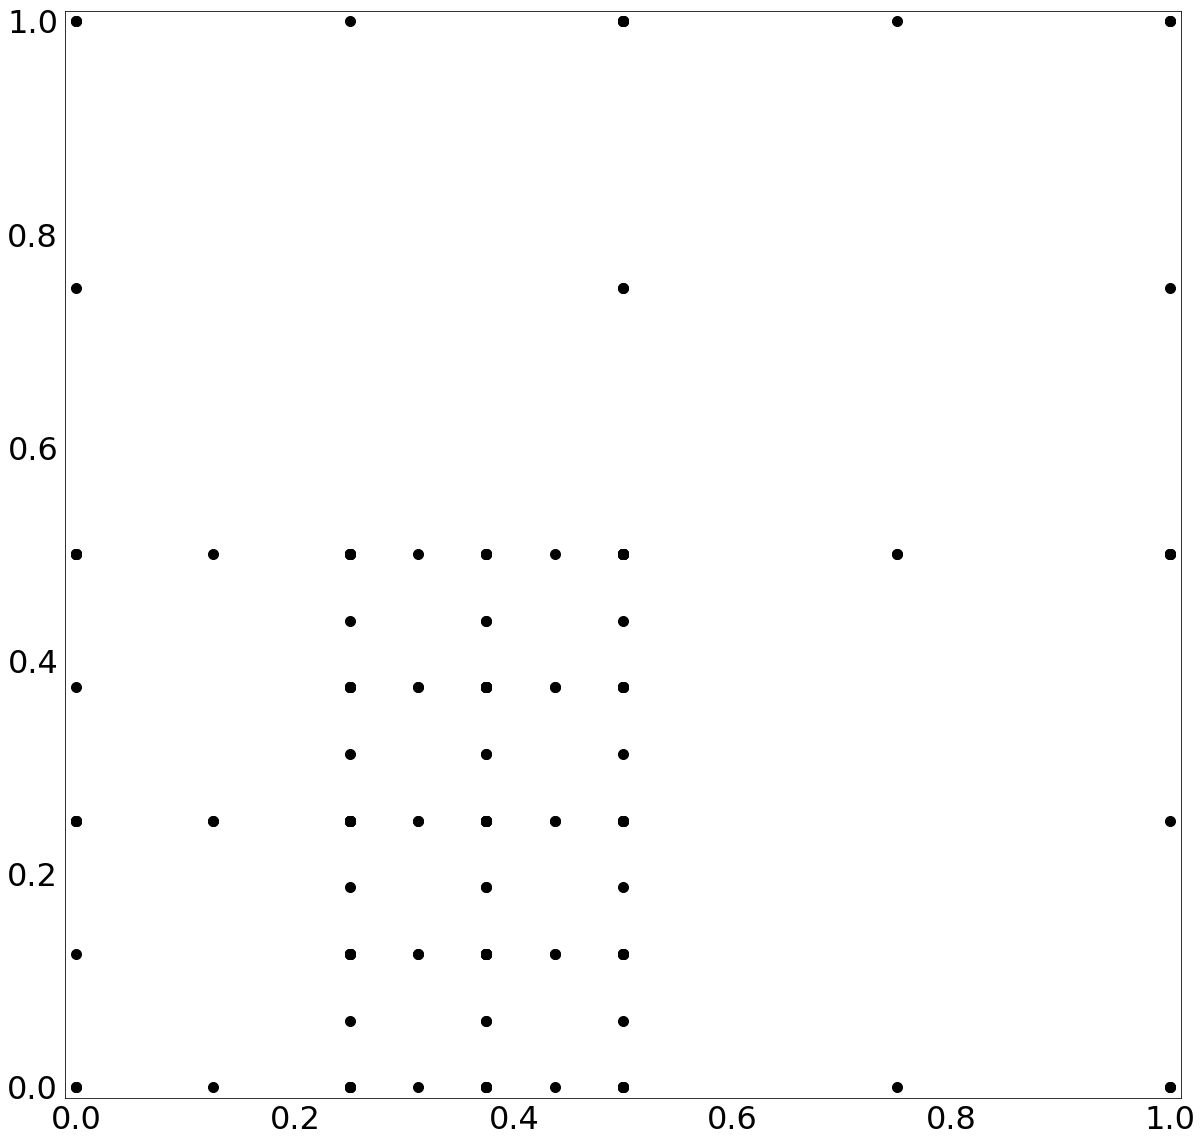

max error: 0.00490242785469
combiintegral: 0.111872510771
Current error: 0.100414248033
Finished refinement


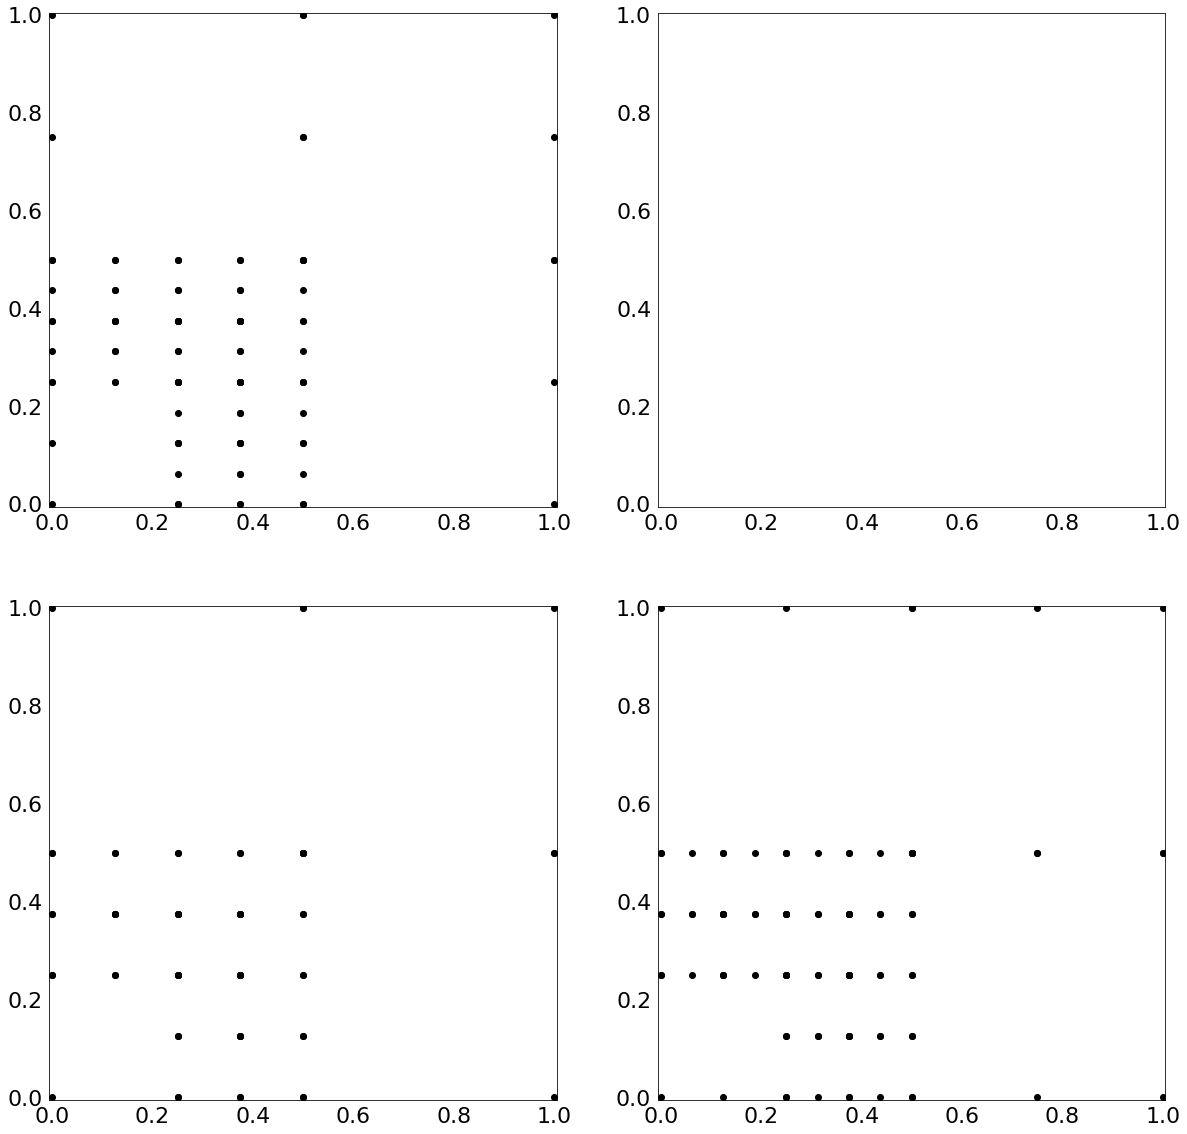

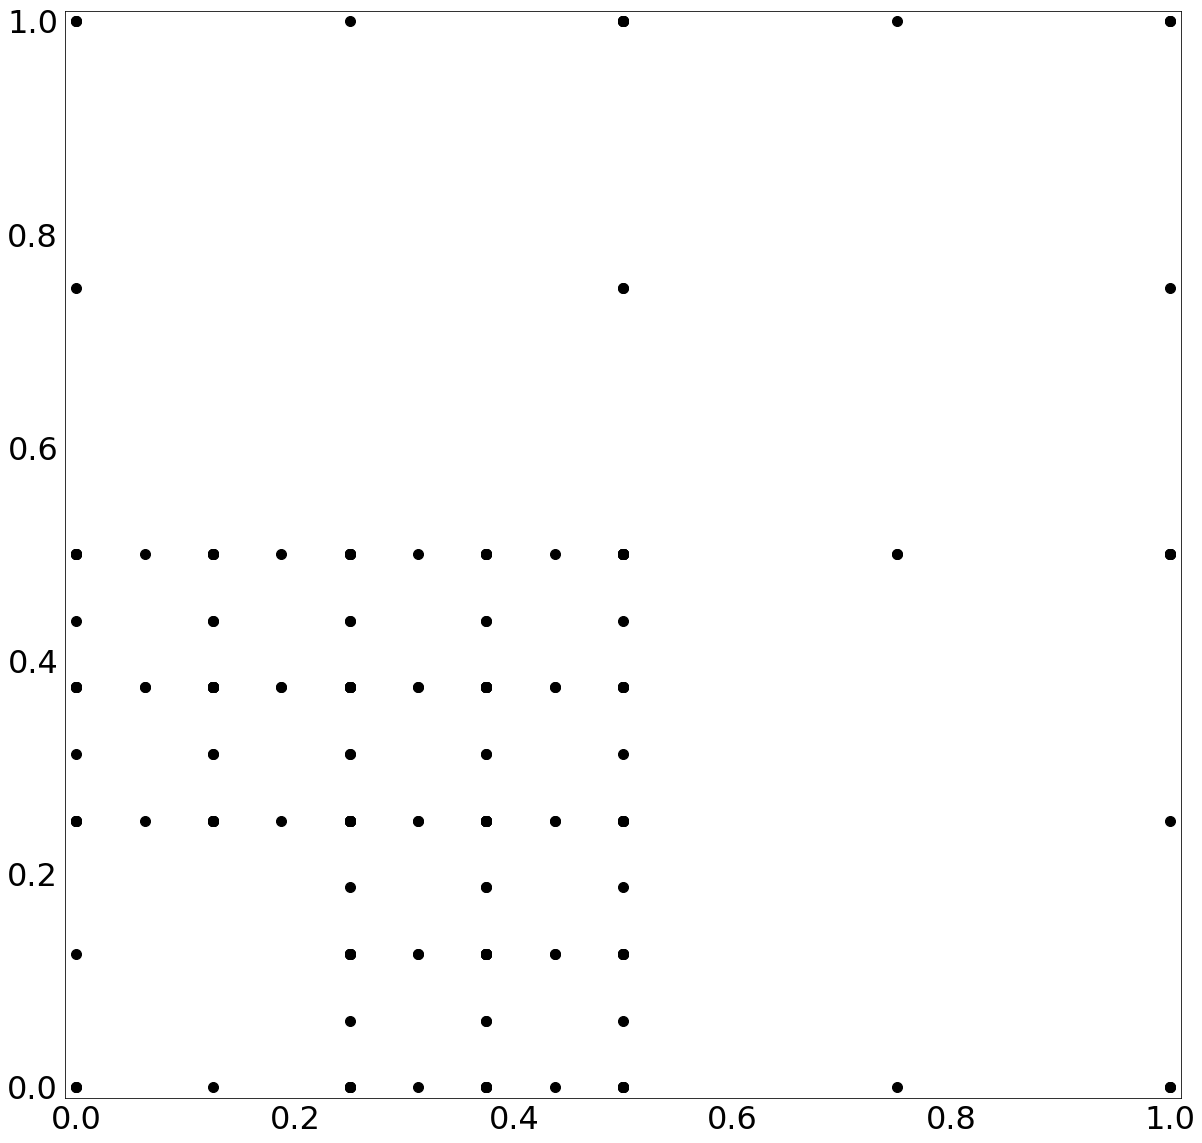

max error: 0.00207636085287
combiintegral: 0.114276497137
Current error: 0.0810833876867
New scheme
0 [1, 3] 1.0
1 [2, 2] 1.0
2 [3, 1] 1.0
3 [1, 2] -1.0
4 [2, 1] -1.0
Finished refinement


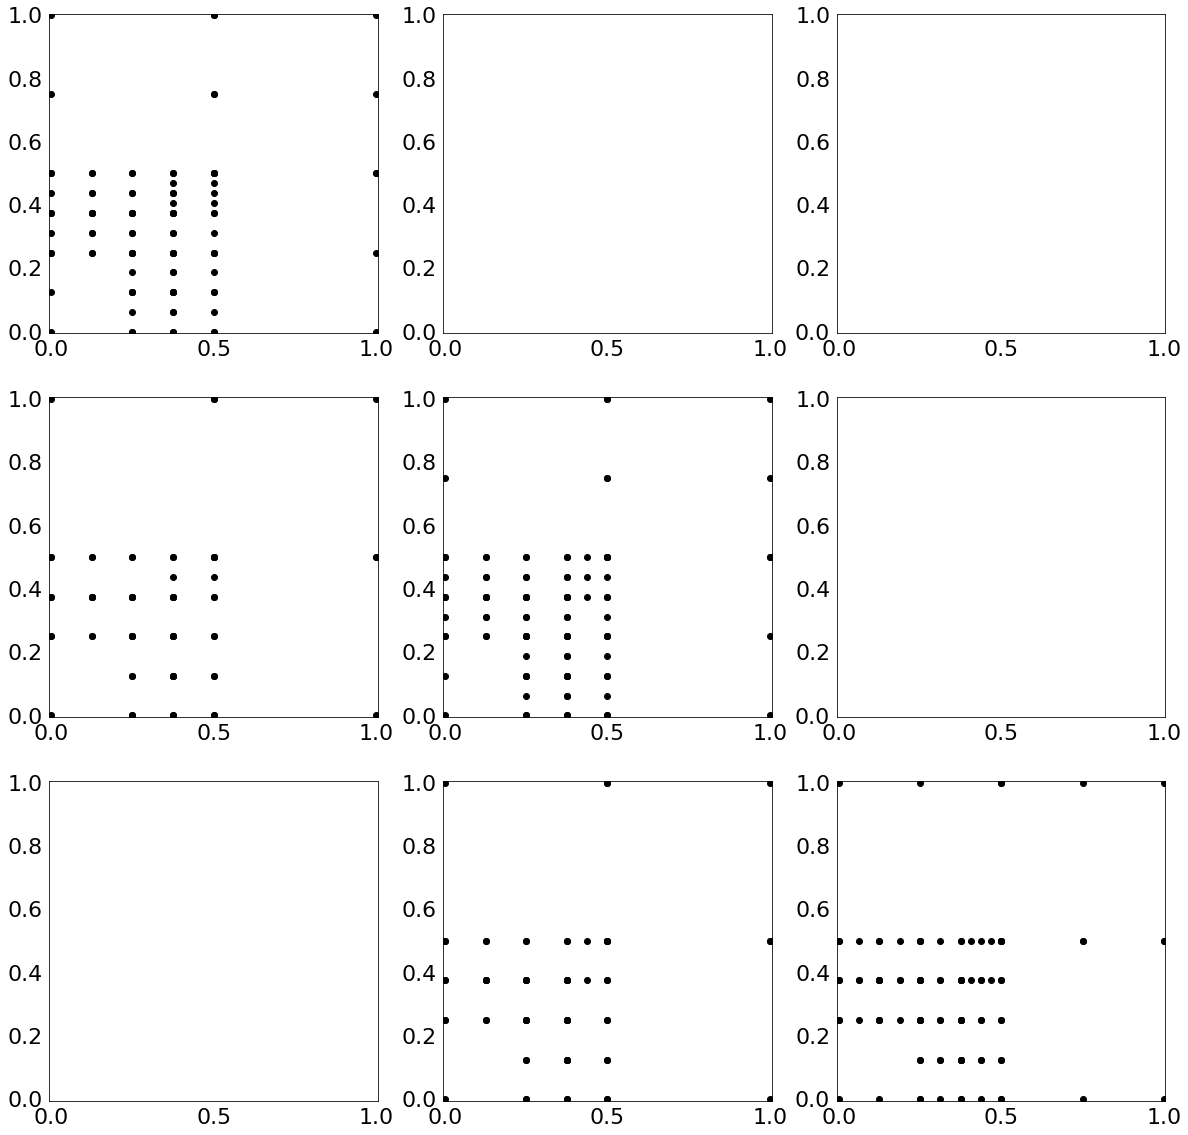

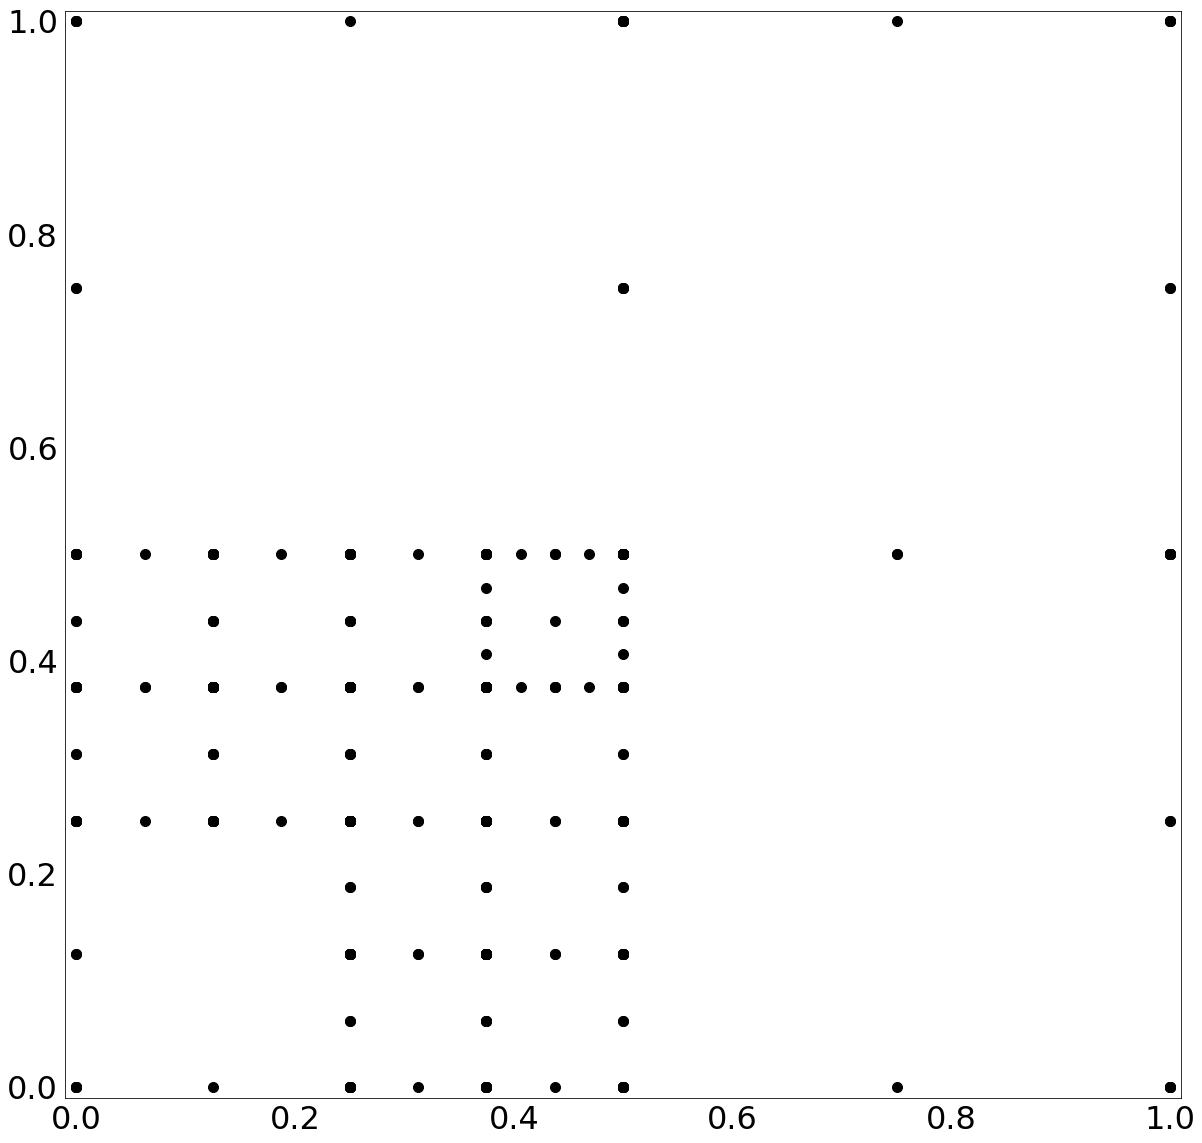

max error: 0.00207636085287
combiintegral: 0.115013574962
Current error: 0.0751564204182
Finished refinement


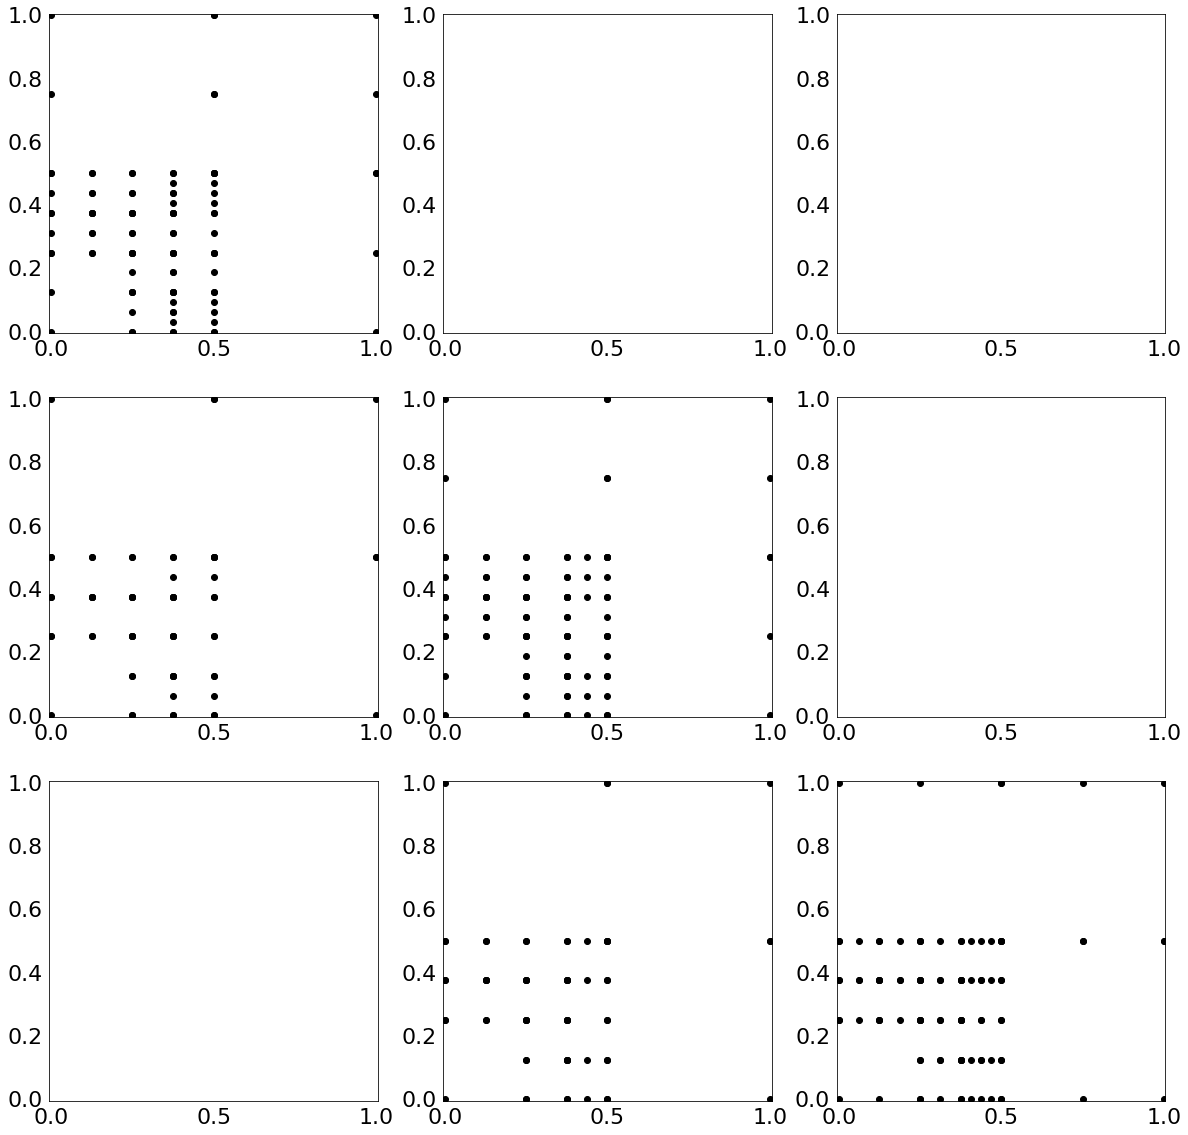

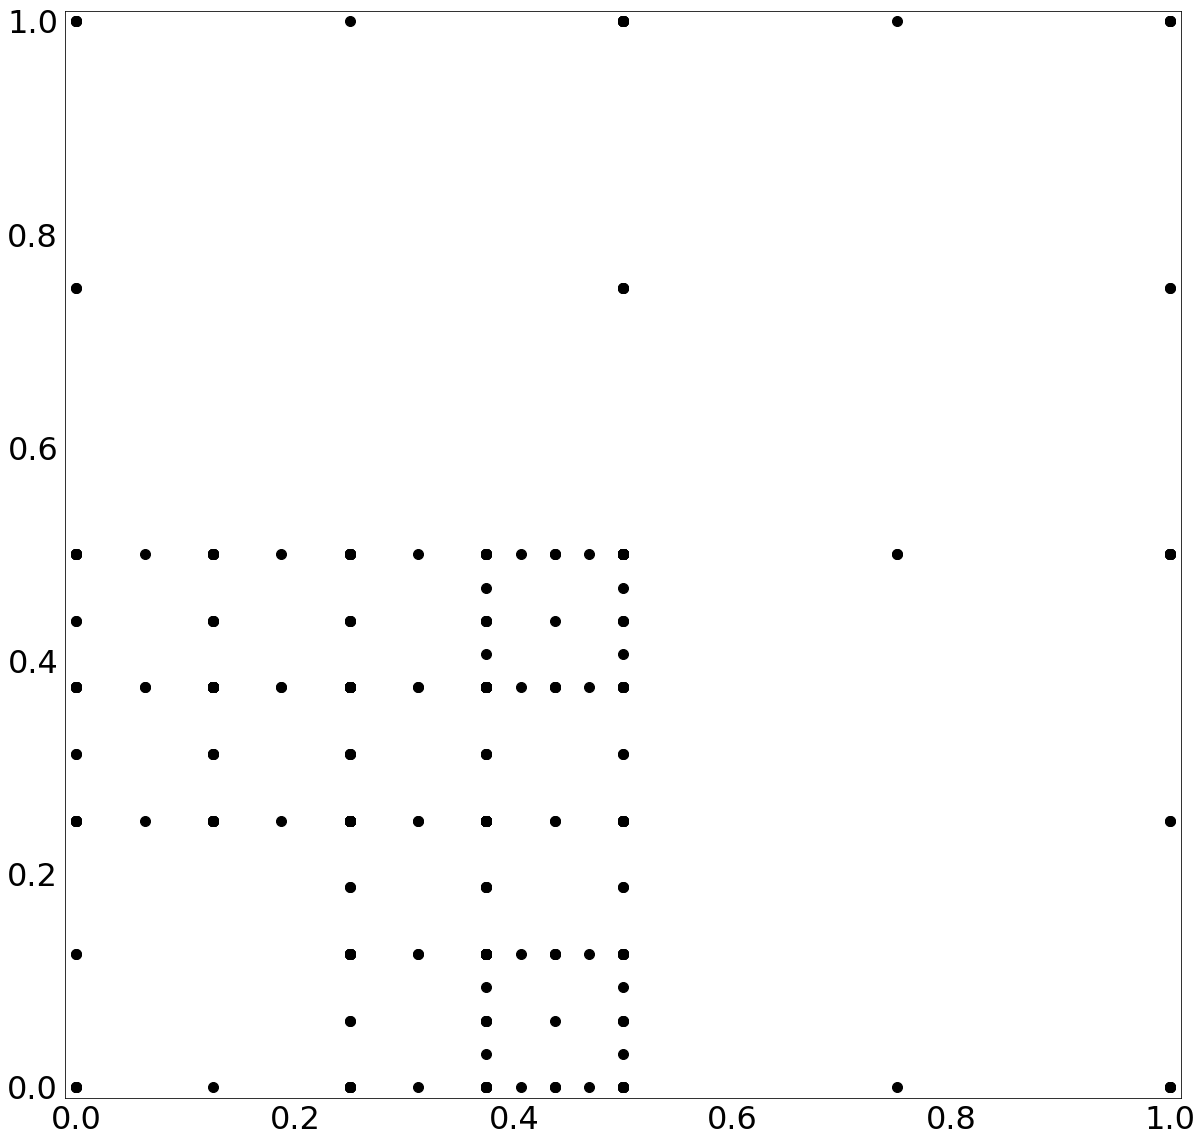

max error: 0.00161707145815
combiintegral: 0.116052211644
Current error: 0.0668045674512
Finished refinement


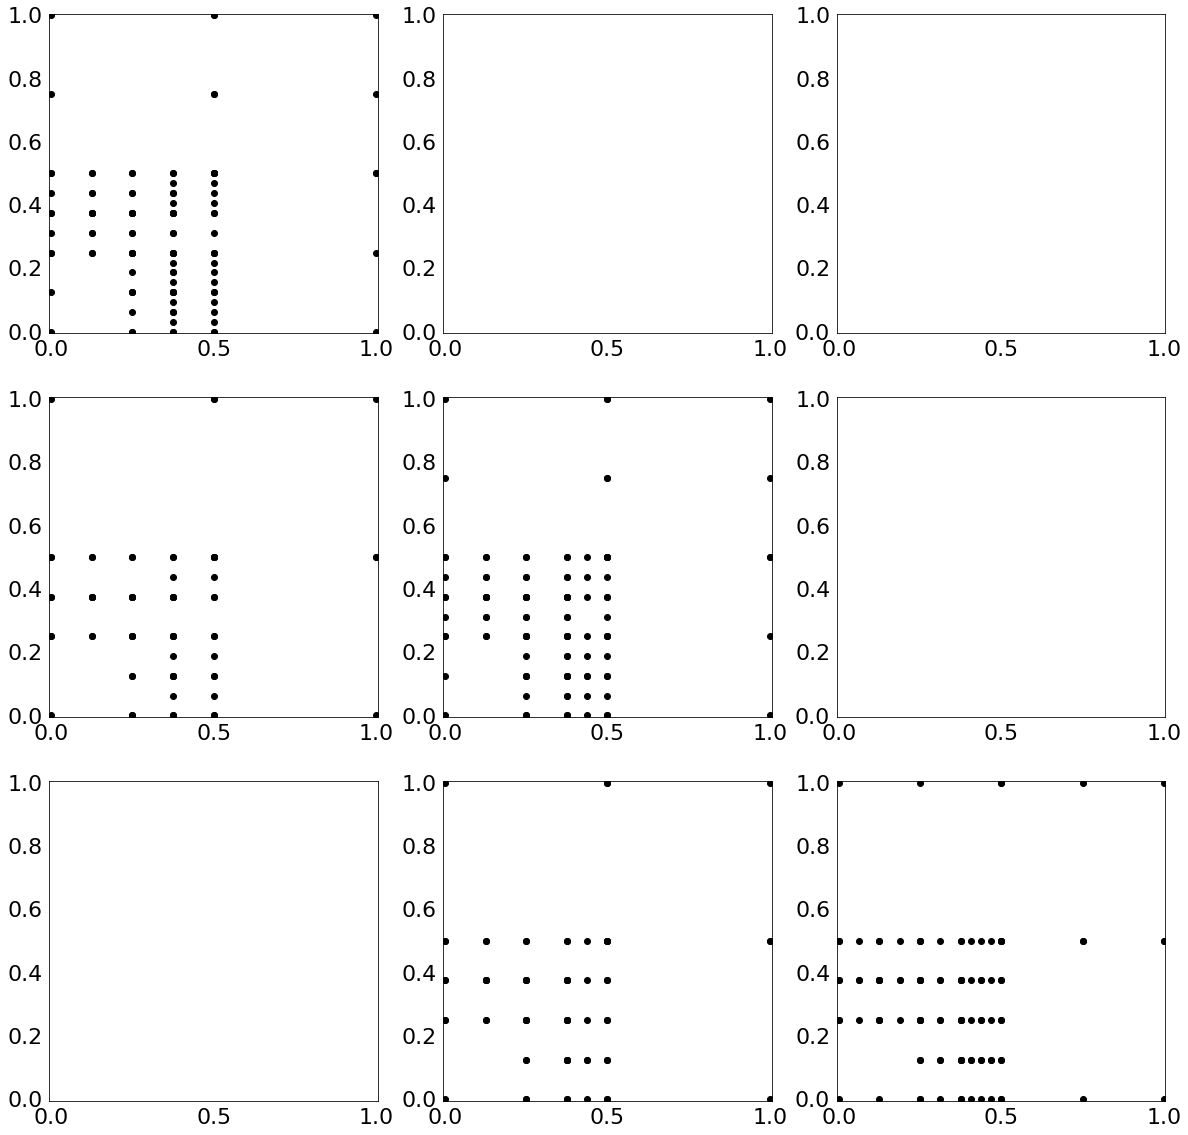

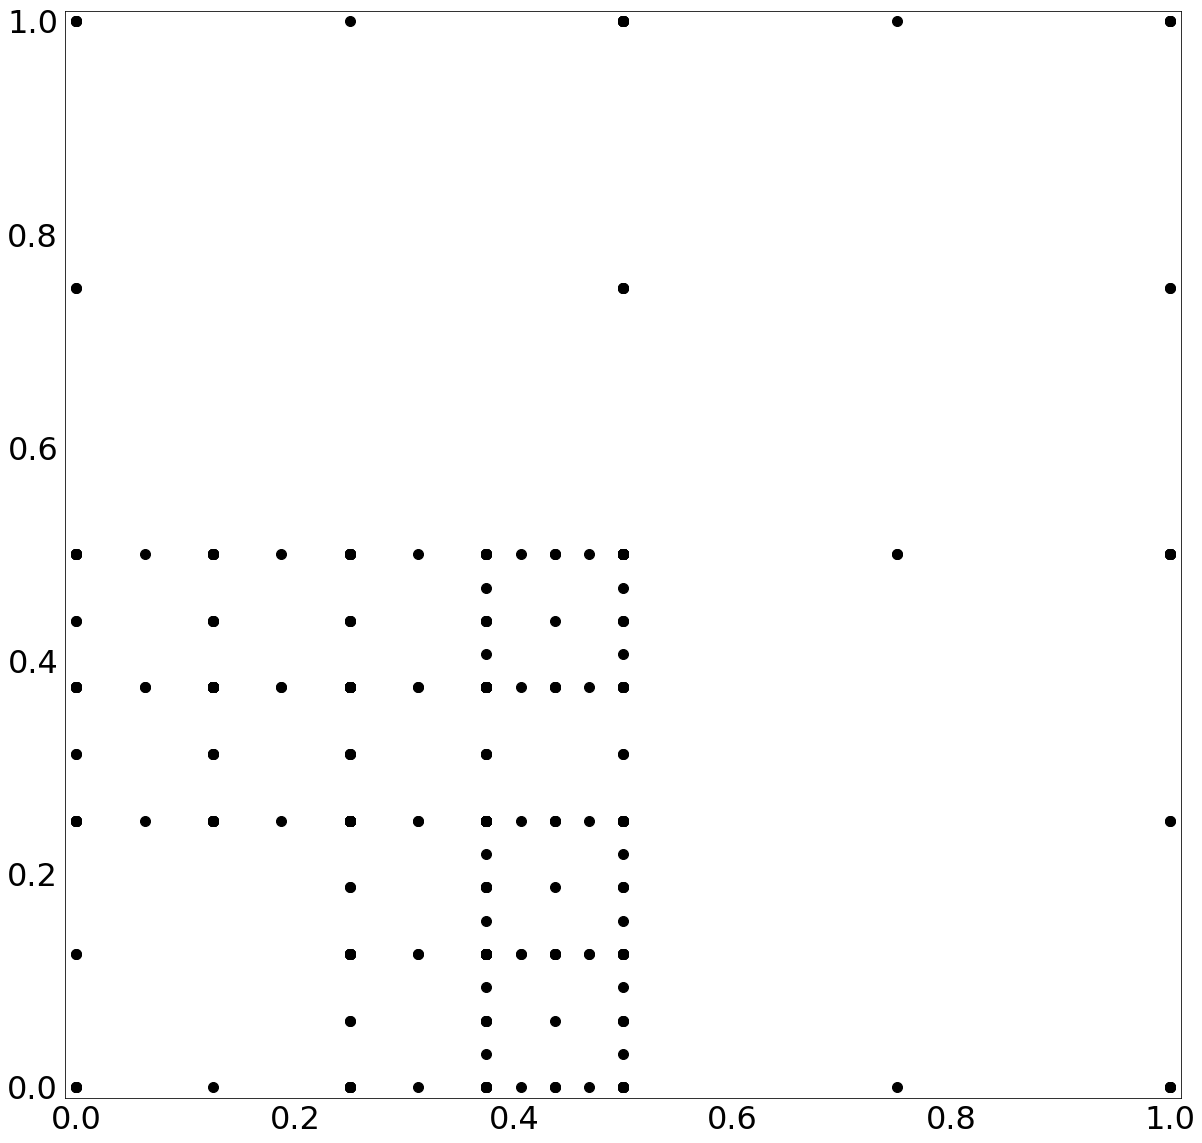

max error: 0.00133999536326
combiintegral: 0.116861102706
Current error: 0.0603001378205
Finished refinement


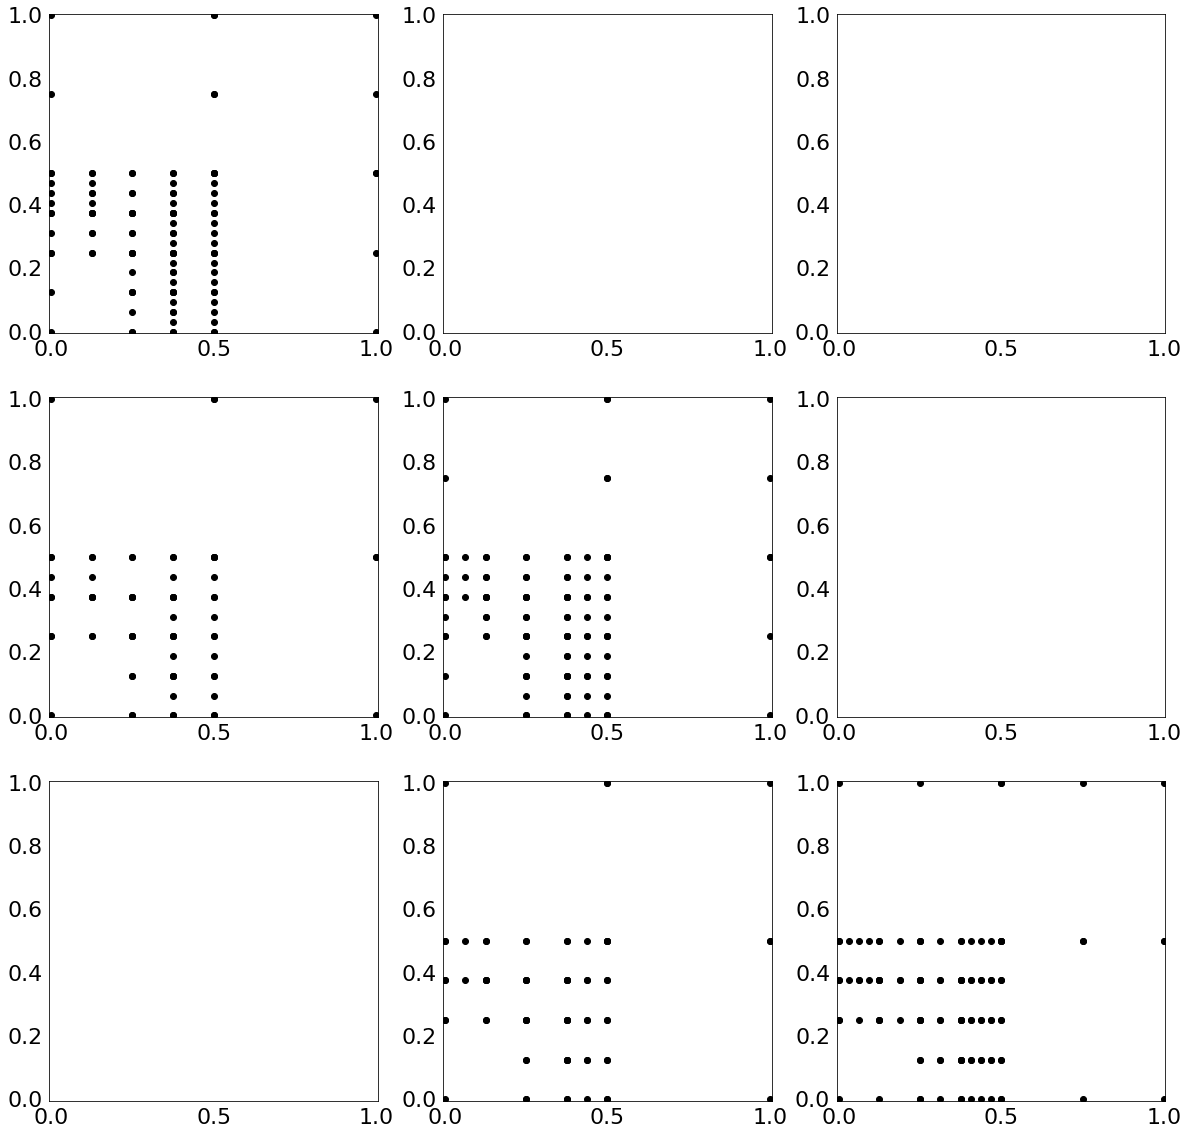

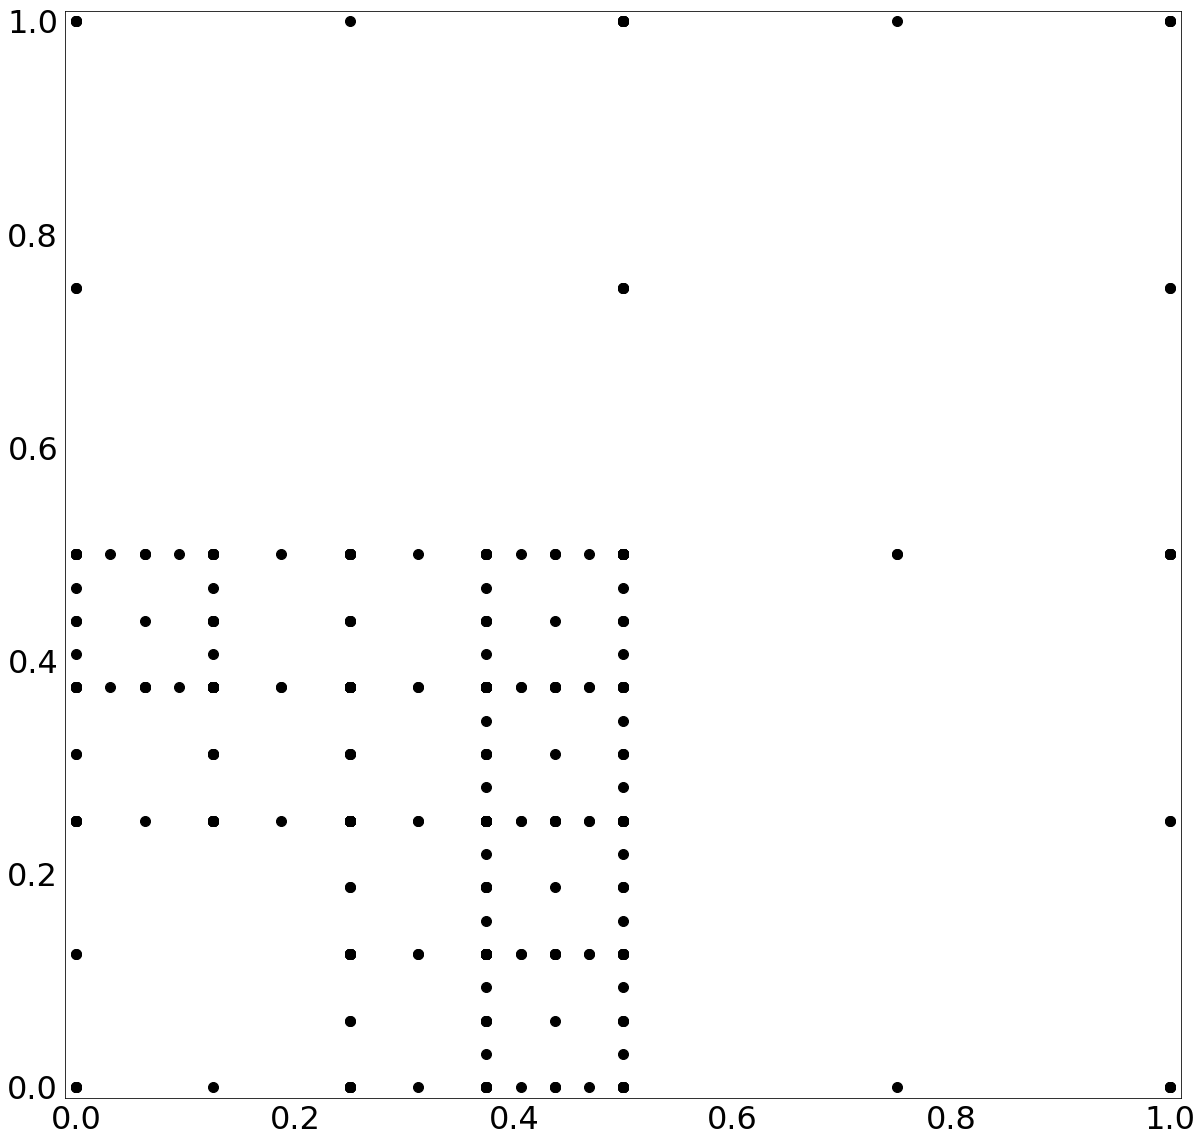

max error: 0.00118254175755
combiintegral: 0.118159225401
Current error: 0.0498617140069
New scheme
0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Finished refinement


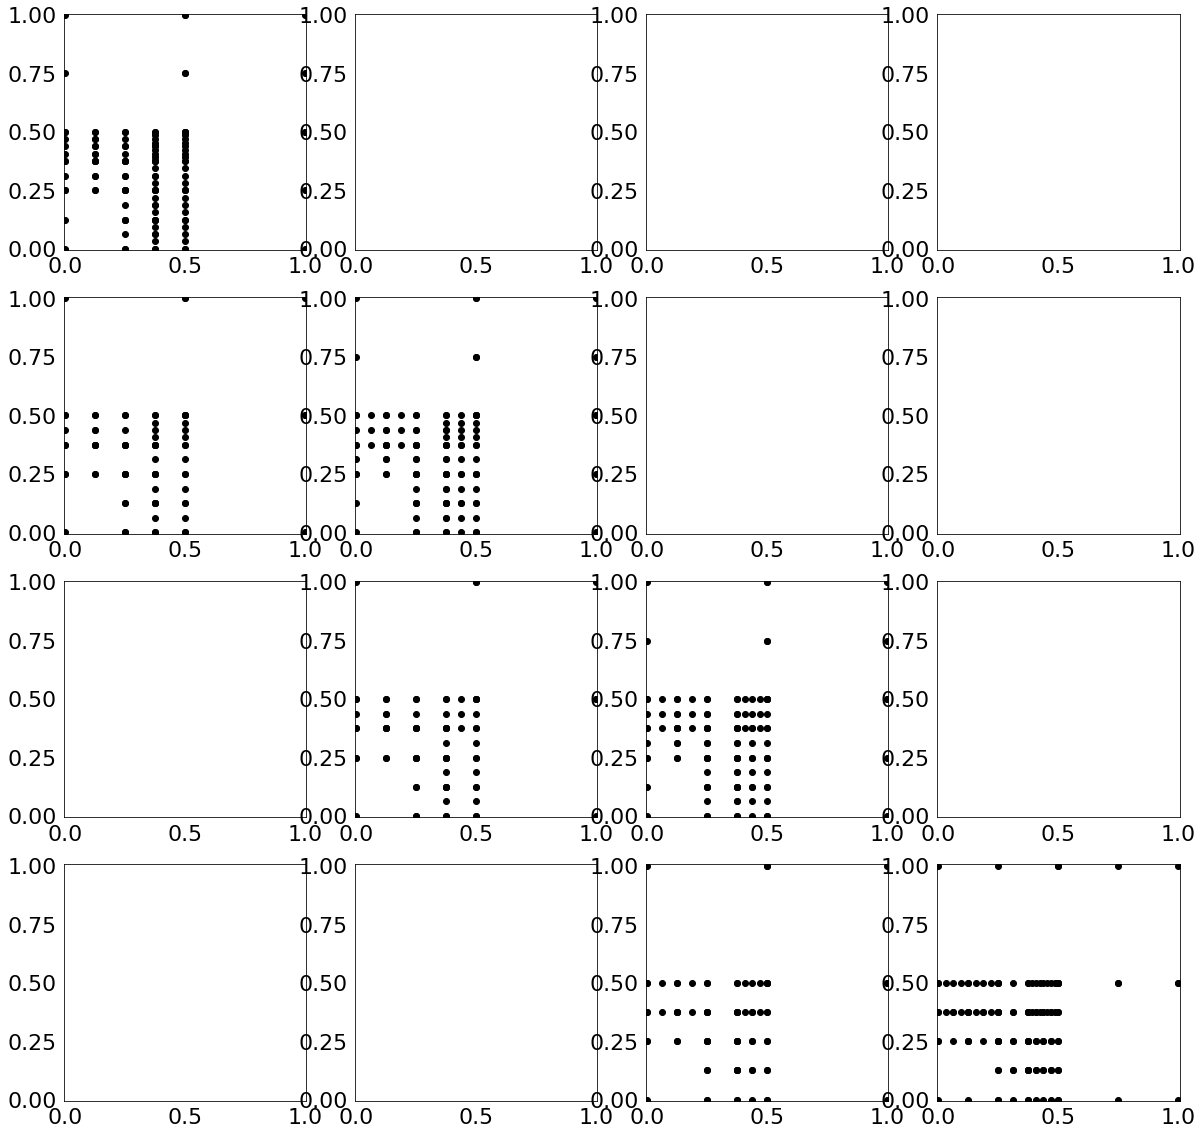

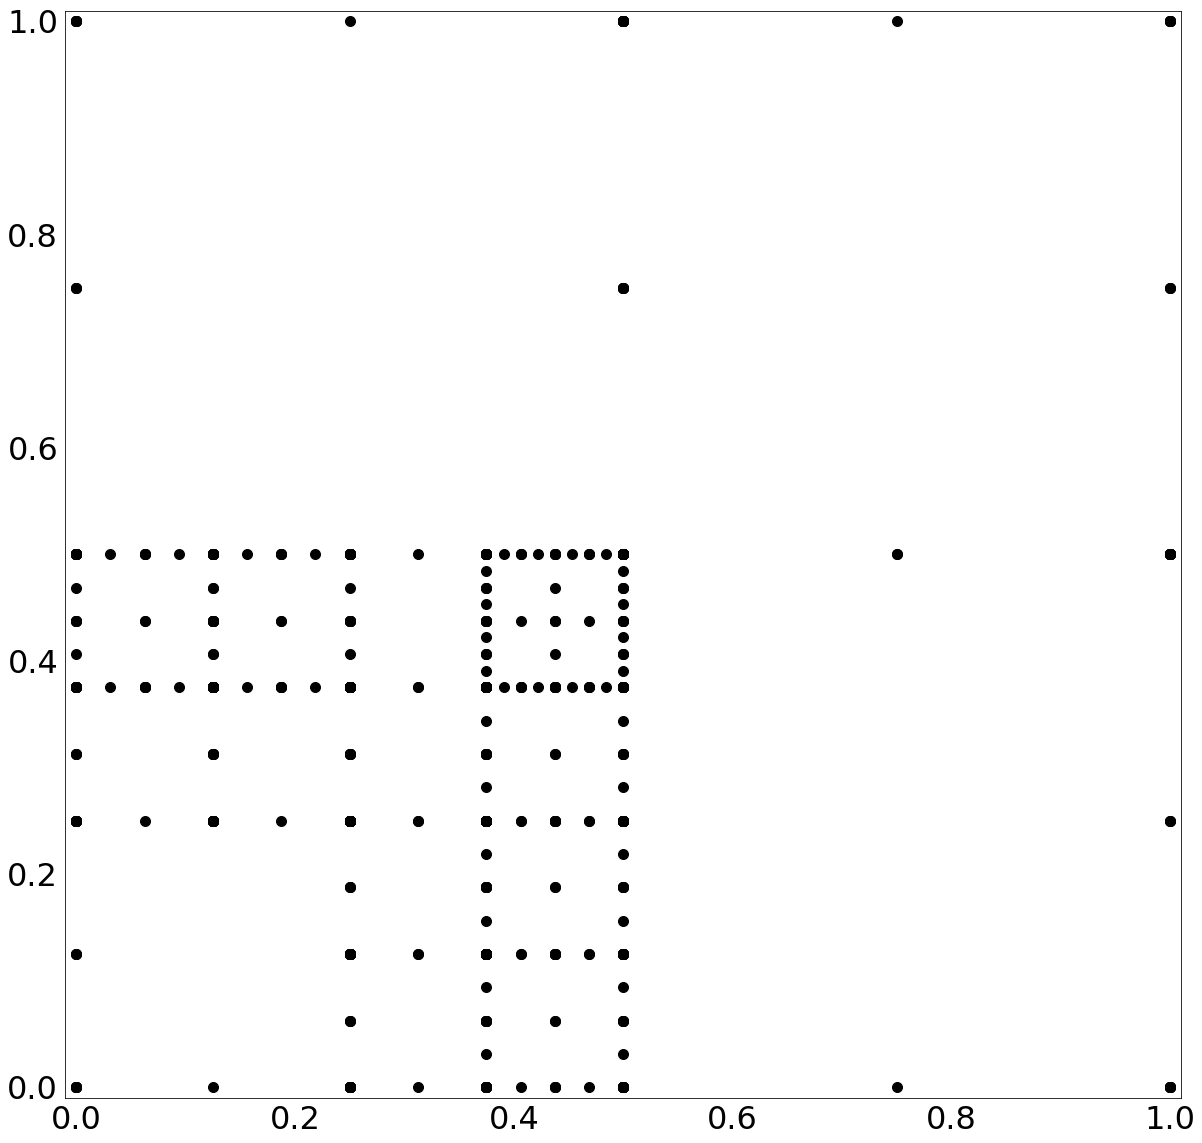

max error: 0.00104358943822
combiintegral: 0.11922586142
Current error: 0.0412847136411
Finished refinement


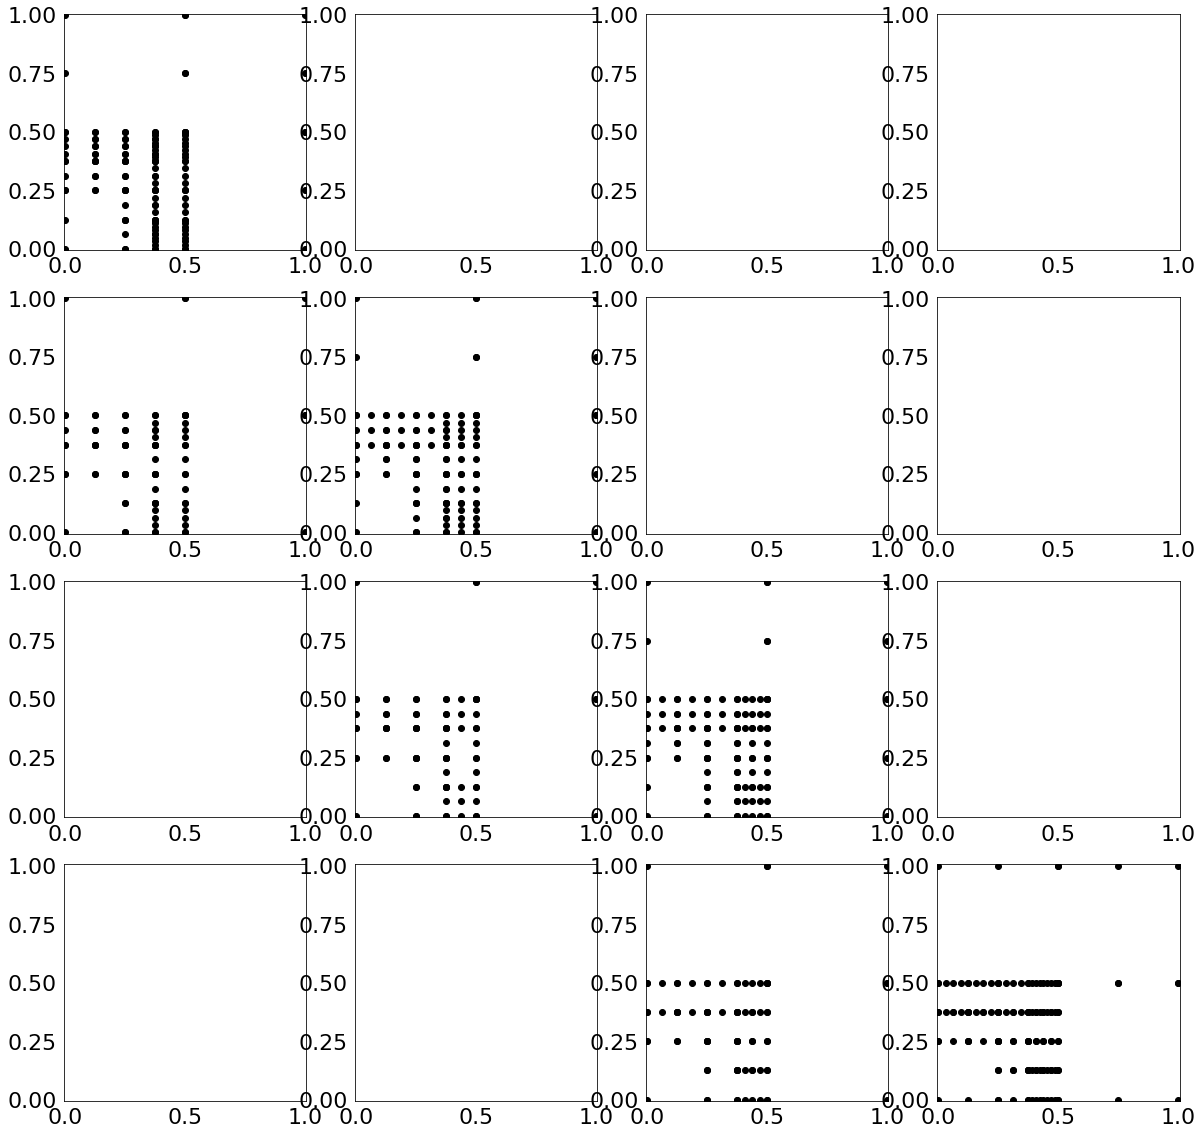

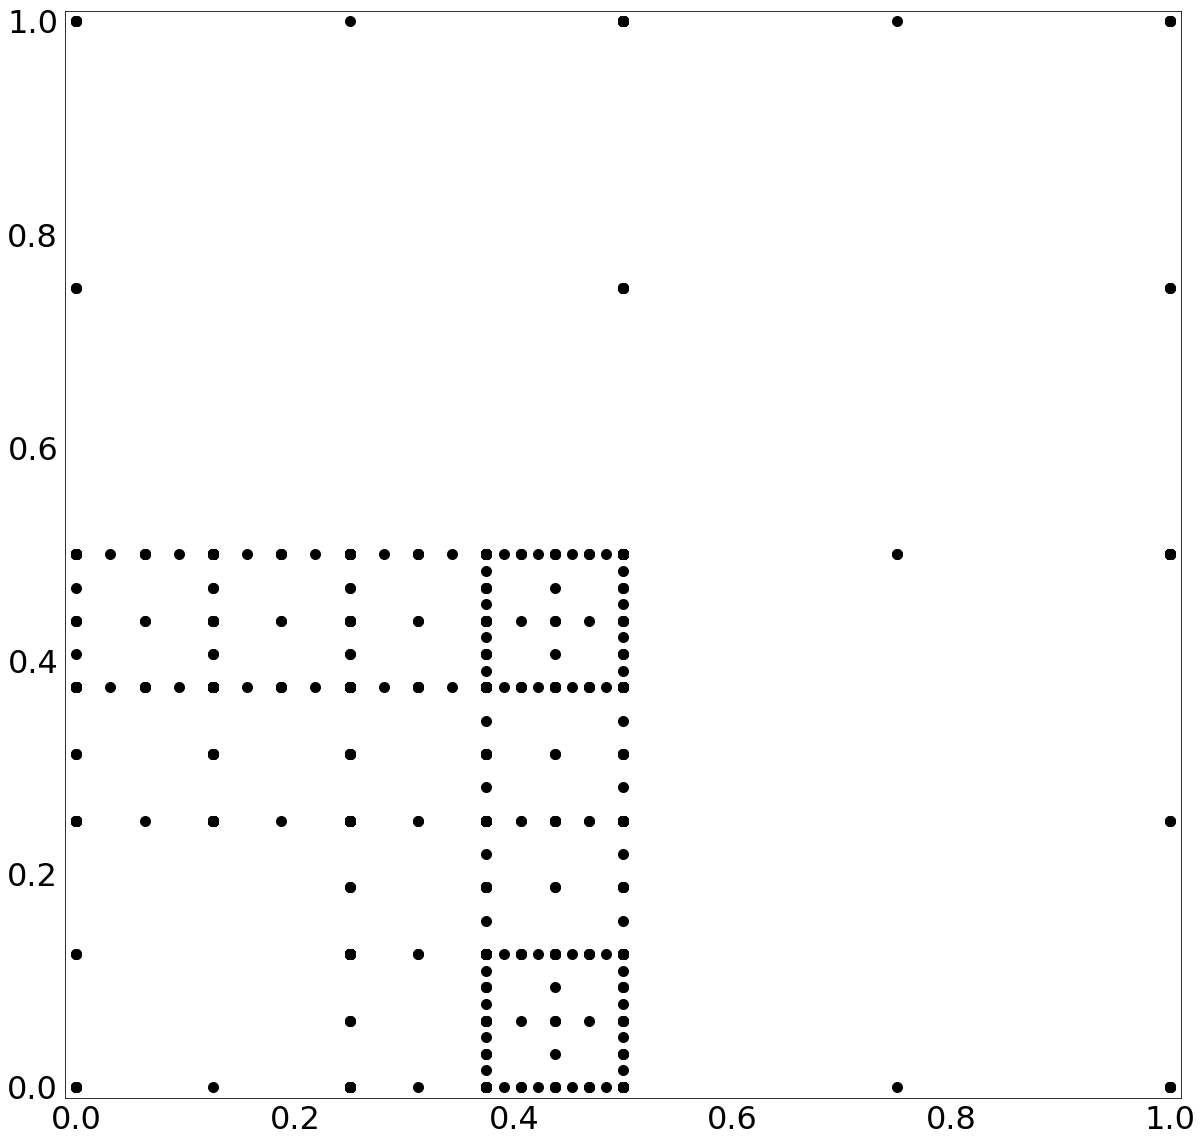

max error: 0.00080818039653
combiintegral: 0.120265202135
Current error: 0.0329271994339
Finished refinement


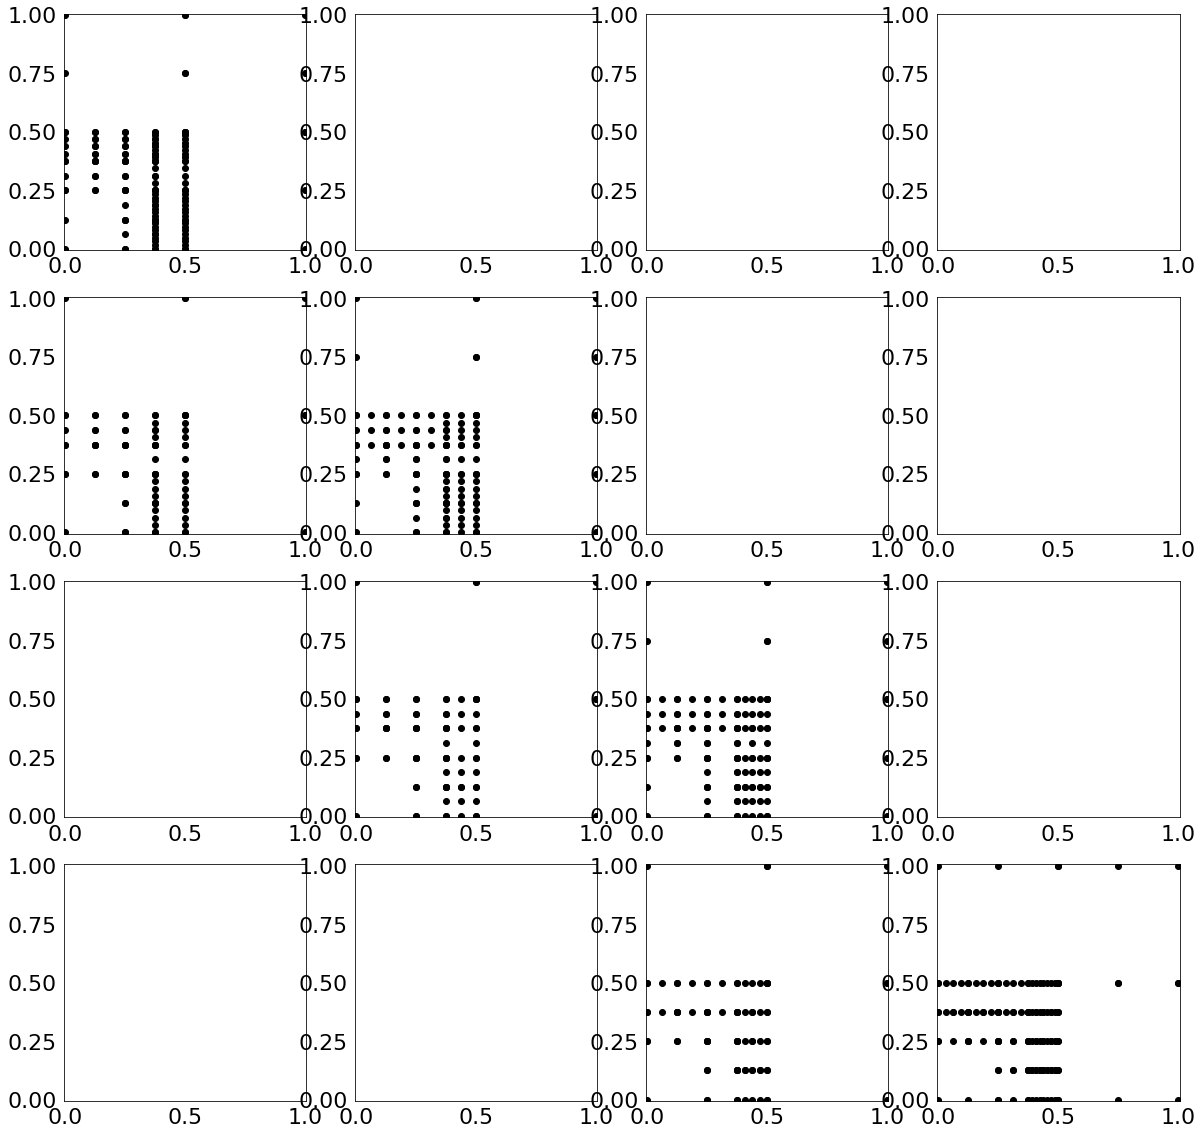

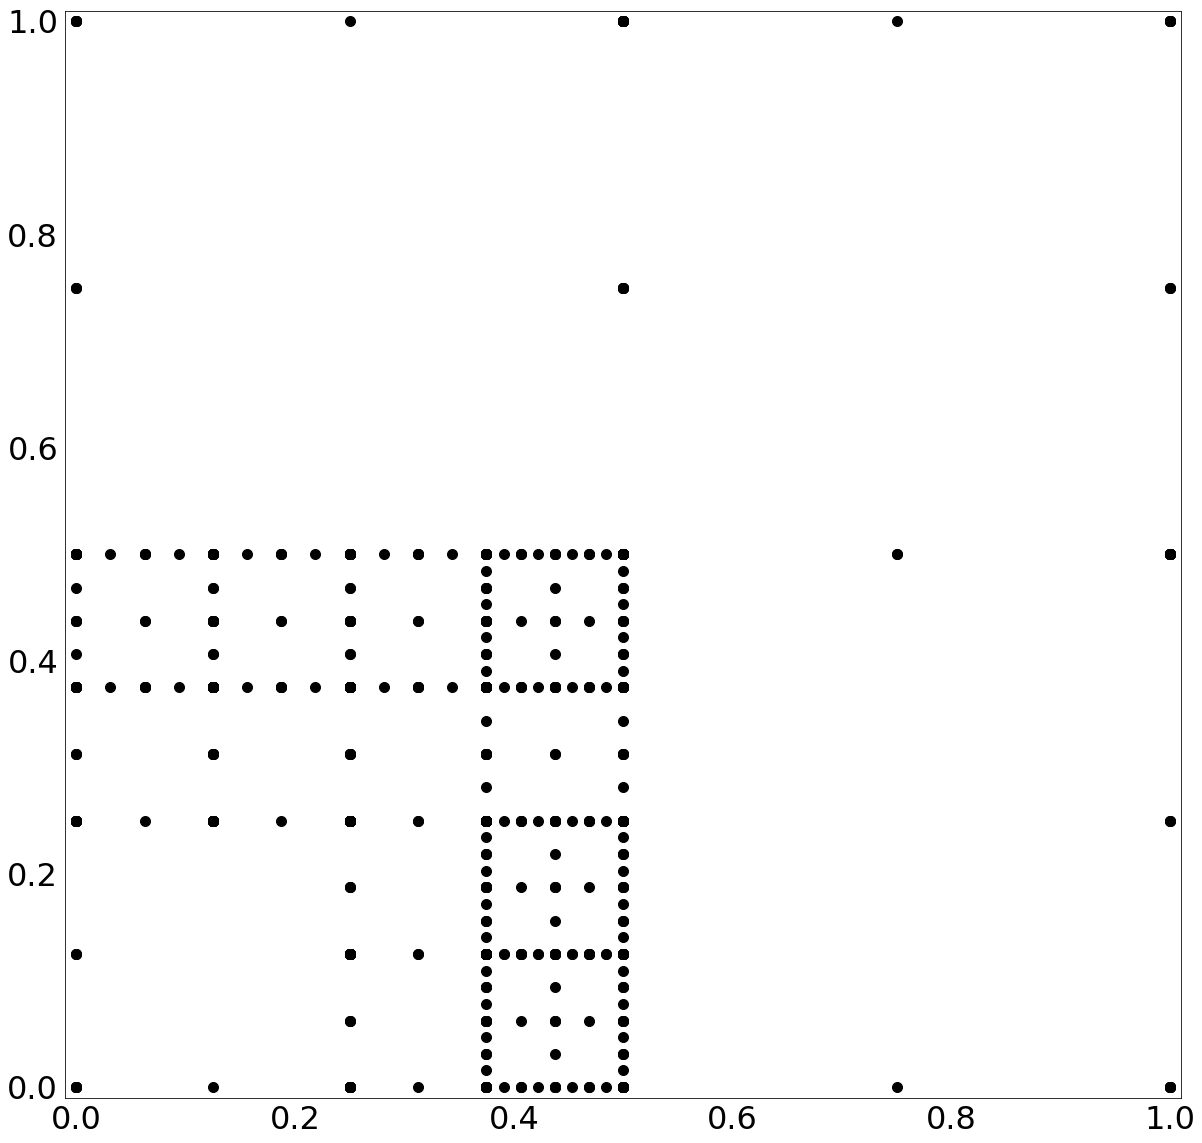

max error: 0.000694552376052
combiintegral: 0.120669383365
Current error: 0.0296771099046
New scheme
0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Finished refinement


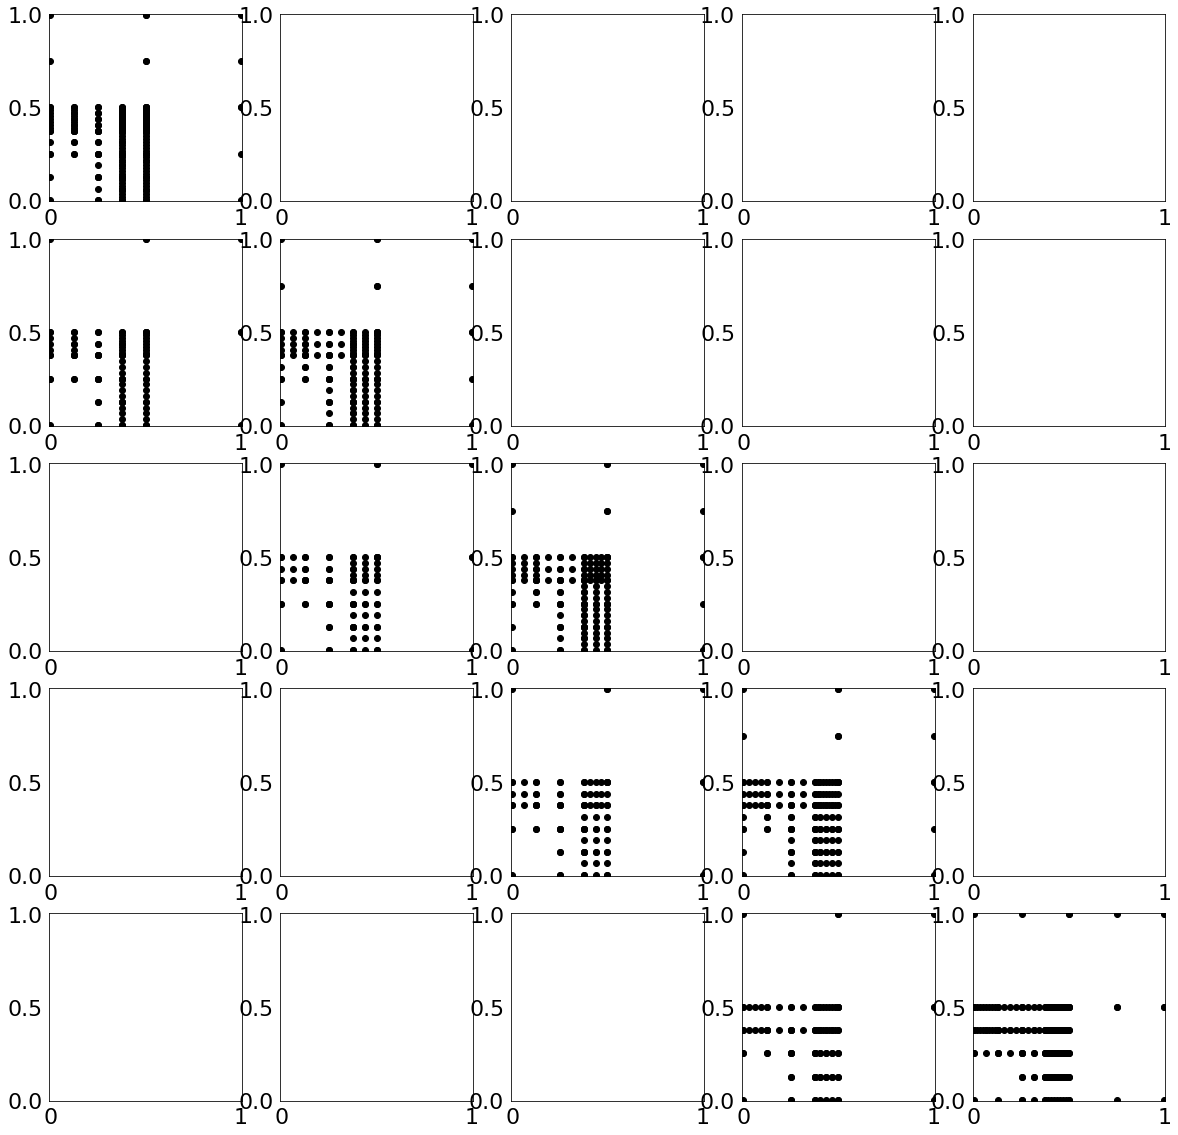

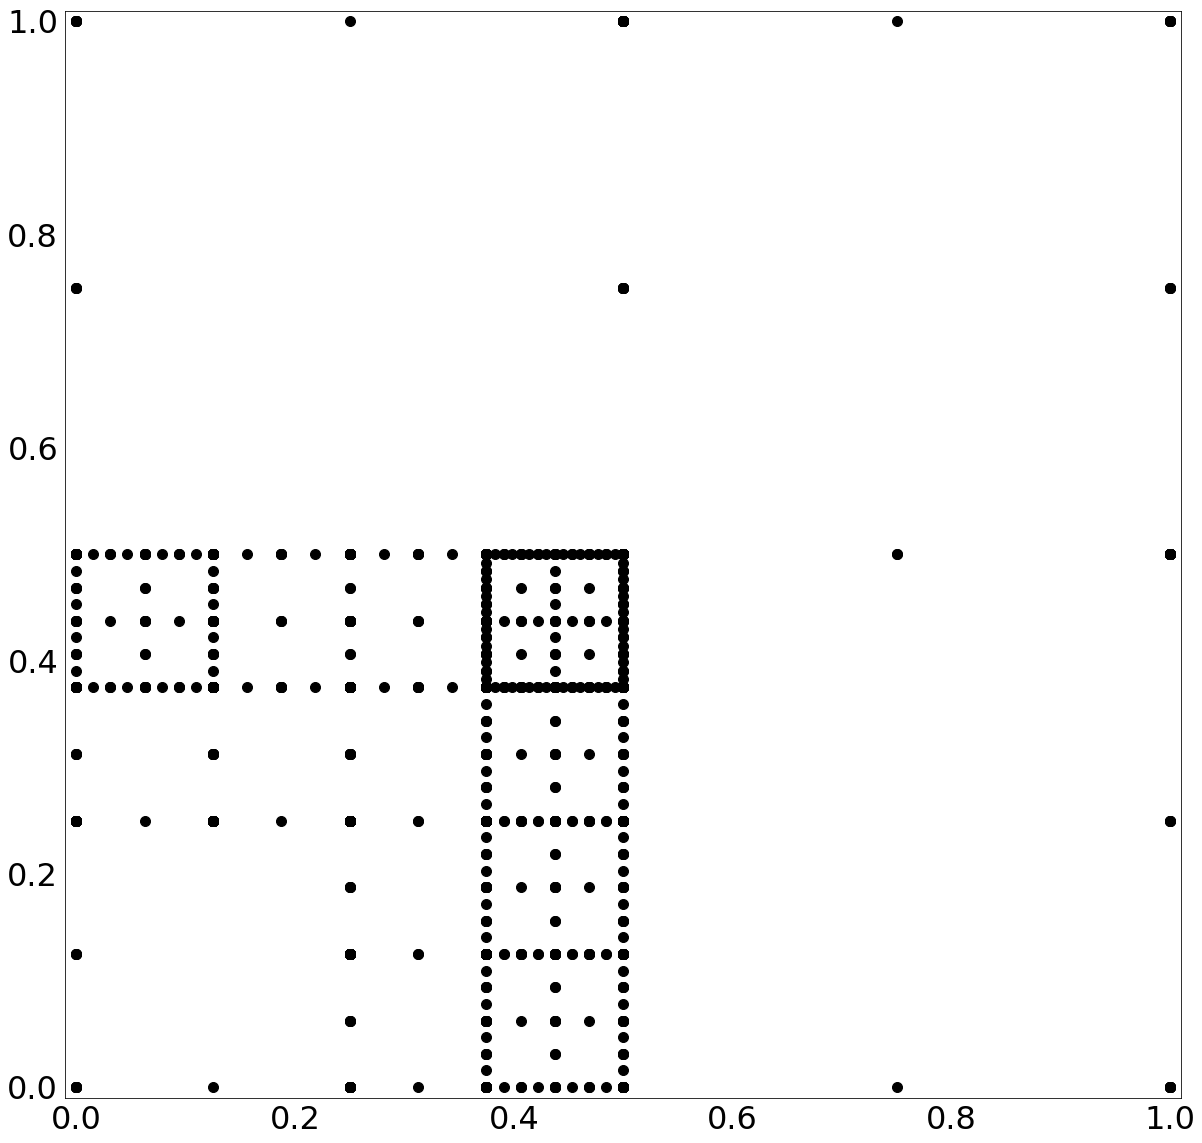

max error: 0.000592894654615
combiintegral: 0.12161246416
Current error: 0.0220936379624
Finished refinement


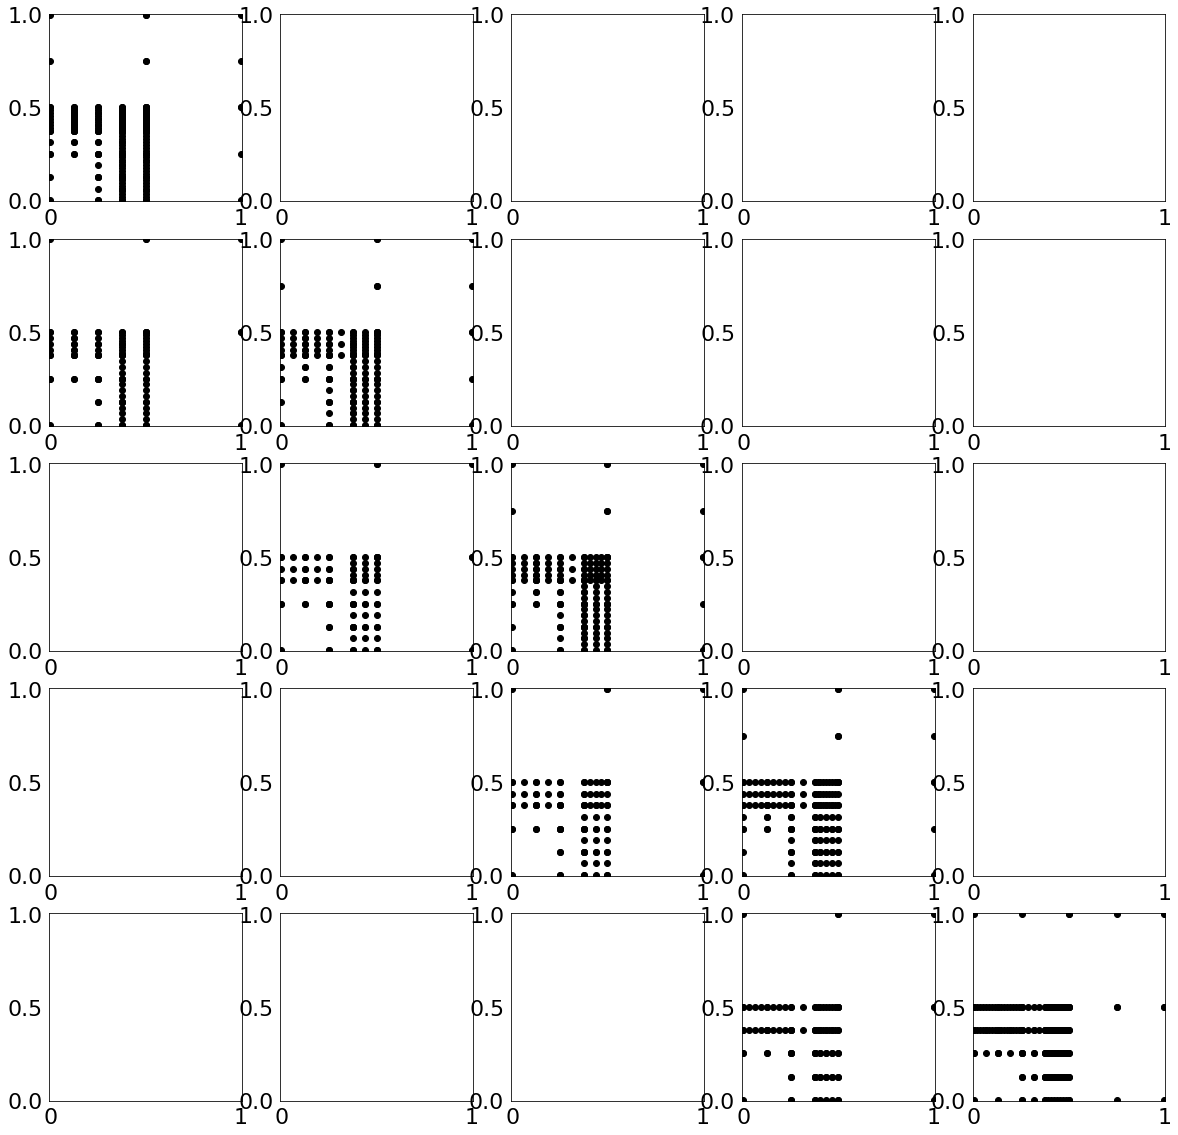

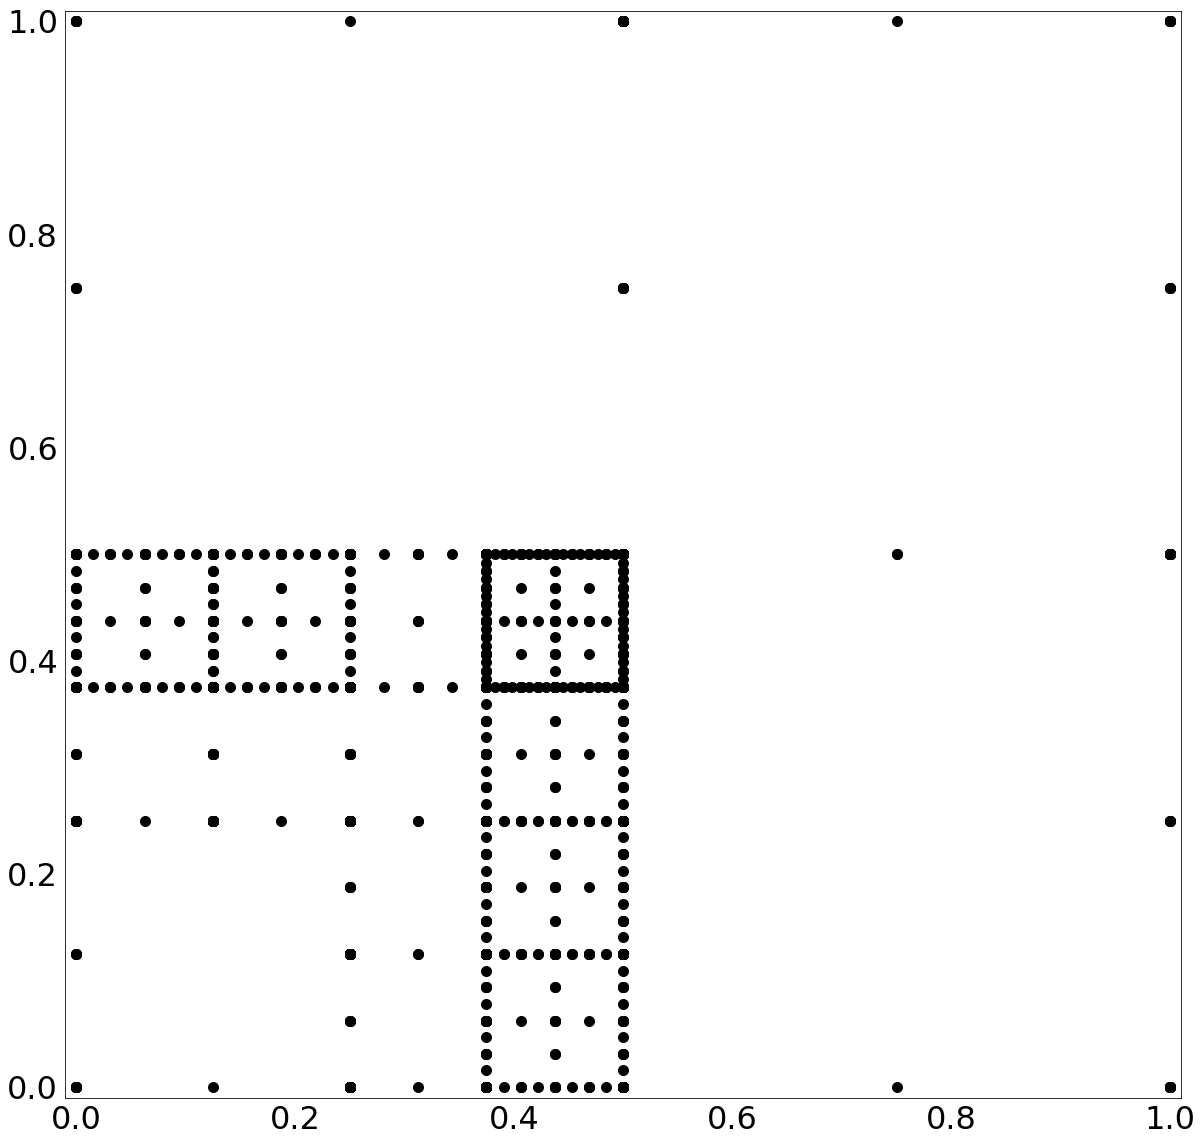

max error: 0.000523227696257
combiintegral: 0.121908507114
Current error: 0.019713106581
Finished refinement


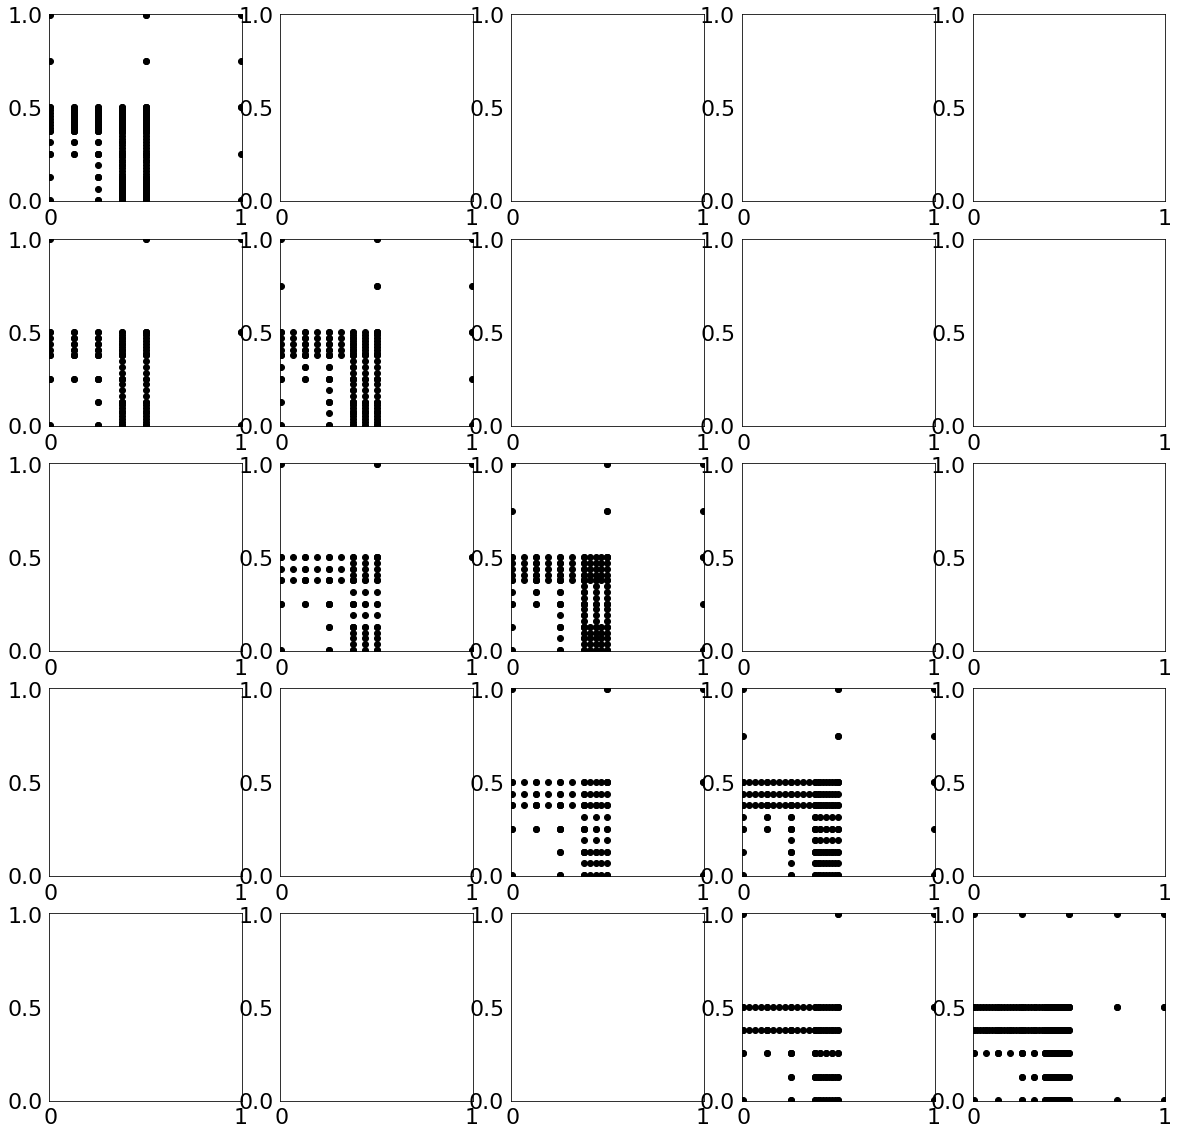

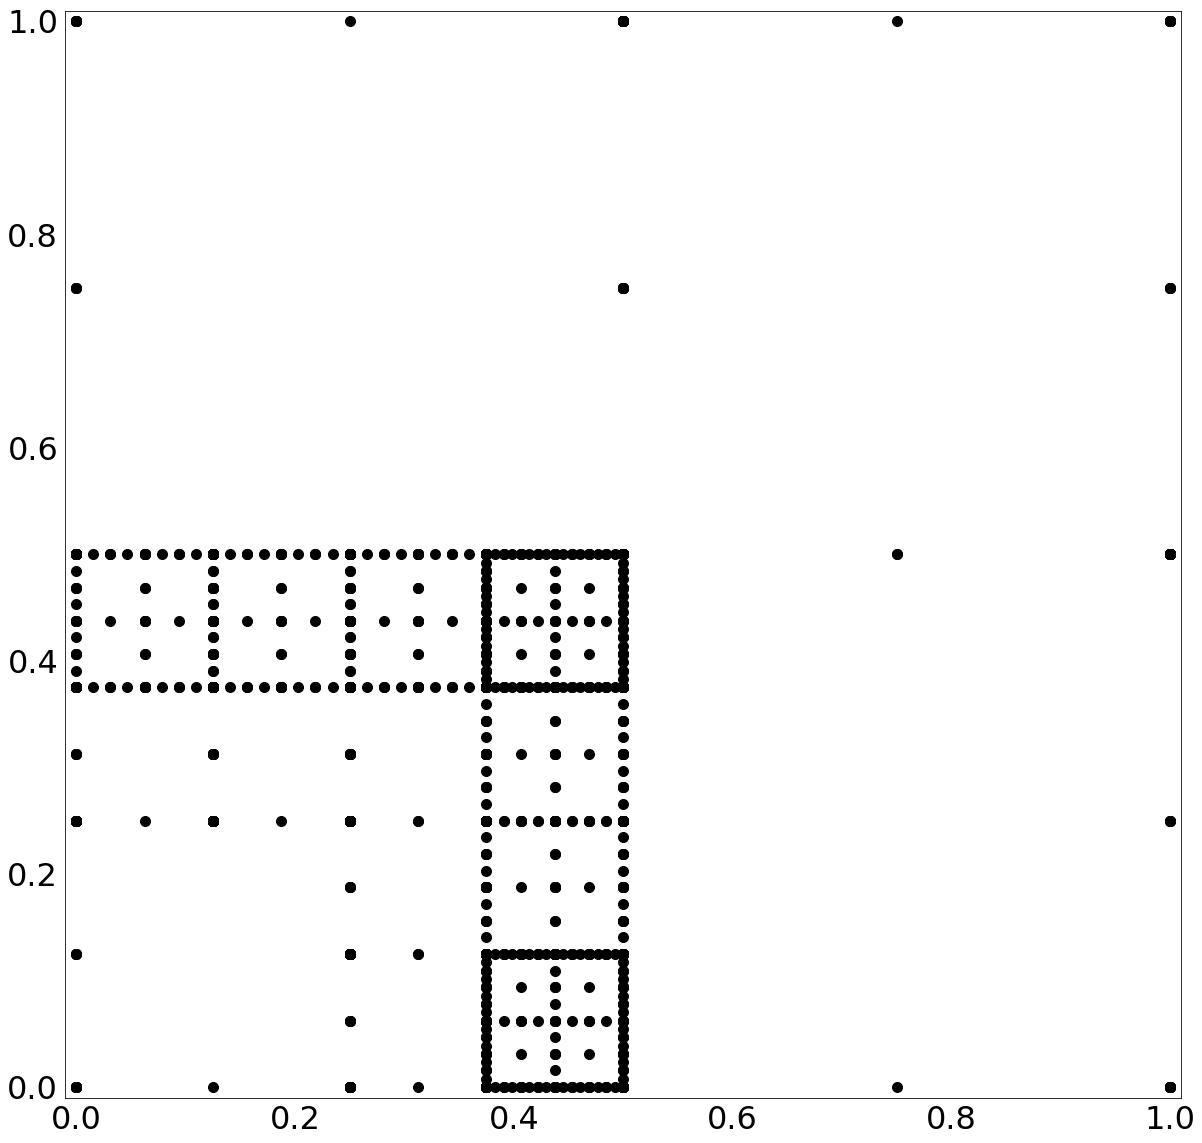

max error: 0.000403999166356
combiintegral: 0.122429166632
Current error: 0.0155263954622
New scheme
0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Finished refinement


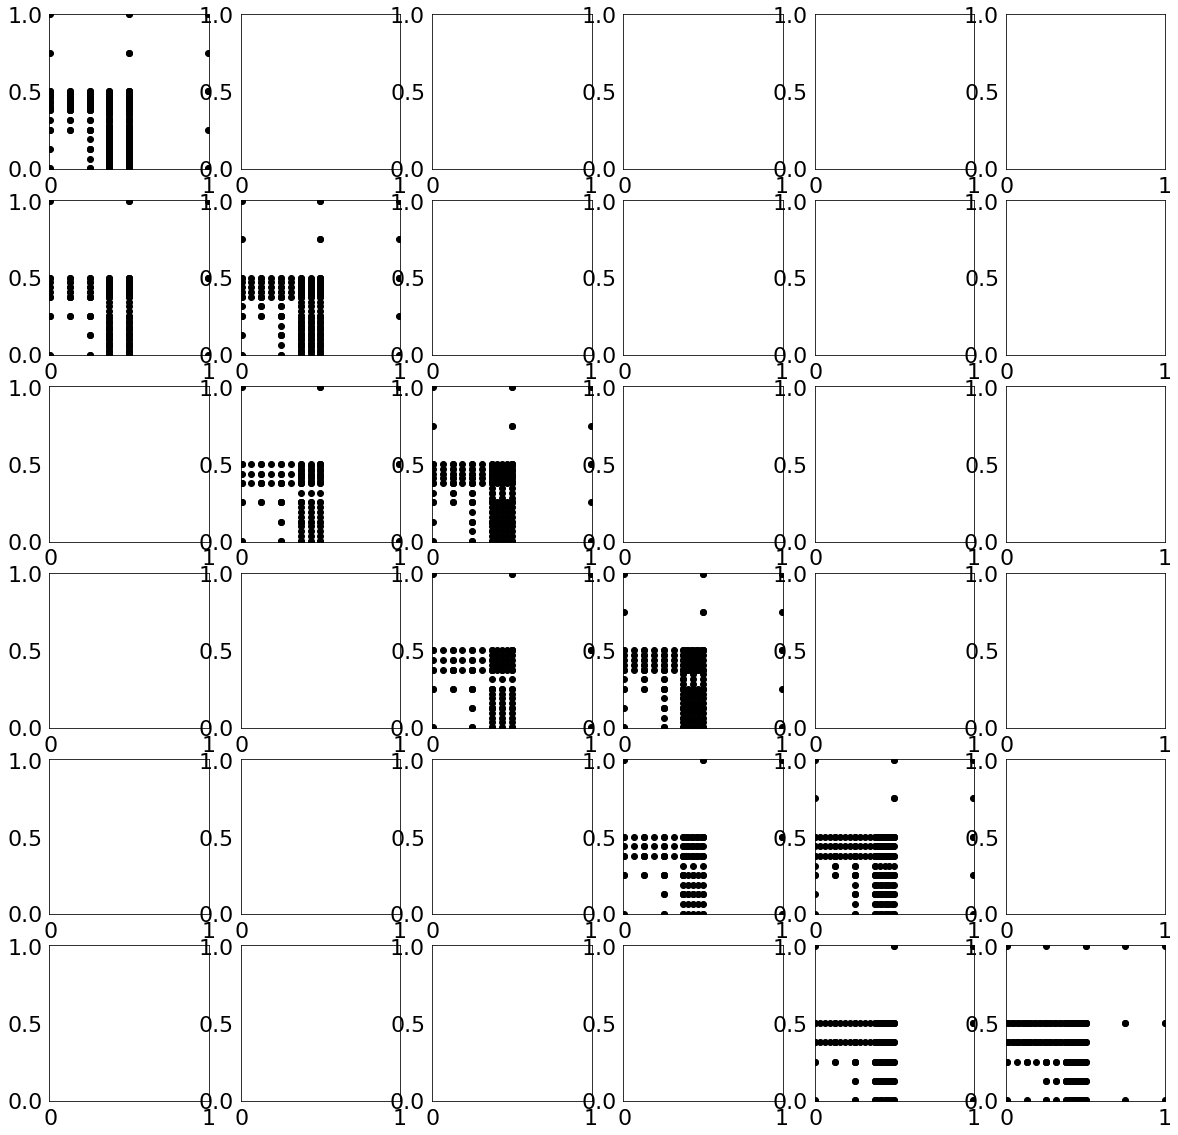

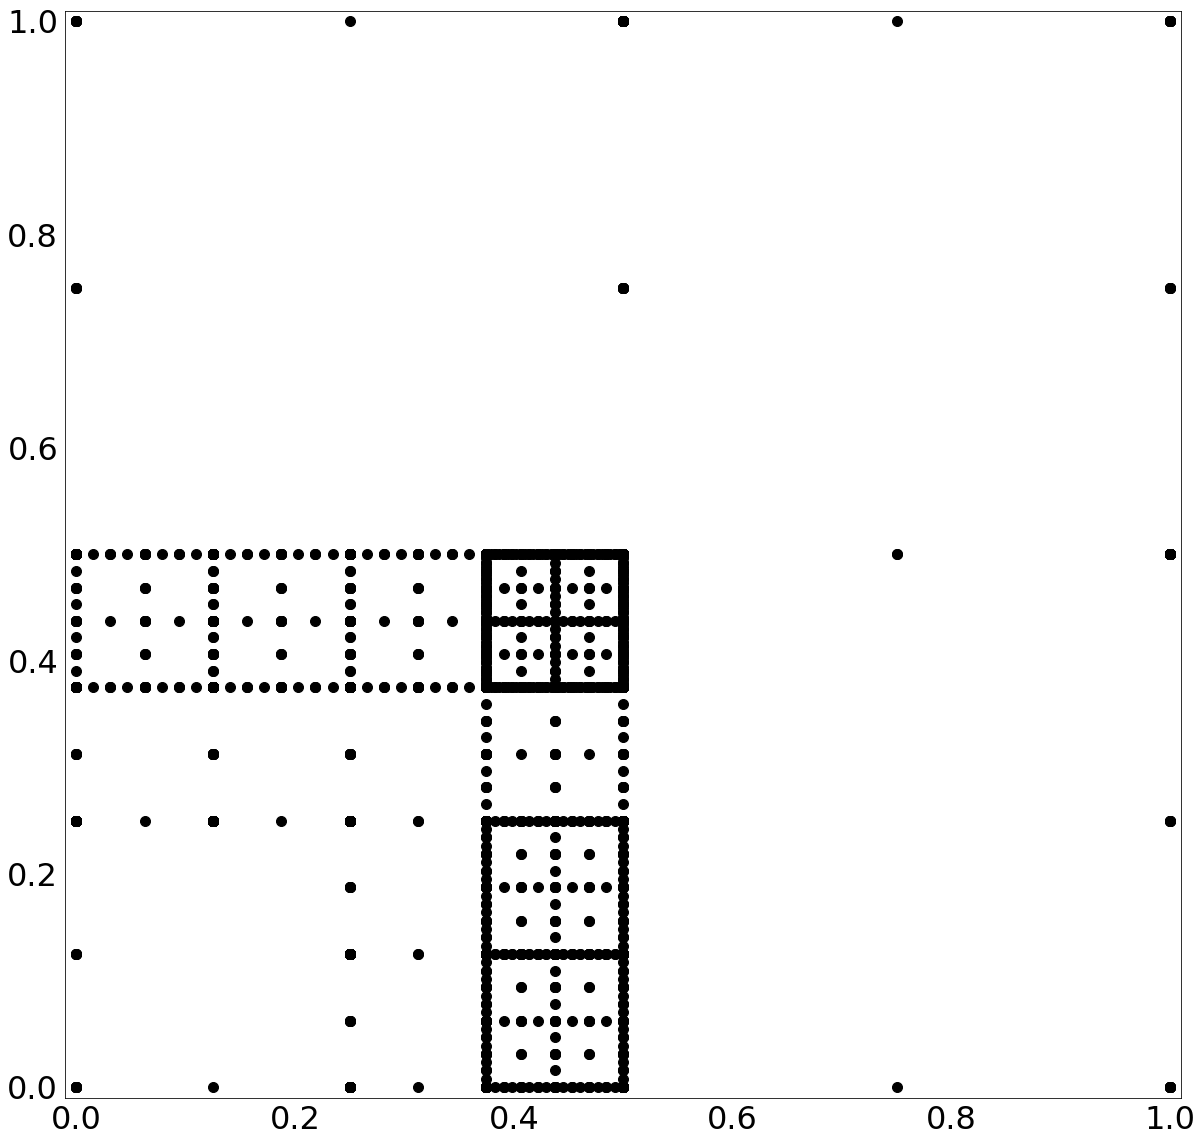

max error: 0.000336377046321
combiintegral: 0.122804817086
Current error: 0.0125057267286
Finished refinement


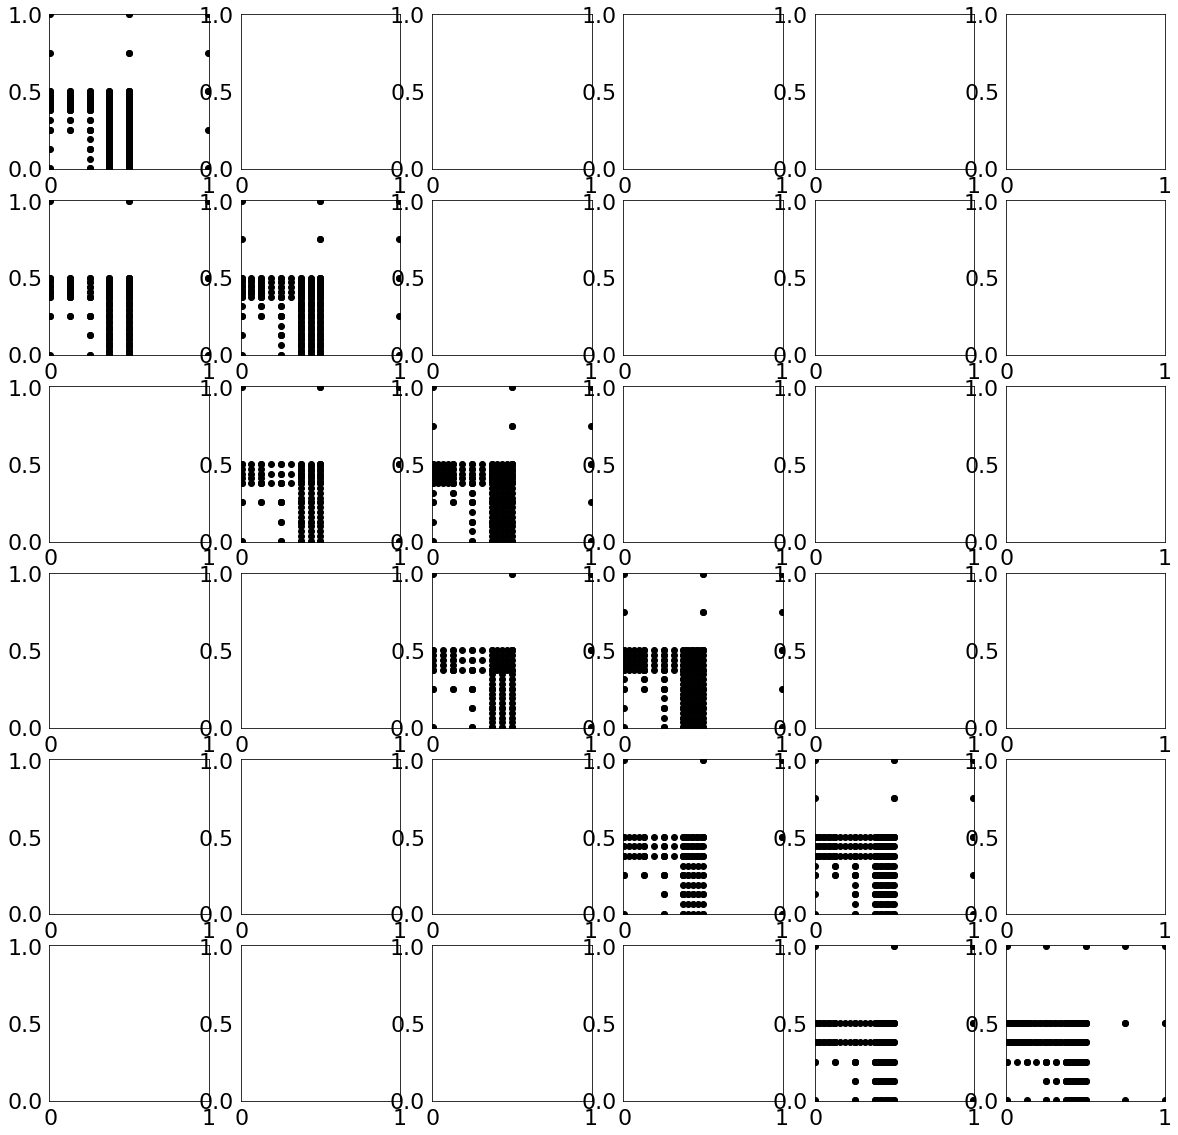

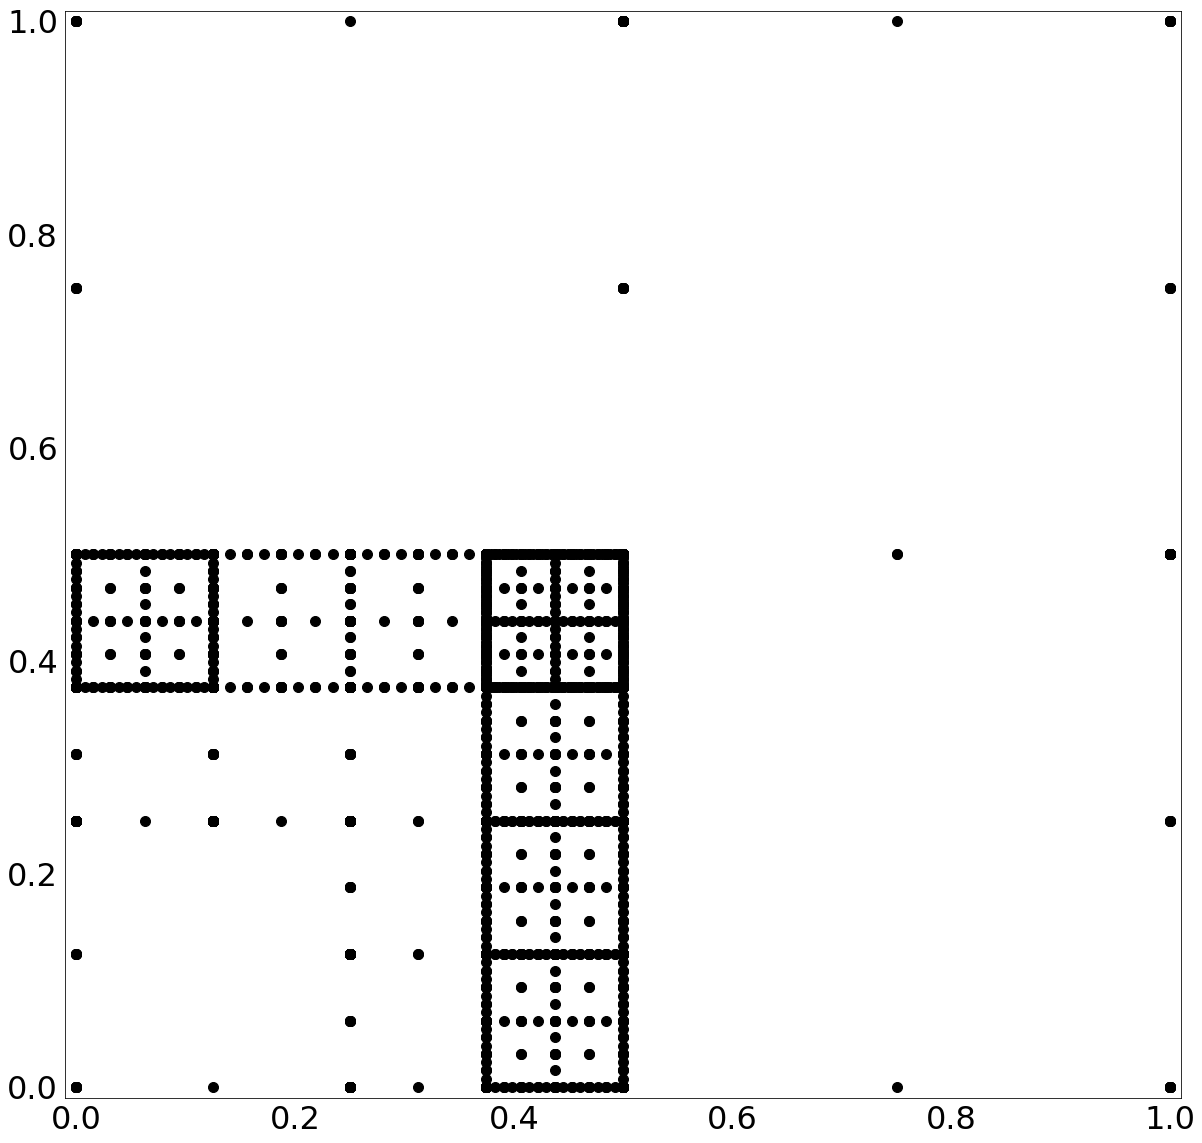

max error: 0.000296851701479
combiintegral: 0.123130227119
Current error: 0.00988904969316
Number of refinements 24


(<RefinementContainer.RefinementContainer at 0x7faf15d61208>,
 [(array([1, 6]), 1.0),
  (array([2, 5]), 1.0),
  (array([3, 4]), 1.0),
  (array([4, 3]), 1.0),
  (array([5, 2]), 1.0),
  (array([6, 1]), 1.0),
  (array([1, 5]), -1.0),
  (array([2, 4]), -1.0),
  (array([3, 3]), -1.0),
  (array([4, 2]), -1.0),
  (array([5, 1]), -1.0)],
 [6, 6],
 0.12313022711930177,
 1657,
 [0.30376974474763407,
  0.16145426771529511,
  0.12854147768775417,
  0.10041424803265904,
  0.081083387686739866,
  0.075156420418219599,
  0.066804567451235752,
  0.060300137820451613,
  0.049861714006937563,
  0.041284713641089092,
  0.03292719943394113,
  0.02967710990461463,
  0.022093637962437272,
  0.019713106580997387,
  0.015526395462221605,
  0.012505726728553913,
  0.0098890496931579083],
 [21, 34, 47, 58, 69, 78, 87, 94, 108, 135, 160, 176, 252, 268, 324, 456, 528])

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSplit import *
from spatiallyAdaptiveSingleDimension import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
import math
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorAnalytic()

grid=TrapezoidalGrid(a, b)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions(a, b,grid)
adaptiveCombiInstanceFixed = SpatiallyAdaptiveFixedScheme(a, b,grid)
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,2,grid,version=0)
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b,grid)

adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1,2,f,errorOperator2,10**-2, do_plot=True)

Now experiment with different functions, different dimensions and different tolerances to get to know the framework.